## 01 - Setting Up The Project

In [1]:
import numpy as np # numpy is a python package that will allow us to work with numerical data and allow us to use multi-dimensional arrays
import pandas as pd # pandas is a python package that will allow us to work with tabular data and work with 2D table objects called Dataframes
import matplotlib.pyplot as plt  # matplotlib is a python library that will allow us to create visualizations of our data 
import seaborn as sns # seaborn is a data visualization library based on matplot and will allow us to create statistical graphics 
from sklearn.preprocessing import OneHotEncoder as ohe # this will allow us to code categorical data in binary format

In [2]:
sns.set(color_codes=True) # this command will add asthetic backgrounds to our data visualizations
%matplotlib inline 
# instructs python to display the graphs in jupyter

In [3]:
CGF = pd.read_csv('CardioGoodFitness.csv') # import the dataset and name the dataset CGF

In [4]:
CGF.head(10) # allows me to see the first 10 rows of data (the default () is 5, but I would like to see more of the picture at this point)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [5]:
CGF.shape # this will show the shape of the dataframe, in rows and columns

(180, 9)

There are 180 Observations/Rows and 9 Attributes/Columns

In [6]:
CGF.info() # To see the data type of each of the variable, number of values entered in each of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The preliminary analysis shows that we have a data frame with 9 attributes (columns) and 180 entries (rows). There is a mix of numerical and categorical data. Products, Gender and MaritalStatus are objects in the dataset and will need to be treated as categorical data. The others are all integers. This means that they are numerical AND whole numbers... income and miles would have already been rounded to the nearest dollar and mile respectively. 

# 02 - Understanding the Data and Planning the Project

So far we know that there are nine different columns which represent the variables in the dataframe.  The data is organized by Product Type, Age, Gender, Education, Marital Status, Usage, Fitness, Income, and Miles. Currently, there are 180 rows of data (excluding labels), which we will have to check for missing entries, duplications, etc.  3 of the variables are objects (qualitative or categorical data) and the remaining 6 are integers (quantitative). Judging from running the CGF.head(10) command, it appears that the quant data is a mix of discrete and continuous data.  

The first step will be to clean the data. Ensure that there are no missing entries, deciding whether to delete entire rows where information is missing or to add a filler such as the mean of all the variables.  The data also needs to be examined for duplicates.  

Once the data is clean, the second step is to run univariate analysis on the data,

### Step 1: Cleaning the Data

In [7]:
CGF['CustomerID'] = range(1, len(CGF.index)+1) # This will create a unique key for the dataframe 
CGF.head() # checking to see if the new column was added

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,CustomerID
0,TM195,18,Male,14,Single,3,4,29562,112,1
1,TM195,19,Male,15,Single,2,3,31836,75,2
2,TM195,19,Female,14,Partnered,4,3,30699,66,3
3,TM195,19,Male,12,Single,3,3,32973,85,4
4,TM195,20,Male,13,Partnered,4,2,35247,47,5


In [8]:
CGF.isnull().sum() # This will tell us if there are missing values in any of the columns

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
CustomerID       0
dtype: int64

In [9]:
dupes = CGF.duplicated() #This will check to see if any of the rows are duplicates
sum(dupes)

0

The above code shows that there are no missing values and 0 duplicate rows. We can run CGF.describe() which will give us a quick summary of the data including column counts.  All columns should add up to 180. With a small dataframe like this we could also spotcheck. Lets spot check using CGF.head(25) just to see...

In [10]:
CGF.describe()

,Age,Education,Usage,Fitness,Income,Miles,CustomerID
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,90.500000
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,52.105662
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,1.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,45.750000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,90.500000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,135.250000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,180.000000


In [11]:
CGF.head(25)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,CustomerID
0,TM195,18,Male,14,Single,3,4,29562,112,1
1,TM195,19,Male,15,Single,2,3,31836,75,2
2,TM195,19,Female,14,Partnered,4,3,30699,66,3
3,TM195,19,Male,12,Single,3,3,32973,85,4
4,TM195,20,Male,13,Partnered,4,2,35247,47,5
5,TM195,20,Female,14,Partnered,3,3,32973,66,6
6,TM195,21,Female,14,Partnered,3,3,35247,75,7
7,TM195,21,Male,13,Single,3,3,32973,85,8
8,TM195,21,Male,15,Single,5,4,35247,141,9
9,TM195,21,Female,15,Partnered,2,3,37521,85,10


The counts all add up to 180 and the first 25 rows look good. We could continue this methond and check all 180 rows, but this would not be possible with much larger datasets so we will trust the python commands and conclude there is no missing values nor complete duplicate rows.

###### Hypothesis - There MAY be duplicate entries of a single customer purchasing multiple products

To test this hypothesis, we will run a for loop that will read each row of the data frame line by line.  It will compare Age, Gender, Education, Marital Status, Fitness and Income

The reasoning behind this logic is: there is not enough information given in the dataframe to rule out that a single customer made more than one purchase.  If this is true, then Age, Gender, Education, Martial Status, Fintness and Income will remain constant regardless of which product the indivual chooses, while Usage and Miles will be variables dependent on the product.  In other words, the Usage and Miles may change depending on the product, but the other 7 variables are independent and will not change regardless of the product purchased. 

In [12]:
CGF['ID'] = 0 # The first step in the code is to create a temporary column called "ID" 
for index in range(0,len(CGF)): # The for loop will increase the ID value for each record
    for index2 in range(index + 1, len(CGF)):
        if CGF['Age'].loc[index] == CGF['Age'].loc[index2] and CGF['Gender'].loc[index] == CGF['Gender'].loc[index2] and CGF['Education'].loc[index] == CGF['Education'].loc[index2] and CGF['MaritalStatus'].loc[index] == CGF['MaritalStatus'].loc[index2] and CGF['Fitness'].loc[index] == CGF['Fitness'].loc[index2] and CGF['Income'].loc[index] == CGF['Income'].loc[index2]:
            CGF['ID'].loc[index] += 1
            CGF['ID'].loc[index2] += 1
            print(CGF['CustomerID'].loc[index], 'This entry and')
            print(CGF['CustomerID'].loc[index2], ' this entry are duplicates')
            print('')
    
# The loop iterates through the dataframe, comparing the first record against all the other records in the dataset and when a match is found both of their ID values are incremented.
# The loop then prints the unique key Customer ID of the first, and then matching entry, followed by an empty line (for neatness) before restarting the loop           
    

C:\Users\mulli\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


29 This entry and
104  this entry are duplicates

91 This entry and
94  this entry are duplicates



The above code compares just Age, Gender, Education, Marital Status, Fitness and Income. Product was excluded because the SAME customer might have bought two different products.  Usage and Miles are also excluded because they are product dependent while the other variables (Excluding Product) are Customer Dependent.  This means that the SAME individual will have the SAME education or income levels if (s)he purchases multiple products but will have different usage and mile expectations based on the specific product.  

In [13]:
CGF.drop('ID',axis=1,inplace=True) # this drops the temporary ID column since its no longer needed, keeps the dataframe cleaner
CGF.head() # check to see if the ID column is dropped...

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,CustomerID
0,TM195,18,Male,14,Single,3,4,29562,112,1
1,TM195,19,Male,15,Single,2,3,31836,75,2
2,TM195,19,Female,14,Partnered,4,3,30699,66,3
3,TM195,19,Male,12,Single,3,3,32973,85,4
4,TM195,20,Male,13,Partnered,4,2,35247,47,5


In [14]:
CGF_dup_cust = CGF.iloc[:, np.r_[0:5, 6:8, 9]] # This code identifies only the independent variables plus the Product column
CGF_dup_cust.loc[[28,103], :] # Prints the duplicate rows




,Product,Age,Gender,Education,MaritalStatus,Fitness,Income,CustomerID
28,TM195,25,Male,14,Partnered,3,45480,29
103,TM498,25,Male,14,Partnered,3,45480,104


In [15]:
CGF_dup_cust.loc[[90,93], :] # repeats the step above for the second duplicate... note could have combined using the following code:

# CGF_dup_cust.loc[[28,103,90,93], :] however, breaking it up shows clearly that there are two sets of doublicates and not 4 repetitions of the same customer (Age and education are unique)

,Product,Age,Gender,Education,MaritalStatus,Fitness,Income,CustomerID
90,TM498,23,Male,16,Partnered,3,45480,91
93,TM498,23,Male,16,Partnered,3,45480,94


###### Note of Caution: 

The data above does not definitively tell us that there are two instances where the same customer made two purchases. For instance, this could be an instance where two friends went to university together as classmates, graduated from the same program and applied for the same job position where compensation is pegged to experience and education. If this is true, they would be the same age, have the same income and education, while their similar marital status and fitness would be coincidental.  Statistically speaking, however, it seems MORE likely than NOT that the duplicate entries represent the same individual who made more than one purchase. Perhaps he liked the product so much he bought a similar model (first instance) or the exact model (second instance)
for friends or family.  

Going forward, I will treat it as the SAME customer but SEPARATE purchases... ie there were 180 distinct purchases made by 178 distinct customers

### Step 2: EDA Descriptive Statistics

# 03 - Product Profiling

For product profiling purposes, we will stick to the above hypothesis and assume there are 180 distinct purchases. Therefore, analysis will be conducted on the 180 observations.


In [16]:
PP = CGF.copy() # This creates a copy of the dataframe which will be used for Product profiling purposes

We want to keep CGF as the clean, unaltered master dataframe. PP (short for Product Profiles) is a duplicate that can be changed and manipulated.  If we ever encounter a mistake or need to undo a change, the original CGF file will be available. We will do the same for Customer Profiles and create a copy of CGF called CP. 

### Customer Profiling

For customer profiling purposes, we will stick to the above hypothesis and assume there are 178 distinct customers who have made 180 different purchases.  Therefore, analysis will be conducted on the 178 observations.


In [17]:
CP = CGF.copy() # This creates a copy of the dataframe which will be used for customer profiling purposes, the original dataset will be saved for product analysis

### Quantitative Analysis

The first step of analyzing the Customer Profiles is to remove the duplicate copies.  Two were identified so we shall remove those two entries and have a dataframe of 178 rows

In [18]:
CP.drop([103,93], axis=0, inplace=True) 
# this removes the duplicate customers, specifically, it removes the record of their second purchase
# axis=0, inplace=True will make this deletion permanent

In [19]:
CP.shape #check to see if the row drops are permanent

(178, 10)

In [20]:
CP.reset_index(inplace=True) # This code resets the index so that it is now continuous from 0-177, previously the index went from 0-180 with the removed row values missing


In [21]:
CP.tail()

,index,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,CustomerID
173,175,TM798,40,Male,21,Single,6,5,83416,200,176
174,176,TM798,42,Male,18,Single,5,4,89641,200,177
175,177,TM798,45,Male,16,Single,5,5,90886,160,178
176,178,TM798,47,Male,18,Partnered,4,5,104581,120,179
177,179,TM798,48,Male,18,Partnered,4,5,95508,180,180


In [22]:
CP.drop('index',axis=1,inplace=True) # this drops the index column that was created in the above code

In [23]:
CP.tail() # check to ensure the index column is deleted

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,CustomerID
173,TM798,40,Male,21,Single,6,5,83416,200,176
174,TM798,42,Male,18,Single,5,4,89641,200,177
175,TM798,45,Male,16,Single,5,5,90886,160,178
176,TM798,47,Male,18,Partnered,4,5,104581,120,179
177,TM798,48,Male,18,Partnered,4,5,95508,180,180


In [24]:
CP['CustomerID'] = CP['CustomerID'].apply(str) # this converts the CustomerID key to a string so that python doesnt run statistical analysis on this column

In [25]:
CP.describe() # The output shows the five number summary of the data of only the integer variables

,Age,Education,Usage,Fitness,Income,Miles
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,28.842697,15.578652,3.455056,3.314607,53812.157303,103.039326
std,6.963016,1.621534,1.089603,0.963697,16576.297626,51.829617
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,43490.250000,68.000000
50%,26.500000,16.000000,3.000000,3.000000,51165.000000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58972.000000,113.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


#### Mean

In [26]:
print("CP:",CP.mean())  # print the mean of each attribute

CP: Age           2.884270e+01
Education     1.557865e+01
Usage         3.455056e+00
Fitness       3.314607e+00
Income        5.381216e+04
Miles         1.030393e+02
CustomerID             inf
dtype: float64


#### Median

In [27]:
print("CP:",CP.median())  # Print the median values of the data.

CP: Age              26.5
Education        16.0
Usage             3.0
Fitness           3.0
Income        51165.0
Miles            94.0
CustomerID       89.5
dtype: float64


#### IQR

In [28]:
CP.quantile(0.75) - CP.quantile(0.25)

Age              9.00
Education        2.00
Usage            1.00
Fitness          1.00
Income       15481.75
Miles           45.00
dtype: float64

#### Variance

In [29]:
print(CP.var())

Age          4.848359e+01
Education    2.629372e+00
Usage        1.187234e+00
Fitness      9.287120e-01
Income       2.747736e+08
Miles        2.686309e+03
dtype: float64


#### Standard Deviation

In [30]:
print(CP.std())

Age              6.963016
Education        1.621534
Usage            1.089603
Fitness          0.963697
Income       16576.297626
Miles           51.829617
dtype: float64


### Variable: Age (Customer Dependent so use CP dataframe)

#### Mode

In [31]:
print(CP['Age'].mode())  # Prints the mode of Age

0    25
dtype: int64


#### Range

In [32]:
print(CP['Age'].max() - CP['Age'].min())

32


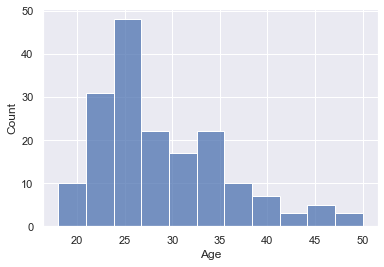

In [33]:
sns.histplot(CP.Age);

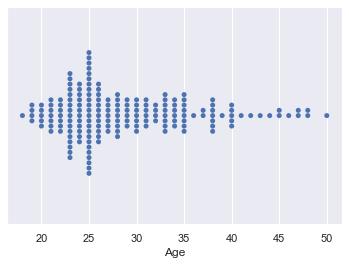

In [34]:
sns.swarmplot(data = CP, x='Age'); #This graph will give us a nice visual of how the data is dispersed: the frequency of usage


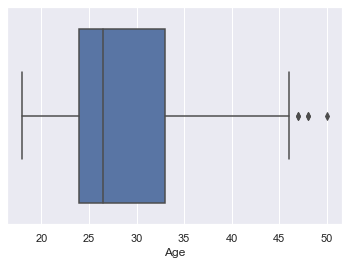

In [35]:
sns.boxplot(data = CP, x ='Age',); #This graph visualizes the 4 quadriles and shows any outliers

Age is a continuous numerical variable and as such, it can be difficult to read and interpret. One of the easiest things to do in Customer Profiling, is to create buckets of age categories.  For this study, we will use the standard generational divides: Generation Z (Gen Z) is 18 to 25, Gen Y is 26 to 40, Gen X is 41 to 57. Note the max age is 50, as seen in CFG.describe()

In [36]:
Age_Group = CP.copy() # This creates a copy of Customer Profile so I can place age variables into buckets

In [37]:
Age_Group['Age'] = Age_Group['Age'].map({18: 'GenZ', 19: 'GenZ', 20: 'GenZ', 21: 'GenZ', 22: 'GenZ', 23: 'GenZ', 
                                         24: 'GenZ', 25: 'GenZ',
                                         26: 'GenY', 27: 'GenY', 28: 'GenY', 29: 'GenY', 30: 'GenY', 31: 'GenY', 
                                         32: 'GenY', 33: 'GenY', 34: 'GenY', 35: 'GenY', 36: 'GenY', 37: 'GenY', 
                                         38: 'GenY', 39: 'GenY', 40: 'GenY',
                                         41: 'GenX', 42: 'GenX', 43: 'GenX', 44: 'GenX', 45: 'GenX', 46: 'GenX', 
                                         47: 'GenX', 48: 'GenX', 49: 'GenX', 50: 'GenX'                                        
                                        })

# This code replaces numerical, continuous data with bucket name labels

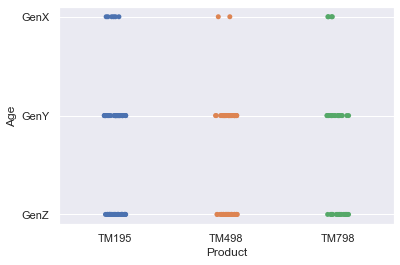

In [38]:
Age2 = sns.stripplot(data = Age_Group, x = 'Product', y='Age',  jitter=True,);

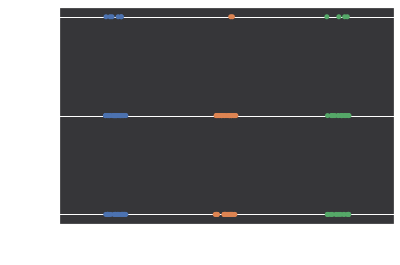

In [39]:
Age2 = sns.stripplot(data = Age_Group, x = 'Product', y='Age',  jitter=True,); #same graph as above but changes the colours to match the powerpoint presentation
Age2.yaxis.label.set_color('white') 
Age2.xaxis.label.set_color('white')
Age2.tick_params(axis='x', colors='white')
Age2.tick_params(axis='y', colors='white')
Age2.set_facecolor('#363639')

In [40]:
Age_Group.drop('Product',axis=1,inplace=True)
Age_Group.drop('Gender',axis=1,inplace=True)
Age_Group.drop('Education',axis=1,inplace=True)
Age_Group.drop('MaritalStatus',axis=1,inplace=True) 
Age_Group.drop('Usage',axis=1,inplace=True)
Age_Group.drop('Fitness',axis=1,inplace=True)
Age_Group.drop('Income',axis=1,inplace=True)
Age_Group.drop('Miles',axis=1,inplace=True)
Age_Group.drop('CustomerID',axis=1,inplace=True)

# these drops leave us with just a column of age demographic group names; which can be concatinated with the main table later on
Age_Group.head() # check to see if the columns are dropped...

,Age
0,GenZ
1,GenZ
2,GenZ
3,GenZ
4,GenZ


In [41]:
Age_Group.columns=['Generation'] # Changes the column header so that it is different from the "Age" column on original dataframe
Age_Group.head()

,Generation
0,GenZ
1,GenZ
2,GenZ
3,GenZ
4,GenZ


### Variable: Usage (Product Dependent so use PP dataframe)

#### Mode

In [42]:
print(PP['Usage'].mode())  # Prints the mode of Usage

0    3
dtype: int64


#### Range

In [43]:
print(PP['Usage'].max() - CP['Usage'].min())

5


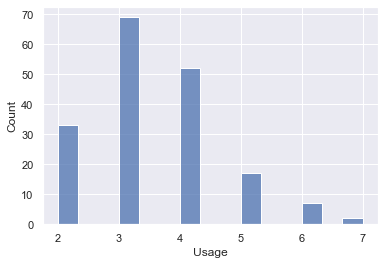

In [44]:
sns.histplot(PP.Usage);

The histogram shows that the data is almost normally distributed but it has a bit of a skewness to the left with a tail to the right. We could see it better by adding a trend line

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


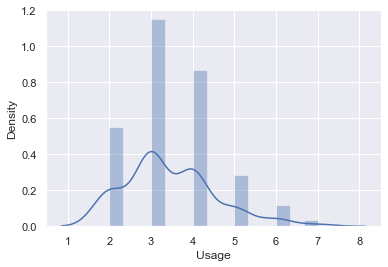

In [45]:
sns.distplot(PP.Usage);

In [46]:
PP.Usage.describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

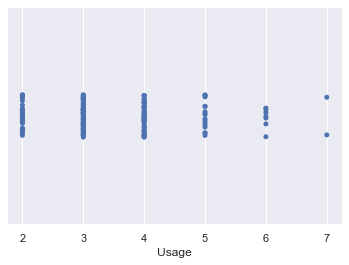

In [47]:
sns.stripplot(data = PP, x='Usage',); #This graph will give us a nice visual of how the data is dispersed: the frequency of usage (Note: stripplot was used because there are so many data points on just 6 values)

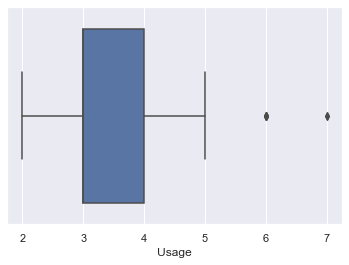

In [48]:
sns.boxplot(data = PP, x ='Usage',); #This graph visualizes the 4 quadriles and shows any outliers

The above graphs showed that most of the data lies between values 2 and 5, with a large majority divided between 3 and 4.  This would be a good place to divide up the buckets: 2 and 3 will be low usage, 4 and 5 medium usage, 6 and 7 high usage. Note there were no 0 or 1 values.  

In [49]:
Use_Group = PP.copy() # This creates a copy of Customer Profile so I can place age variables into buckets

In [50]:
Use_Group['Usage'] = Use_Group['Usage'].map({2: 'Low Usage', 3: 'Low Usage', 4: 'Medium Usage', 5: 'Medium Usage',
                                         6: 'High Usage', 7: 'High Usage'
                                        })

# This code replaces numerical, continuous data with bucket name labels

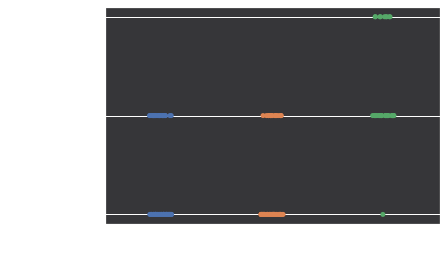

In [51]:
Use2 = sns.stripplot(data = Use_Group, x = 'Product', y='Usage', jitter=True,); # creates a stripplot with PP theme colours
Use2.yaxis.label.set_color('white')
Use2.xaxis.label.set_color('white')
Use2.tick_params(axis='x', colors='white')
Use2.tick_params(axis='y', colors='white')
Use2.set_facecolor('#363639')

In [52]:
Use_Group.drop('Product',axis=1,inplace=True)
Use_Group.drop('Gender',axis=1,inplace=True)
Use_Group.drop('Education',axis=1,inplace=True)
Use_Group.drop('MaritalStatus',axis=1,inplace=True) 
Use_Group.drop('Age',axis=1,inplace=True)
Use_Group.drop('Fitness',axis=1,inplace=True)
Use_Group.drop('Income',axis=1,inplace=True)
Use_Group.drop('Miles',axis=1,inplace=True)
Use_Group.drop('CustomerID',axis=1,inplace=True)

# these drops leave us with just a column of age demographic group names; which can be concatinated with the main table later on
Use_Group.head() # check to see if the columns are dropped...

,Usage
0,Low Usage
1,Low Usage
2,Medium Usage
3,Low Usage
4,Medium Usage


In [53]:
Use_Group.columns=['Use Level'] # Changes the column header so that it is different from the "Age" column on original dataframe
Use_Group.head()

,Use Level
0,Low Usage
1,Low Usage
2,Medium Usage
3,Low Usage
4,Medium Usage


In [54]:
L = 0
M = 0
H = 0

for index in range(0,len(Use_Group)): # The for loop will increase the ID value for each record
    if Use_Group['Use Level'].loc[index] == 'Low Usage':
        L = L+1
    elif Use_Group['Use Level'].loc[index] == 'Medium Usage':
        M = M+1
    elif Use_Group['Use Level'].loc[index] == 'High Usage':
        H = H+1
usage_total = L++M+H

print('Low Usage = ', L)
print('Medium Usage = ', M)
print('High Usage = ', H)
print('' )
print('Total count =', usage_total)

# This loop code will run through and count each time a row reads 'Low Usage', 'Medium Usage', and 'High Usage' respectively
# It will print the totals

Low Usage =  102
Medium Usage =  69
High Usage =  9

Total count = 180


### Variable: Education (Customer Dependent so use CP dataframe)

#### Mode

In [55]:
print(CP['Education'].mode())  # Prints the mode of Education

0    16
dtype: int64


#### Range

In [56]:
print(CP['Education'].max() - CP['Education'].min())

9


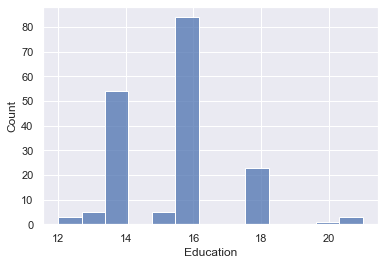

In [57]:
sns.histplot(CP.Education);

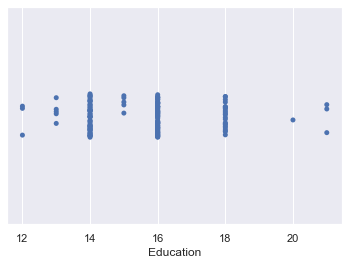

In [58]:
sns.stripplot(data = CP, x='Education',); #This graph will give us a nice visual of how the data is dispersed: the frequency of usage (Note: stripplot was used because there are so many data points on just 6 values)

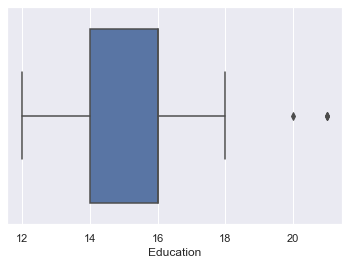

In [59]:
sns.boxplot(data = CP, x ='Education',); #This graph visualizes the 4 quadriles and shows any outliers

In [60]:
Edu_Group = CP.copy() # This creates a copy of Customer Profile so I can place age variables into buckets

In [61]:
Edu_Group['Education'] = Edu_Group['Education'].map({12: 'High School', 13: 'High School', 14: 'Some College', 
                                                     15: 'Some College', 16: 'College Grad', 17: 'Post Grad', 
                                                     18: 'Post Grad', 19: 'Post Grad', 20: 'Post Grad', 21: 'Post Grad'
                                        })

# This code replaces numerical, continuous data with bucket name labels

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


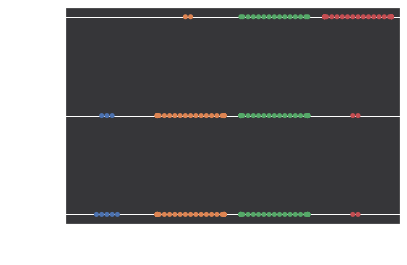

In [62]:
Edu2 = sns.swarmplot(x="Education", y="Product", data=Edu_Group, order=["High School", "Some College", "College Grad", "Post Grad"]);

Edu2.yaxis.label.set_color('white')
Edu2.xaxis.label.set_color('white')
Edu2.tick_params(axis='x', colors='white')
Edu2.tick_params(axis='y', colors='white')
Edu2.set_facecolor('#363639')

#This code creates a swarm plot with PP theme colours

In [63]:
Edu_Group.drop('Product',axis=1,inplace=True)
Edu_Group.drop('Gender',axis=1,inplace=True)
Edu_Group.drop('Age',axis=1,inplace=True)
Edu_Group.drop('MaritalStatus',axis=1,inplace=True) 
Edu_Group.drop('Usage',axis=1,inplace=True)
Edu_Group.drop('Fitness',axis=1,inplace=True)
Edu_Group.drop('Income',axis=1,inplace=True)
Edu_Group.drop('Miles',axis=1,inplace=True)
Edu_Group.drop('CustomerID',axis=1,inplace=True)

# these drops leave us with just a column of Edu demographic group names; which can be concatinated with the main table later on
Edu_Group.head() # check to see if the columns are dropped...

,Education
0,Some College
1,Some College
2,Some College
3,High School
4,High School


In [64]:
Edu_Group.columns=['Education Level'] # Changes the column header so that it is different from the "Education" column on original dataframe
Edu_Group.head()

,Education Level
0,Some College
1,Some College
2,Some College
3,High School
4,High School


### Variable: Fitness (Customer Dependent so use CP dataframe)

#### Mode

In [65]:
print(CP['Fitness'].mode())  # Prints the mode of Fitness

0    3
dtype: int64


#### Range

In [66]:
print(CP['Fitness'].max() - CP['Fitness'].min())

4


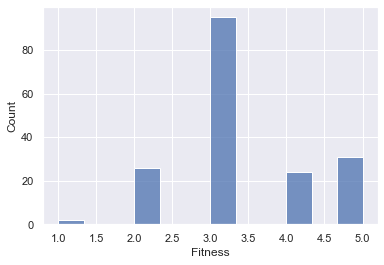

In [67]:
sns.histplot(CP.Fitness);

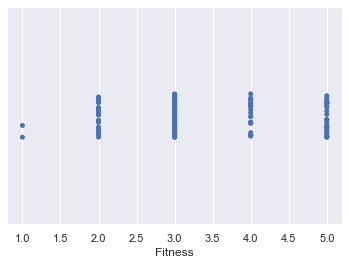

In [68]:
sns.stripplot(data = CP, x='Fitness',); #This graph will give us a nice visual of how the data is dispersed: the frequency of usage (Note: stripplot was used because there are so many data points on just 6 values)

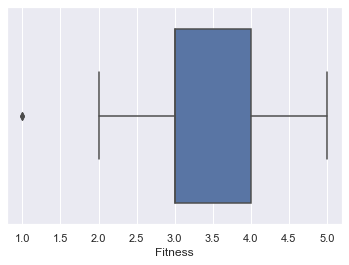

In [69]:
sns.boxplot(data = CP, x ='Fitness',); #This graph visualizes the 4 quadriles and shows any outliers

In [70]:
Fit_Group = CP.copy() # This creates a copy of Customer Profile so I can place age variables into buckets

In [71]:
Fit_Group['Fitness'] = Fit_Group['Fitness'].map({1: 'Low Fitness', 2: 'Low Fitness', 3: 'Medium Fitness', 
                                                     4: 'High Fitness', 5: 'High Fitness'
                                        })

# This code replaces numerical, continuous data with bucket name labels

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


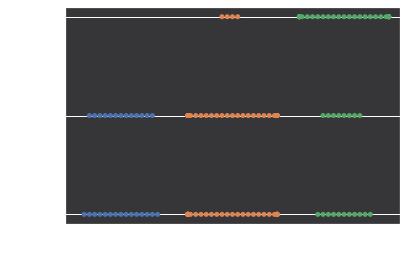

In [72]:
Fit2 = sns.swarmplot(x="Fitness", y="Product", data=Fit_Group, order=["Low Fitness", "Medium Fitness", "High Fitness"]);

Fit2.yaxis.label.set_color('white')
Fit2.xaxis.label.set_color('white')
Fit2.tick_params(axis='x', colors='white')
Fit2.tick_params(axis='y', colors='white')
Fit2.set_facecolor('#363639')

#This code prints a swarmplot with PP Theme colours

In [73]:
Fit_Group.drop('Product',axis=1,inplace=True)
Fit_Group.drop('Gender',axis=1,inplace=True)
Fit_Group.drop('Age',axis=1,inplace=True)
Fit_Group.drop('MaritalStatus',axis=1,inplace=True) 
Fit_Group.drop('Usage',axis=1,inplace=True)
Fit_Group.drop('Education',axis=1,inplace=True)
Fit_Group.drop('Income',axis=1,inplace=True)
Fit_Group.drop('Miles',axis=1,inplace=True)
Fit_Group.drop('CustomerID',axis=1,inplace=True)

# these drops leave us with just a column of Edu demographic group names; which can be concatinated with the main table later on
Fit_Group.head() # check to see if the columns are dropped...

,Fitness
0,High Fitness
1,Medium Fitness
2,Medium Fitness
3,Medium Fitness
4,Low Fitness


In [74]:
Fit_Group.columns=['Fitness Level'] # Changes the column header so that it is different from the "Education" column on original dataframe
Fit_Group.head()

,Fitness Level
0,High Fitness
1,Medium Fitness
2,Medium Fitness
3,Medium Fitness
4,Low Fitness


### Variable: Income (Customer Dependent so use CP dataframe)

#### Mode

In [75]:
print(CP['Income'].mode())  # Prints the mode of Income

0    45480
dtype: int64


#### Range

In [76]:
print(CP['Income'].max() - CP['Income'].min())

75019


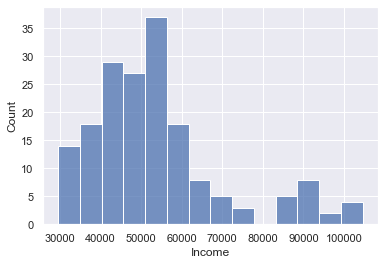

In [77]:
sns.histplot(CP.Income);

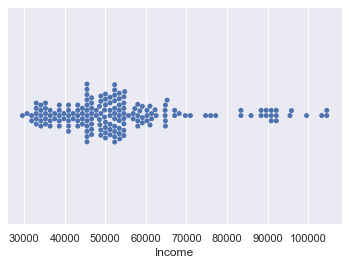

In [78]:
sns.swarmplot(data = CP, x='Income',); #This graph will give us a nice visual of how the data is dispersed: the frequency of usage 

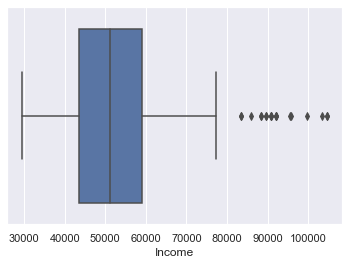

In [79]:
sns.boxplot(data = CP, x ='Income',); #This graph visualizes the 4 quadriles and shows any outliers

In [80]:
Income_Group = CP.copy() # This creates a copy of Customer Profile so I can place age variables into buckets

In [81]:
Income_Group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        178 non-null    object
 1   Age            178 non-null    int64 
 2   Gender         178 non-null    object
 3   Education      178 non-null    int64 
 4   MaritalStatus  178 non-null    object
 5   Usage          178 non-null    int64 
 6   Fitness        178 non-null    int64 
 7   Income         178 non-null    int64 
 8   Miles          178 non-null    int64 
 9   CustomerID     178 non-null    object
dtypes: int64(6), object(4)
memory usage: 14.0+ KB


With Income, the problem is there are so many different values, it would take a long time to replace each individual variable.
I was unable to use a loop and do ranges, because despite being successful for the first replaceme (ie all incomes under $43,490.25 lable as 'Low Income'), the column becomes a mix of string and integers and the loop fails. Conducting each income bucket individually runs into the same problem.  The work around is to change the values to a corresponding number and then convert the four numbers to string... see below

In [82]:
Income_Group.loc[(Income_Group.Income <= 43490.25),'Income']=0

In [83]:
Income_Group.loc[(Income_Group.Income > 58972.01),'Income']=3

In [84]:
Income_Group.loc[(Income_Group.Income > 51165.00),'Income']=2

In [85]:
Income_Group.loc[(Income_Group.Income > 43490.25),'Income']=1

In [86]:
Income_Group['Income'] = Income_Group['Income'].map({0: 'Low Income', 1: 'Medium Income', 2: 'Upper/Middle', 
                                                     3: 'Upper Income'
                                        })

# This code replaces numerical, continuous data with bucket name labels

In [87]:
Income_Group.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,CustomerID
0,TM195,18,Male,14,Single,3,4,Low Income,112,1
1,TM195,19,Male,15,Single,2,3,Low Income,75,2
2,TM195,19,Female,14,Partnered,4,3,Low Income,66,3
3,TM195,19,Male,12,Single,3,3,Low Income,85,4
4,TM195,20,Male,13,Partnered,4,2,Low Income,47,5


C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mulli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


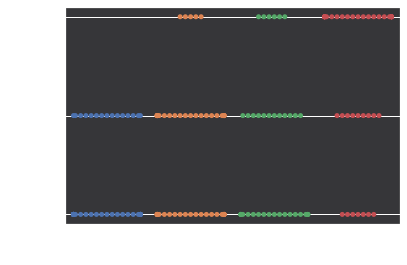

In [88]:
Income2 = sns.swarmplot(x="Income", y="Product", data=Income_Group, order=["Low Income", "Medium Income", "Upper/Middle", "Upper Income"]);

Income2.yaxis.label.set_color('white')
Income2.xaxis.label.set_color('white')
Income2.tick_params(axis='x', colors='white')
Income2.tick_params(axis='y', colors='white')
Income2.set_facecolor('#363639')

# Creates a swarmplot with PP theme colours

In [89]:
Income_Group.drop('Product',axis=1,inplace=True)
Income_Group.drop('Gender',axis=1,inplace=True)
Income_Group.drop('Age',axis=1,inplace=True)
Income_Group.drop('MaritalStatus',axis=1,inplace=True) 
Income_Group.drop('Usage',axis=1,inplace=True)
Income_Group.drop('Fitness',axis=1,inplace=True)
Income_Group.drop('Education',axis=1,inplace=True)
Income_Group.drop('Miles',axis=1,inplace=True)
Income_Group.drop('CustomerID',axis=1,inplace=True)

# these drops leave us with just a column of Edu demographic group names; which can be concatinated with the main table later on
Income_Group.head() # check to see if the columns are dropped...

,Income
0,Low Income
1,Low Income
2,Low Income
3,Low Income
4,Low Income


In [90]:
Income_Group.columns=['Income Class'] # Changes the column header so that it is different from the "Age" column on original dataframe
Income_Group.head()

,Income Class
0,Low Income
1,Low Income
2,Low Income
3,Low Income
4,Low Income


### Variable: Miles (Product Dependent so use PP dataframe)

#### Mode

In [91]:
print(PP['Miles'].mode())  # Prints the mode of Miles

0    85
dtype: int64


#### Range

In [92]:
print(PP['Miles'].max() - PP['Miles'].min())

339


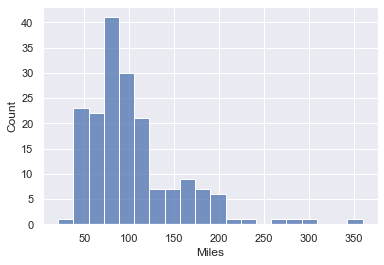

In [93]:
sns.histplot(PP.Miles);

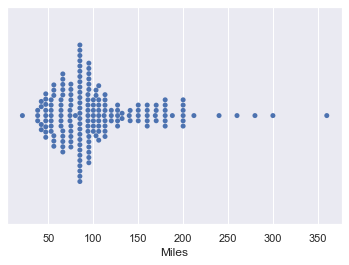

In [94]:
sns.swarmplot(data = PP, x='Miles',); #This graph will give us a nice visual of how the data is dispersed: the frequency of usage (Note: stripplot was used because there are so many data points on just 6 values)

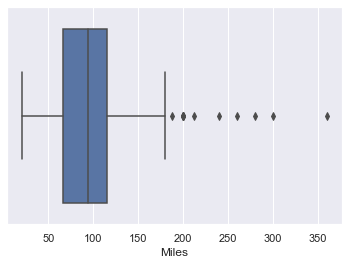

In [95]:
sns.boxplot(data = PP, x ='Miles',); #This graph visualizes the 4 quadriles and shows any outliers

In [96]:
Miles_Group = PP.copy() # This creates a copy of Customer Profile so I can place age variables into buckets

In [97]:
Miles_Group.describe()

,Age,Education,Usage,Fitness,Income,Miles,CustomerID
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,90.500000
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,52.105662
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,1.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,45.750000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,90.500000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,135.250000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,180.000000


In [98]:
Miles_Group.loc[(Miles_Group.Miles < 67),'Miles']=0 # as continuous data, using the same method as for income to create buckets

In [99]:
Miles_Group.loc[(Miles_Group.Miles > 115),'Miles']=3

In [100]:
Miles_Group.loc[(Miles_Group.Miles > 95),'Miles']=2

In [101]:
Miles_Group.loc[(Miles_Group.Miles >= 67),'Miles']=1

In [102]:
Miles_Group['Miles'] = Miles_Group['Miles'].map({0: 'Low', 1: 'Medium', 2: 'Med-High', 
                                                     3: 'High'
                                        })

In [103]:
Miles_Group.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,CustomerID
0,TM195,18,Male,14,Single,3,4,29562,Med-High,1
1,TM195,19,Male,15,Single,2,3,31836,Medium,2
2,TM195,19,Female,14,Partnered,4,3,30699,Low,3
3,TM195,19,Male,12,Single,3,3,32973,Medium,4
4,TM195,20,Male,13,Partnered,4,2,35247,Low,5


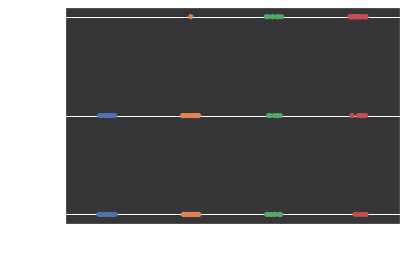

In [104]:
Miles2 = sns.stripplot(data = Miles_Group, x = 'Miles', y='Product', order=["Low", "Medium", "Med-High", "High"], jitter=True,);
Miles2.yaxis.label.set_color('white')
Miles2.xaxis.label.set_color('white')
Miles2.tick_params(axis='x', colors='white')
Miles2.tick_params(axis='y', colors='white')
Miles2.set_facecolor('#363639')

#Creates a stripplot with PP theme colours

In [105]:
Miles_Group.drop('Product',axis=1,inplace=True)
Miles_Group.drop('Gender',axis=1,inplace=True)
Miles_Group.drop('Age',axis=1,inplace=True)
Miles_Group.drop('MaritalStatus',axis=1,inplace=True) 
Miles_Group.drop('Usage',axis=1,inplace=True)
Miles_Group.drop('Fitness',axis=1,inplace=True)
Miles_Group.drop('Education',axis=1,inplace=True)
Miles_Group.drop('Income',axis=1,inplace=True)
Miles_Group.drop('CustomerID',axis=1,inplace=True)

# these drops leave us with just a column of Edu demographic group names; which can be concatinated with the main table later on
Miles_Group.head() # check to see if the columns are dropped...

,Miles
0,Med-High
1,Medium
2,Low
3,Medium
4,Low


In [106]:
Miles_Group.columns=['Mileage Level'] # Changes the column header so that it is different from the "Age" column on original dataframe
Miles_Group.head()

,Mileage Level
0,Med-High
1,Medium
2,Low
3,Medium
4,Low


In [107]:
LMi = 0
MMi = 0
MHMi = 0
HMi = 0

for index in range(0,len(Use_Group)): # The for loop will increase the ID value for each record
    if Miles_Group['Mileage Level'].loc[index] == 'Low':
        LMi = LMi+1
    elif Miles_Group['Mileage Level'].loc[index] == 'Medium':
        MMi = MMi+1
    elif Miles_Group['Mileage Level'].loc[index] == 'Med-High':
        MHMi = MHMi+1
    elif Miles_Group['Mileage Level'].loc[index] == 'High':
        HMi = HMi+1
miles_total = LMi+MMi+MHMi+HMi

print('Low Miles = ', LMi)
print('Medium Miles = ', MMi)
print('Med-High Miles = ', MHMi)
print('High Miles = ', HMi)
print('' )
print('Total count =', miles_total)

# Uses a loop function to count and print the counts

Low Miles =  46
Medium Miles =  61
Med-High Miles =  28
High Miles =  45

Total count = 180


# 04 - Categorical Data

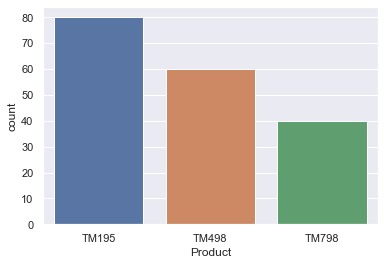

In [108]:
sns.countplot(data = PP, x='Product'); # creates a count plot of the three products

In [109]:
PP['Product'].value_counts() #gives a count output of the variables

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

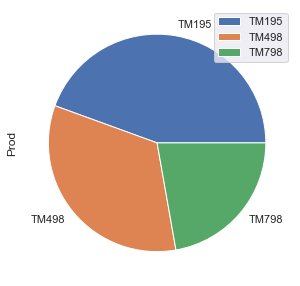

In [110]:
df_Prod = pd.DataFrame({'Prod': [80, 60 , 40],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['TM195', 'TM498', 'TM798'])
plot = df_Prod.plot.pie(y = 'Prod', figsize=(5, 5))   #creates a pie chart of the products

repeat above process for remaining categorical variables

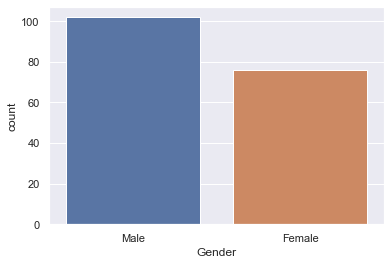

In [111]:
sns.countplot(data = CP, x='Gender'); 

In [112]:
CP['Gender'].value_counts()

Male      102
Female     76
Name: Gender, dtype: int64

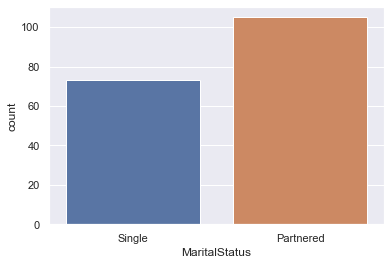

In [113]:
sns.countplot(data = CP, x='MaritalStatus');

In [114]:
CP['MaritalStatus'].value_counts()

Partnered    105
Single        73
Name: MaritalStatus, dtype: int64

## Bivariate Analysis

### Categorical Data

###### Determining the frequency of single males, partnered males, single females and partnered females

We can count more than one variable at the same time by creating loops with If and And statements. Ie the computer will count all instances of Single Males by writing IF gender = male AND Maritalstatus = Single

In [115]:
CP['ID'] = 0 # The first step in the code is to create a temporary column called "ID" 
aw=0         # the two letter variable will allow for automatic updates if the dataframe changes
ax=0
ay=0
az=0
for index in range(0,len(CP)): # The for loop will increase the ID value for each record
    if CP['Gender'].loc[index] == 'Male' and CP['MaritalStatus'].loc[index] == 'Single':
        aw = aw+1
    elif CP['Gender'].loc[index] == 'Male' and CP['MaritalStatus'].loc[index] == 'Partnered':
        ax = ax+1
    elif CP['Gender'].loc[index] == 'Female' and CP['MaritalStatus'].loc[index] == 'Single':
        ay = ay+1
    elif CP['Gender'].loc[index] == 'Female' and CP['MaritalStatus'].loc[index] == 'Partnered':
        az = az+1
av = aw+ax+ay+az       
print('There are', aw, 'single males.' )
print('There are', ax, 'partnered males.' )
print('There are', ay, 'single females.' )
print('There are', az, 'partnered females.' )

print('Total count =', av)


There are 43 single males.
There are 59 partnered males.
There are 30 single females.
There are 46 partnered females.
Total count = 178


###### Determining the frequency of males and females who bought each product

In [116]:
CP['ID'] = 0 # reset the "ID" column 
bu=0
bv=0
bw=0
bx=0
by=0
bz=0
for index in range(0,len(CP)): # The for loop will increase the ID value for each record
    if CP['Gender'].loc[index] == 'Male' and CP['Product'].loc[index] == 'TM195':
        bu = bu+1
    elif CP['Gender'].loc[index] == 'Male' and CP['Product'].loc[index] == 'TM498':
        bv = bv+1
    elif CP['Gender'].loc[index] == 'Male' and CP['Product'].loc[index] == 'TM798':
        bw = bw+1
    elif CP['Gender'].loc[index] == 'Female' and CP['Product'].loc[index] == 'TM195':
        bx = bx+1
    elif CP['Gender'].loc[index] == 'Female' and CP['Product'].loc[index] == 'TM498':
        by = by+1
    elif CP['Gender'].loc[index] == 'Female' and CP['Product'].loc[index] == 'TM798':
        bz = bz+1
bt = bu+bv+bw+bx+by+bz       
print('Males bought', bu, 'Product TM195,', bv, 'Product TM498, and', bw, 'Product TM498' )
print('Females bought', bx, 'Product TM195,', by, 'Product TM498, and', bz, 'Product TM498' )
print('Total count =', bt)

Males bought 40 Product TM195, 29 Product TM498, and 33 Product TM498
Females bought 40 Product TM195, 29 Product TM498, and 7 Product TM498
Total count = 178


###### Determining the frequency of single and partnered individuals who bought each product

In [117]:
CP['ID'] = 0 # resets the ID column
cu=0
cv=0
cw=0
cx=0
cy=0
cz=0
for index in range(0,len(CP)): # The for loop will increase the ID value for each record
    if CP['MaritalStatus'].loc[index] == 'Single' and CP['Product'].loc[index] == 'TM195':
        cu = cu+1
    elif CP['MaritalStatus'].loc[index] == 'Single' and CP['Product'].loc[index] == 'TM498':
        cv = cv+1
    elif CP['MaritalStatus'].loc[index] == 'Single' and CP['Product'].loc[index] == 'TM798':
        cw = cw+1
    elif CP['MaritalStatus'].loc[index] == 'Partnered' and CP['Product'].loc[index] == 'TM195':
        cx = cx+1
    elif CP['MaritalStatus'].loc[index] == 'Partnered' and CP['Product'].loc[index] == 'TM498':
        cy = cy+1
    elif CP['MaritalStatus'].loc[index] == 'Partnered' and CP['Product'].loc[index] == 'TM798':
        cz = cz+1
ct = cu+cv+cw+cx+cy+cz       
print('Single individuals bought', cu, 'Product TM195,', cv, 'Product TM498, and', cw, 'Product TM498' )
print('Partnered individuals bought', cx, 'Product TM195,', cy, 'Product TM498, and', cz, 'Product TM498' )
print('Total count =', ct)

Single individuals bought 32 Product TM195, 24 Product TM498, and 17 Product TM498
Partnered individuals bought 48 Product TM195, 34 Product TM498, and 23 Product TM498
Total count = 178


###### Determining the frequencies of single males and partnered males who bought each product

In [118]:
CP['ID'] = 0 # The first step in the code is to create a temporary column called "ID" 
du=0
dv=0
dw=0
dx=0
dy=0
dz=0
for index in range(0,len(CP)): # The for loop will increase the ID value for each record
    if CP['Gender'].loc[index] == 'Male' and CP['MaritalStatus'].loc[index] == 'Single' and CP['Product'].loc[index] == 'TM195':
        du = du+1
    elif CP['Gender'].loc[index] == 'Male' and CP['MaritalStatus'].loc[index] == 'Single' and CP['Product'].loc[index] == 'TM498':
        dv = dv+1
    elif CP['Gender'].loc[index] == 'Male' and CP['MaritalStatus'].loc[index] == 'Single' and CP['Product'].loc[index] == 'TM798':
        dw = dw+1
    elif CP['Gender'].loc[index] == 'Male' and CP['MaritalStatus'].loc[index] == 'Partnered' and CP['Product'].loc[index] == 'TM195':
        dx = dx+1
    elif CP['Gender'].loc[index] == 'Male' and CP['MaritalStatus'].loc[index] == 'Partnered' and CP['Product'].loc[index] == 'TM498':
        dy = dy+1
    elif CP['Gender'].loc[index] == 'Male' and CP['MaritalStatus'].loc[index] == 'Partnered' and CP['Product'].loc[index] == 'TM798':
        dz = dz+1
dt = du+dv+dw+dx+dy+dz       
print('Single males bought', du, 'Product TM195,', dv, 'Product TM498, and', dw, 'Product TM498' )
print('Partnered males bought', dx, 'Product TM195,', dy, 'Product TM498, and', dz, 'Product TM498' )
print('Total count =', dt)

Single males bought 19 Product TM195, 10 Product TM498, and 14 Product TM498
Partnered males bought 21 Product TM195, 19 Product TM498, and 19 Product TM498
Total count = 102


###### Determining the frequencies of single females and partnered females  who bought each product

In [119]:
CP['ID'] = 0 # The first step in the code is to create a temporary column called "ID" 
eu=0
ev=0
ew=0
ex=0
ey=0
ez=0
for index in range(0,len(CP)): # The for loop will increase the ID value for each record
    if CP['Gender'].loc[index] == 'Female' and CP['MaritalStatus'].loc[index] == 'Single' and CP['Product'].loc[index] == 'TM195':
        eu = eu+1
    elif CP['Gender'].loc[index] == 'Female' and CP['MaritalStatus'].loc[index] == 'Single' and CP['Product'].loc[index] == 'TM498':
        ev = ev+1
    elif CP['Gender'].loc[index] == 'Female' and CP['MaritalStatus'].loc[index] == 'Single' and CP['Product'].loc[index] == 'TM798':
        ew = ew+1
    elif CP['Gender'].loc[index] == 'Female' and CP['MaritalStatus'].loc[index] == 'Partnered' and CP['Product'].loc[index] == 'TM195':
        ex = ex+1
    elif CP['Gender'].loc[index] == 'Female' and CP['MaritalStatus'].loc[index] == 'Partnered' and CP['Product'].loc[index] == 'TM498':
        ey = ey+1
    elif CP['Gender'].loc[index] == 'Female' and CP['MaritalStatus'].loc[index] == 'Partnered' and CP['Product'].loc[index] == 'TM798':
        ez = ez+1
et = eu+ev+ew+ex+ey+ez       
print('Single females bought', eu, 'Product TM195,', ev, 'Product TM498, and', ew, 'Product TM798' )
print('Partnered females bought', ex, 'Product TM195,', ey, 'Product TM498, and', ez, 'Product TM798' )
print('Total count =', et)


Single females bought 13 Product TM195, 14 Product TM498, and 3 Product TM798
Partnered females bought 27 Product TM195, 15 Product TM498, and 4 Product TM798
Total count = 76


###### Summary of Categorical Data

In [120]:
TM195 = pd.Series([du,dx,du+dx,'',eu,ex,eu+ex,'',du+dx+eu+ex],['Single Males','Partnered Males','Total Males','','Single Females','Partnered Females','Total Females', '', 'Totals'])
TM498 = pd.Series([dv,dy,dv+dy,'',ev,ey,ev+ey,'',dv+dy+ev+ey],['Single Males','Partnered Males','Total Males','','Single Females','Partnered Females','Total Females', '', 'Totals'])
TM798 = pd.Series([dw,dz,dw+dz,'',ew,ez,ew+ez,'',dw+dz+ew+ez],['Single Males','Partnered Males','Total Males','','Single Females','Partnered Females','Total Females', '', 'Totals'])
Totals = pd.Series([du+dv+dw,dx+dy+dz,du+dx+dv+dy+dw+dz,'',eu+ev+ew,ex+ey+ez,et,'',du+dx+eu+ex+dv+dy+ev+ey+dw+dz+ew+ez],['Single Males','Partnered Males','Total Males','','Single Females','Partnered Females','Total Females', '', 'Totals'])
CatData = pd.concat([TM195,TM498,TM798,Totals],axis=1,sort=False)

CatData.columns=['TM195','TM498','TM798','Totals']
print('\033[1m' + 'Gender and Marital Status Demographics')
CatData

#this will create an output table of each product type broken down by single and partnered males and single and partnered females


Gender and Marital Status Demographics


,TM195,TM498,TM798,Totals
Single Males,19,10,14,43
Partnered Males,21,19,19,59
Total Males,40,29,33,102
,,,,
Single Females,13,14,3,30
Partnered Females,27,15,4,46
Total Females,40,29,7,76
,,,,
Totals,80,58,40,178


### Plotting with categorical data

In [121]:
Gender_Group = CP.copy() # This creates a copy of Customer Profile so I can place age variables into buckets

In [122]:
Gender_Group['Gender'] = Gender_Group['Gender'].map({'Male': 0, 'Female': 1
                                        })

#Changes the categorical Gender variables to binary: 0 = Male, 1 = Female

In [123]:
Gender_Group.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,CustomerID,ID
0,TM195,18,0,14,Single,3,4,29562,112,1,0
1,TM195,19,0,15,Single,2,3,31836,75,2,0
2,TM195,19,1,14,Partnered,4,3,30699,66,3,0
3,TM195,19,0,12,Single,3,3,32973,85,4,0
4,TM195,20,0,13,Partnered,4,2,35247,47,5,0


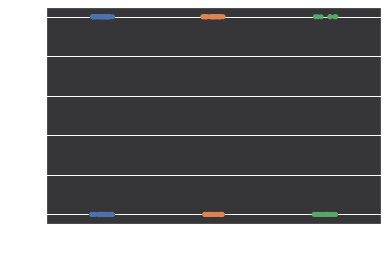

In [124]:
Gen2 = sns.stripplot(data = Gender_Group, x = 'Product', y='Gender', jitter=True,); #stripplot of Product vs Gender with PP colours
Gen2.yaxis.label.set_color('white')
Gen2.xaxis.label.set_color('white')
Gen2.tick_params(axis='x', colors='white')
Gen2.tick_params(axis='y', colors='white')
Gen2.set_facecolor('#363639')

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


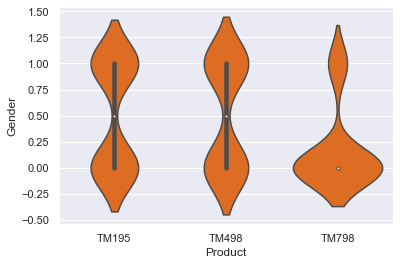

In [125]:
Gen3 = sns.violinplot(Gender_Group['Product'], Gender_Group['Gender'], color = "#FB6704", colour = "#363639")

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


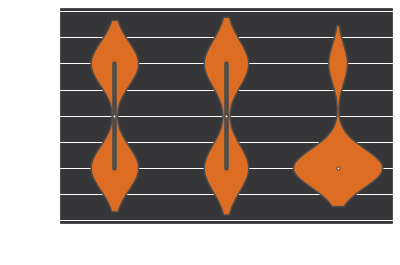

In [126]:
Gen3 = sns.violinplot(Gender_Group['Product'], Gender_Group['Gender'], color = "#FB6704", colour = "#363639")
Gen3.yaxis.label.set_color('white')
Gen3.xaxis.label.set_color('white')
Gen3.tick_params(axis='x', colors='white')
Gen3.tick_params(axis='y', colors='white')
Gen3.set_facecolor('#363639')

Violin plots look cool, but they are actuall misleading in this instance because the data is not continuous. Gender is either a 0 or a 1, which corresponds to the 'fat' portions of the violin but it rounds out the shape in the space beween the variables. 

Repeat the above process using the Marital Status variable (ie. convert to binary)

In [127]:
MS_Group = CP.copy() # This creates a copy of Customer Profile so I can place age variables into buckets

In [128]:
MS_Group['MaritalStatus'] = MS_Group['MaritalStatus'].map({'Single': 0, 'Partnered': 1
                                        })

In [129]:
MS_Group.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,CustomerID,ID
0,TM195,18,Male,14,0,3,4,29562,112,1,0
1,TM195,19,Male,15,0,2,3,31836,75,2,0
2,TM195,19,Female,14,1,4,3,30699,66,3,0
3,TM195,19,Male,12,0,3,3,32973,85,4,0
4,TM195,20,Male,13,1,4,2,35247,47,5,0


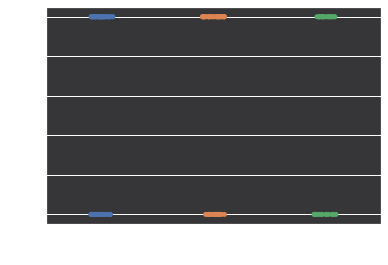

In [130]:
MS2 = sns.stripplot(data = MS_Group, x = 'Product', y='MaritalStatus', jitter=True,); #creates stripplot with PP themes
MS2.yaxis.label.set_color('white')
MS2.xaxis.label.set_color('white')
MS2.tick_params(axis='x', colors='white')
MS2.tick_params(axis='y', colors='white')
MS2.set_facecolor('#363639')

Performing bivariate analysis on data that is already numerical and continuous is more straightforward... 

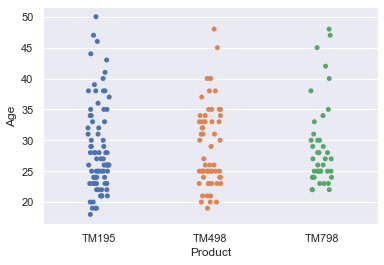

In [131]:
sns.stripplot(data = CGF, x = 'Product', y='Age', jitter=True);

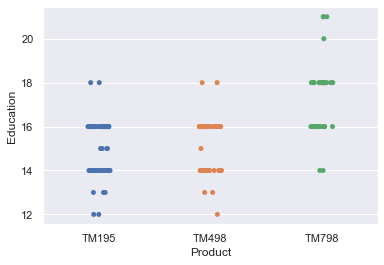

In [132]:
sns.stripplot(data = CGF, x = 'Product', y='Education', jitter=True);

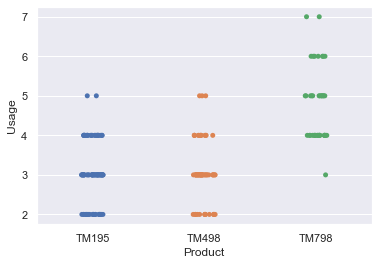

In [133]:
sns.stripplot(data = CGF, x = 'Product', y='Usage', jitter=True);

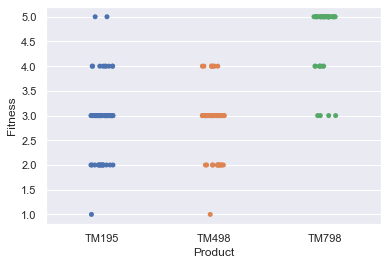

In [134]:
sns.stripplot(data = CGF, x = 'Product', y='Fitness', jitter=True);

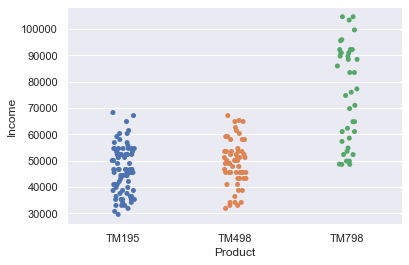

In [135]:
sns.stripplot(data = CGF, x = 'Product', y='Income', jitter=True);

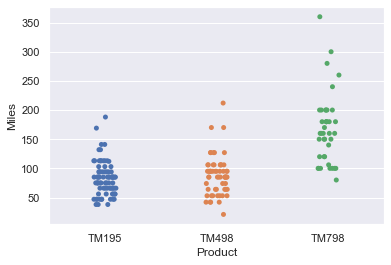

In [136]:
sns.stripplot(data = CGF, x = 'Product', y='Miles', jitter=True);

The above 6 stripplots start to reveal some basic trends about the data.  First, age does not seem to be a strong determinate regarding which product is purchased. Education seems linked to brand, with more people with a lower educational score purchasing the first two products and more individuals with a higher educational score purchasing the TM798 model. Usage, fitness levels and miles tend to be higher with the TM798 model. Finally, people with higher incomes tend to purchase the TM798.

This information can be used as a starting point for the development of trend hypotheses regarding purchasing preferences.  For example, we may guess that higher education helps individuals increase their income and allow them to afford a higher-end model. If TM798 is the higher-end model, it may explain why usage levels and miles are higher: the higher-end machine is probably more comfortable and easier to use.  This additional use could explain why fitness levels are also higher for TM798 users.  This would create a loop scenario where people with higher education can afford better models of exercise equipment, meaning they use them more often, resulting in a demographic that is overall more fit than their less educated and poorer counterparts.

Note: The above analysis was conducted on the CGF dataframe because 180 different products were purchased



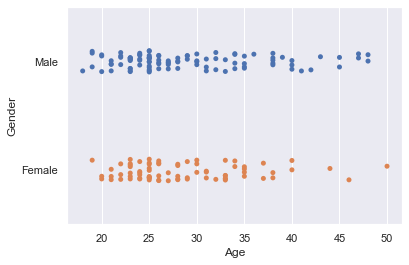

In [137]:
sns.stripplot(data = CP, x = 'Age', y='Gender', jitter=True);

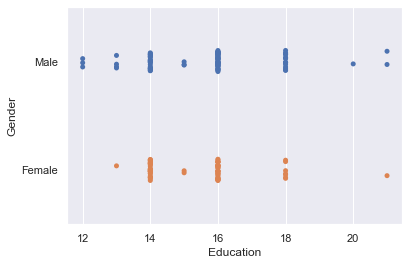

In [138]:
sns.stripplot(data = CP, x = 'Education', y='Gender', jitter=True);

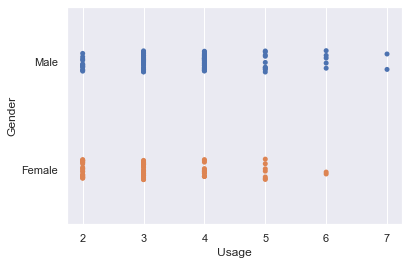

In [139]:
sns.stripplot(data = CP, x = 'Usage', y='Gender', jitter=True);

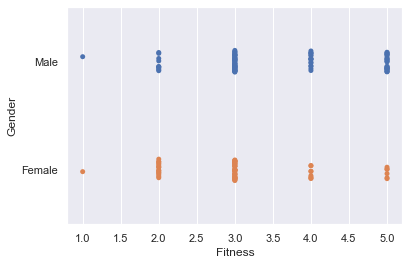

In [140]:
sns.stripplot(data = CP, x = 'Fitness', y='Gender', jitter=True);

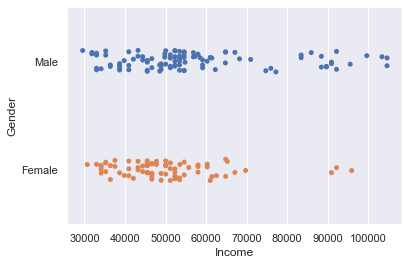

In [141]:
sns.stripplot(data = CP, x = 'Income', y='Gender', jitter=True);

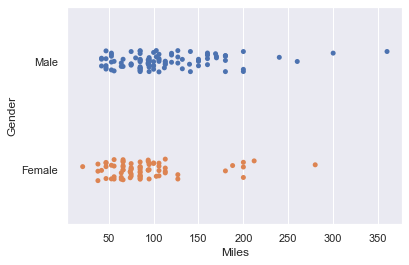

In [142]:
sns.stripplot(data = CP, x = 'Miles', y='Gender', jitter=True);

The above six stripplots are a lot less revealing than the previous six.  It appears that, overall, gender parity has been reached for most of the variables. There seems to be a pretty even distribution of observations when comparing gender to age, education and fitness.  Usage MAY be higher amongst males than females, but this would require further investigation.  It does appear, however, that there are more men than women in the highest income brackets and males tend to log more miles than females.

Further testing will be conducted below.

Note: The above analysis was conducted on the CP dataframe because there are only 178 distinct customers

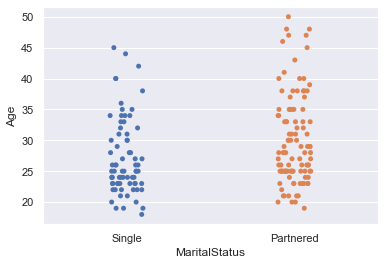

In [143]:
sns.stripplot(data = CP, x = 'MaritalStatus', y='Age', jitter=True);

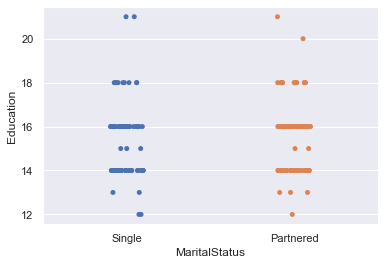

In [144]:
sns.stripplot(data = CP, x = 'MaritalStatus', y='Education', jitter=True);

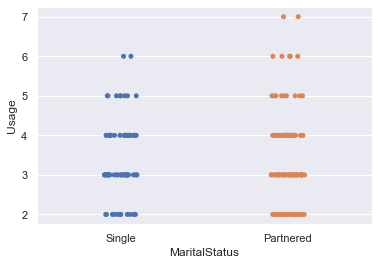

In [145]:
sns.stripplot(data = CP, x = 'MaritalStatus', y='Usage', jitter=True);

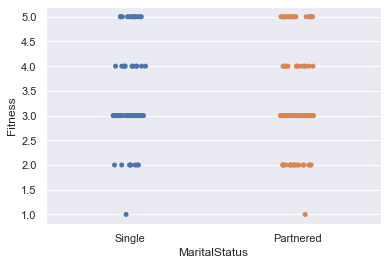

In [146]:
sns.stripplot(data = CP, x = 'MaritalStatus', y='Fitness', jitter=True);

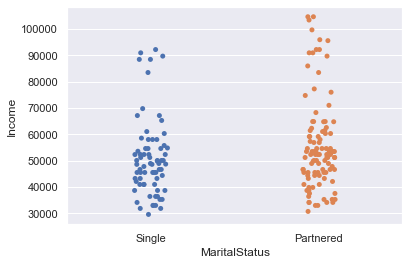

In [147]:
sns.stripplot(data = CP, x = 'MaritalStatus', y='Income', jitter=True);

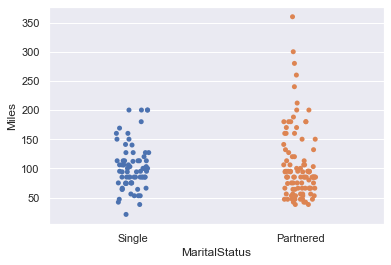

In [148]:
sns.stripplot(data = CP, x = 'MaritalStatus', y='Miles', jitter=True);

Once again, the above 6 stripplots reveals the beginnings of some trends that may be occuring in the data.  At first glance, it appears that partnered people are more represented when usage is high, miles logged is high, in the highest income brackets and it appears that the oldest customers were more likely to be partnered than single.  The variables as well as lower usage, lower miles logged and lower income brackets seem to be evenly represented by both partnered and single people. 

Note: The above analysis was conducted on the CP dataframe because there are only 178 distinct customers

## Transforming Categorical Data to Binary

We already saw one way to accomplish this with Gender and Marital Status. Product is also categorical but it has THREE disticnt values: TM195, TM498 and TM798

In [149]:
obj_df = CP.select_dtypes(include=['object']).copy() #creates a copy of the dataframe 
obj_df.head()

,Product,Gender,MaritalStatus,CustomerID
0,TM195,Male,Single,1
1,TM195,Male,Single,2
2,TM195,Female,Partnered,3
3,TM195,Male,Single,4
4,TM195,Male,Partnered,5


In [150]:
obj_df["Product"].value_counts()

TM195    80
TM498    58
TM798    40
Name: Product, dtype: int64

In [151]:
oe_style = ohe()
oe_results = oe_style.fit_transform(obj_df[["Product"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

,TM195,TM498,TM798
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [152]:
obj_df = obj_df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))

In [153]:
obj_df.head()

,Product,Gender,MaritalStatus,CustomerID,"(TM195,)","(TM498,)","(TM798,)"
0,TM195,Male,Single,1,1.0,0.0,0.0
1,TM195,Male,Single,2,1.0,0.0,0.0
2,TM195,Female,Partnered,3,1.0,0.0,0.0
3,TM195,Male,Single,4,1.0,0.0,0.0
4,TM195,Male,Partnered,5,1.0,0.0,0.0


In [154]:
obj_df["Gender"].value_counts()

Male      102
Female     76
Name: Gender, dtype: int64

In [155]:
oe_style = ohe()
oe_results = oe_style.fit_transform(obj_df[["Gender"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

,Female,Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [156]:
obj_df = obj_df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))

In [157]:
obj_df["MaritalStatus"].value_counts()

Partnered    105
Single        73
Name: MaritalStatus, dtype: int64

In [158]:
oe_style = ohe()
oe_results = oe_style.fit_transform(obj_df[["MaritalStatus"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

,Partnered,Single
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [159]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        178 non-null    object 
 1   Gender         178 non-null    object 
 2   MaritalStatus  178 non-null    object 
 3   CustomerID     178 non-null    object 
 4   (TM195,)       178 non-null    float64
 5   (TM498,)       178 non-null    float64
 6   (TM798,)       178 non-null    float64
 7   (Female,)      178 non-null    float64
 8   (Male,)        178 non-null    float64
dtypes: float64(5), object(4)
memory usage: 12.6+ KB


In [160]:
qwerty

NameError: name 'qwerty' is not defined

In [ ]:
obj_df = obj_df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))

In [ ]:
obj_df.head()

In [ ]:
obj_df.columns = ['Product', 'Gender', 'MaritalStatus', 'CustomerID','TM195', 'TM498', 'TM798', 'Female', 'Male', 'Partnered','Single']
obj_df

In [ ]:
obj_df.drop('Product',axis=1,inplace=True) 
obj_df.drop('Gender',axis=1,inplace=True)
obj_df.drop('MaritalStatus',axis=1,inplace=True) # this drops the first 3 columns so when we join to the CP dataframe there wont be duplicate columns
obj_df.head() # check to see if the columns are dropped...

In [ ]:
CP.drop('ID',axis=1,inplace=True) # this drops the temporary ID column since its no longer needed
CP.head() # check to see if the ID column is dropped...

In [ ]:
obj_df.shape

In [ ]:
CP.iloc[100:110, :]

In [ ]:
obj_df.iloc[100:110, :]

In [ ]:
CP_bi= pd.merge(CP, obj_df, on='CustomerID', how='outer')

CP_bi

The above table shows that all the categorical data has been copied and converted to numerical data. Statistical analysis can nw be preformed 

## Plotting Bivariate Distributions

Now that we have the categorical data converted to binary form, we can begin to conduct some additional graphical analysis on the data

In [ ]:
CP_bi.info() #checking to see if the changes made above changed the categorical data to numerical. if floats then yes!

In [ ]:
CP_bi['TM195'] = CP_bi['TM195'].apply(int) # this converts the float to an integer so that we can compare integers using jointplots
CP_bi['TM498'] = CP_bi['TM498'].apply(int)
CP_bi['TM798'] = CP_bi['TM798'].apply(int)
CP_bi['Female'] = CP_bi['Female'].apply(int)
CP_bi['Male'] = CP_bi['Male'].apply(int)
CP_bi['Partnered'] = CP_bi['Partnered'].apply(int)
CP_bi['Single'] = CP_bi['Single'].apply(int)

In [ ]:
CP_bi.info ()

In [ ]:
# all integers mean we can now compare apples to apples

In [ ]:
sns.pairplot(CP, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

In [ ]:
sns.jointplot(data = CP, x = 'Age', y = 'Income', kind="hex");

In [ ]:
sns.jointplot(data = CP_bi, x = 'TM798', y = 'Income', kind="hex");

In [ ]:
CP_bi.corr() # this command will create a table of all variables and how they correlate with each othere

In [ ]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(CP_bi.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

In [ ]:
### Change the lables to white for the PP slides
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(CP_bi.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.show()

# 05 - Creating Buckets... grouping customers based on different variables such as gender and age

The following codes basically creates counters, initially set to 0, that will increase based on looped If and And statements, and then print the results.  Using this tool and changing the variables, we can count different combinations of attributes at the same time, unless otherwise stated, this is for Customer Profiling and will use the n = 178 CP dataframe

In [ ]:
counterZ = 0
counterX = 0
counterY = 0

for index in range(0,len(CP_bi)): # The for loop will increase the ID value for each record
    if CP_bi['Age'].loc[index] <= 25:
        counterZ = counterZ + 1
    elif CP_bi['Age'].loc[index] >= 41:
        counterX = counterX + 1
    else:
        counterY = counterY + 1
print('There are', counterZ, 'people belonging to Gen Z (25 years old or younger)' )
print('There are', counterY, 'people belonging to Gen Y (between 26 and 40 years old)' )
print('There are', counterX, 'people belonging to Gen X (41 years old or older)' )
print('Total:', counterZ+counterY+counterX)

In [ ]:
counterHS = 0 # will count people who finished High School - HS 
counterSC = 0 # will count people who finished Some College/University - SC 
counterCG = 0 # will count people who graduated from college - CG
counterPG = 0 # will count people who have attened post graduate education programs - PG

for index in range(0,len(CP_bi)): # The for loop will increase the ID value for each record
    if CP_bi['Education'].loc[index] <= 13:
        counterHS = counterHS + 1
    elif CP_bi['Education'].loc[index] >= 17:
        counterPG = counterPG + 1
    elif CP_bi['Education'].loc[index] == 16:
        counterCG = counterCG + 1
    else:
        counterSC = counterSC + 1
print('There are', counterHS, 'people who graduated high school (education levels 12 or 13)' )
print('There are', counterSC, 'people who finished some college or university (education levels 14 or 15)' )
print('There are', counterCG, 'people who graduated university (education level 16)' )
print('There are', counterPG, 'people who graduated university (education levels 17 to 21)' )
print('Total:', counterHS+counterSC+counterCG+counterPG)

In [ ]:
counterLI = 0 # will count people who have incomes between $29k and $43.5K - Lower Income (Q1)
counterMI = 0 # will count people who have incomes between $43.6k and $51.2K - Middle Income (Q2)
counterUM = 0 # will count people who have incomes between $51.3k and $59K - Upper/Middle Income (Q3)
counterUI = 0 # will count people who have incomes between $59.1k+ - Upper Income (Q3)

for index in range(0,len(CP_bi)): # The for loop will increase the ID value for each record
    if CP_bi['Income'].loc[index] <= 43490.25:
        counterLI = counterLI + 1
    elif CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterMI = counterMI + 1
    elif CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterUM = counterUM + 1
    else:
        counterUI = counterUI + 1
print('There are', counterLI, 'people who have incomes lower than $43,490.25 (Q1)' )
print('There are', counterMI, 'people who have incomes between than $43,490.25 and $51,165.00 (Q2)' )
print('There are', counterUM, 'people who have incomes between than $51,165.00 and $58,972.00 (Q3)' )
print('There are', counterUI, 'people who have incomes greated than $58,972.00 (Q4)' )
print('Total:', counterLI+counterMI+counterUM+counterUI)

In [ ]:
counterZM = 0 # Counting the number of individuals who are Gen Z AND Male
counterZF = 0 # Counting the number of individuals who are Gen Z AND Female
counterYM = 0 # Counting the number of individuals who are Gen Y AND Male
counterYF = 0 # Counting the number of individuals who are Gen Y AND Female
counterXM = 0 # Counting the number of individuals who are Gen X AND Male
counterXF = 0 # Counting the number of individuals who are Gen X AND Female

for index in range(0,len(CP_bi)): # The for loop will increase the ID value for each record
    if CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male':
        counterZM = counterZM + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female':
        counterZF = counterZF + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male':
        counterYM = counterYM + 1 
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female':
        counterYF = counterYF + 1     
    elif CP_bi['Age'].loc[index] > 40 and CP_bi['Gender'].loc[index] == 'Male':
        counterXM = counterXM + 1
    elif CP_bi['Age'].loc[index] > 40 and CP_bi['Gender'].loc[index] == 'Female':
        counterXF = counterXF + 1
        
print('There are', counterZM, 'people who are Male and belong to Gen Z (25 years old or younger)' )
print('There are', counterZF, 'people who are Female and belong to Gen Z (25 years old or younger)' )
print('There are', counterYM, 'people who are Male and belong to Gen Y (between 26 and 40 years old)' )
print('There are', counterZF, 'people who are Female and belong to Gen Z (25 years old or younger)' )
print('There are', counterXM, 'people who are Male and belong to Gen X (41 years old or older)' )
print('There are', counterXF, 'people who are Female and belong to Gen Z (25 years old or younger)' )
print('Total:', counterZM+counterZF+counterYM+counterYF+counterXM+counterXF)

In [ ]:
counterZMHS = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School
counterZMSC = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university
counterZMCG = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university
counterZMPG = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program

counterZFHS = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School
counterZFSC = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university
counterZFCG = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university
counterZFPG = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program


for index in range(0,len(CP_bi)): # The for loop will increase the ID value for each record
    if CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] <= 13:
        counterZMHS = counterZMHS + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16:
        counterZMSC = counterZMSC + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] == 16:
        counterZMCG = counterZMCG + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] >= 17:
        counterZMPG = counterZMPG + 1    
        
# Above is male; below is female... creating a separation to ease troubleshooting

    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 13:
        counterZFHS = counterZFHS + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16:
        counterZFSC = counterZFSC + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] == 16:
        counterZFCG = counterZFCG + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] >= 17:
        counterZFPG = counterZFPG + 1  
  
        
print('There are', counterZMHS, 'people who are Male, belong to Gen Z and have completed high school' )
print('There are', counterZMSC, 'people who are Male, belong to Gen Z and have completed some college/university' )
print('There are', counterZMCG, 'people who are Male, belong to Gen Z and have graduated from college/university' )
print('There are', counterZMPG, 'people who are Male, belong to Gen Z and have attended a post-graduate program' )
print('')
print('There are', counterZFHS, 'people who are Female, belong to Gen Z and have completed high school' )
print('There are', counterZFSC, 'people who are Female, belong to Gen Z and have completed some college/university' )
print('There are', counterZFCG, 'people who are Female, belong to Gen Z and have graduated from college/university' )
print('There are', counterZFPG, 'people who are Female, belong to Gen Z and have attended a post-graduate program' )
print('')
TotalZEd = counterZMHS+counterZMSC+counterZMCG+counterZMPG+counterZFHS+counterZFSC+counterZFCG+counterZFPG
print('Total:', TotalZEd )

In [ ]:
counterYMHS = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School
counterYMSC = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university
counterYMCG = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university
counterYMPG = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program

counterYFHS = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School
counterYFSC = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university
counterYFCG = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university
counterYFPG = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program


for index in range(0,len(CP_bi)): # The for loop will increase the ID value for each record
    if CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] < 41 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] <= 13:
        counterYMHS = counterYMHS + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] < 41 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16:
        counterYMSC = counterYMSC + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] < 41 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] == 16:
        counterYMCG = counterYMCG + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] < 41 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] >= 17:
        counterYMPG = counterYMPG + 1    
        
# Above is male; below is female... creating a separation to ease troubleshooting

    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] < 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 13:
        counterYFHS = counterYFHS + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] < 41 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16:
        counterYFSC = counterYFSC + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] < 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] == 16:
        counterYFCG = counterYFCG + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] < 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] >= 17:
        counterYFPG = counterYFPG + 1  
  
        
print('There are', counterYMHS, 'people who are Male, belong to Gen Y and have completed high school' )
print('There are', counterYMSC, 'people who are Male, belong to Gen Y and have completed some college/university' )
print('There are', counterYMCG, 'people who are Male, belong to Gen Y and have graduated from college/university' )
print('There are', counterYMPG, 'people who are Male, belong to Gen Y and have attended a post-graduate program' )
print('')
print('There are', counterYFHS, 'people who are Male, belong to Gen Y and have completed high school' )
print('There are', counterYFSC, 'people who are Male, belong to Gen Y and have completed some college/university' )
print('There are', counterYFCG, 'people who are Male, belong to Gen Y and have graduated from college/university' )
print('There are', counterYFPG, 'people who are Male, belong to Gen Y and have attended a post-graduate program' )
print('')
TotalYEd = counterYMHS+counterYMSC+counterYMCG+counterYMPG+counterYFHS+counterYFSC+counterYFCG+counterYFPG
print('Total:', TotalYEd)

In [ ]:
counterXMHS = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School
counterXMSC = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university
counterXMCG = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university
counterXMPG = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program

counterXFHS = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School
counterXFSC = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university
counterXFCG = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university
counterXFPG = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program


for index in range(0,len(CP_bi)): # The for loop will increase the ID value for each record
    if CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] <= 13:
        counterXMHS = counterXMHS + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16:
        counterXMSC = counterXMSC + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] == 16:
        counterXMCG = counterXMCG + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] >= 17:
        counterXMPG = counterXMPG + 1    
        
# Above is male; below is female... creating a separation to ease troubleshooting

    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 13:
        counterXFHS = counterXFHS + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16:
        counterXFSC = counterXFSC + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] == 16:
        counterXFCG = counterXFCG + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] >= 17:
        counterXFPG = counterXFPG + 1  
  
        
print('There are', counterXMHS, 'people who are Male, belong to Gen X and have completed high school' )
print('There are', counterXMSC, 'people who are Male, belong to Gen X and have completed some college/university' )
print('There are', counterXMCG, 'people who are Male, belong to Gen X and have graduated from college/university' )
print('There are', counterXMPG, 'people who are Male, belong to Gen X and have attended a post-graduate program' )
print('')
print('There are', counterXFHS, 'people who are Female, belong to Gen X and have completed high school' )
print('There are', counterXFSC, 'people who are Female, belong to Gen X and have completed some college/university' )
print('There are', counterXFCG, 'people who are Female, belong to Gen X and have graduated from college/university' )
print('There are', counterXFPG, 'people who are Female, belong to Gen X and have attended a post-graduate program' )
print('')
TotalXEd = counterXMHS+counterXMSC+counterXMCG+counterXMPG+counterXFHS+counterXFSC+counterXFCG+counterXFPG
print('Total:', TotalXEd)

In [ ]:
print('Total:', TotalZEd + TotalYEd + TotalXEd) # quick check to make sure it adds up to 178

In [ ]:
# Gen Z Males
counterZMHSLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have a Low Income
counterZMHSMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have a Medium Income
counterZMHSMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have an Upper/Middle Income
counterZMHSUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have an Upper Income

counterZMSCLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have a Low Income
counterZMSCMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have a Medium Income
counterZMSCMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have an Upper/Middle Income
counterZMSCUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have an Upper Income

counterZMCGLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have a Lower Income
counterZMCGMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have a Medium Income
counterZMCGMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have an Upper/Middle Income
counterZMCGUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have an Upper/Middle Income

counterZMPGLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have a Lower Income
counterZMPGMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have a Medium Income
counterZMPGMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have an Upper/Middle Income
counterZMPGUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have an Upper Income

for index in range(0,len(CP_bi)): # The for loop will increase the ID value for each record
# Male, Gen Z, Highschool     
    if CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] <= 43490.25:
        counterZMHSLI = counterZMHSLI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterZMHSMI = counterZMHSMI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterZMHSMU = counterZMHSMU + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] <= 58972.00:
        counterZMHSUI = counterZMHSUI + 1   
      
# Male, Gen Z, some college 

    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] >= 14 and CP_bi['Education'].loc[index] <= 15 and CP_bi['Income'].loc[index] <= 43490.25:
        counterZMSCLI = counterZMSCLI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterZMSCMI = counterZMSCMI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterZMSCMU = counterZMSCMU + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] <= 58972.00:
        counterZMSCUI = counterZMSCUI + 1   

 
# Male, Gen Z, college grads

    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] == 16 and CP_bi['Income'].loc[index] <= 43490.25:
        counterZMCGLI = counterZMCGLI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] == 16 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterZMCGMI = counterZMCGMI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] == 16 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] < 58972.00:
        counterZMCGMU = counterZMCGMU + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] == 16 and CP_bi['Income'].loc[index] >= 58972.00:
        counterZMCGUI = counterZMCGUI + 1  

# Male, Gen Z, postgrad

    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] <= 43490.25:
        counterZMPGLI = counterZMPGLI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterZMPGMI = counterZMPGMI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] < 58972.00:
        counterZMPGMU = counterZMPGMU + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] >= 58972.00:
        counterZMPGUI = counterZMPGUI + 1  
        
TotalZMHSI = counterZMHSLI+counterZMHSMI+counterZMHSMU+counterZMHSUI  
TotalZMSCI = counterZMSCLI+counterZMSCMI+counterZMSCMU+counterZMSCUI   
TotalZMCGI = counterZMCGLI+counterZMCGMI+counterZMCGMU+counterZMCGUI
TotalZMPGI = counterZMPGLI+counterZMPGMI+counterZMPGMU+counterZMPGUI
        
print('There are', counterZMHSLI, 'people who are Male, belong to Gen Z, have completed high school and have incomes lower than $43,490.25' )
print('There are', counterZMHSMI, 'people who are Male, belong to Gen Z, have completed high school and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterZMHSMU, 'people who are Male, belong to Gen Z, have completed high school and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterZMHSUI, 'people who are Male, belong to Gen Z, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who graduated Highschool:', TotalZMHSI )
print('')
print('There are', counterZMSCLI, 'people who are Male, belong to Gen Z, have some college/university and have incomes lower than $43,490.25' )
print('There are', counterZMSCMI, 'people who are Male, belong to Gen Z, have some college/university and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterZMSCMU, 'people who are Male, belong to Gen Z, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZMSCUI, 'people who are Male, belong to Gen Z, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who have some college/university:', TotalZMSCI )
print('')
print('There are', counterZMCGLI, 'people who are Male, belong to Gen Z, college/university grads and have incomes lower than $43,490.25' )
print('There are', counterZMCGMI, 'people who are Male, belong to Gen Z, college/university grads and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterZMCGMU, 'people who are Male, belong to Gen Z, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterZMCGUI, 'people who are Male, belong to Gen Z, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who graduated college/university:', TotalZMCGI )
print('')
print('There are', counterZMPGLI, 'people who are Male, belong to Gen Z, have attended post grad and have incomes lower than $43,490.25' )
print('There are', counterZMPGMI, 'people who are Male, belong to Gen Z, have attended post grad and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterZMPGMU, 'people who are Male, belong to Gen Z, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZMPGUI, 'people who are Male, belong to Gen Z, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who have attended post grad:', TotalZMPGI )


In [ ]:
# Gen Z Females
counterZFHSLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have a Low Income
counterZFHSMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have a Medium Income
counterZFHSMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have an Upper/Middle Income
counterZFHSUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have an Upper Income

counterZFSCLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have a Low Income
counterZFSCMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have a Medium Income
counterZFSCMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have an Upper/Middle Income
counterZFSCUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have an Upper Income

counterZFCGLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have a Lower Income
counterZFCGMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have a Medium Income
counterZFCGMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have an Upper/Middle Income
counterZFCGUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have an Upper/Middle Income

counterZFPGLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have a Lower Income
counterZFPGMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have a Medium Income
counterZFPGMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have an Upper/Middle Income
counterZFPGUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have an Upper Incomem

for index in range(0,len(CP_bi)): # The for loop will increase the ID value for each record
# Female, Gen Z, Highschool     
    if CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] <= 43490.25:
        counterZFHSLI = counterZFHSLI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterZFHSMI = counterZFHSMI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterZFHSMU = counterZFHSMU + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] <= 58972.00:
        counterZFHSUI = counterZFHSUI + 1   
      
# Female, Gen Z, some college 

    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] <= 43490.25:
        counterZFSCLI = counterZFSCLI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterZFSCMI = counterZFSCMI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterZFSCMU = counterZFSCMU + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] <= 58972.00:
        counterZFSCUI = counterZFSCUI + 1   

 
# Male, Gen Z, college grads

    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] <= 43490.25:
        counterZFCGLI = counterZFCGLI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterZFCGMI = counterZFCGMI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterZFCGMU = counterZFCGMU + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] >= 58972.00:
        counterZFCGUI = counterZFCGUI + 1  

# Male, Gen Z, postgrad

    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] <= 43490.25:
        counterZFPGLI = counterZFPGLI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterZFPGMI = counterZFPGMI + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterZFPGMU = counterZFPGMU + 1
    elif CP_bi['Age'].loc[index] <= 25 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] >= 58972.00:
        counterZFPGUI = counterZFPGUI + 1  
        
TotalZFHSI = counterZFHSLI+counterZFHSMI+counterZFHSMU+counterZFHSUI  
TotalZFSCI = counterZFSCLI+counterZFSCMI+counterZFSCMU+counterZFSCUI   
TotalZFCGI = counterZFCGLI+counterZFCGMI+counterZFCGMU+counterZFCGUI
TotalZFPGI = counterZFPGLI+counterZFPGMI+counterZFPGMU+counterZFPGUI
        
print('There are', counterZFHSLI, 'people who are Female, belong to Gen Z, have completed high school and have incomes lower than $42,490.25' )
print('There are', counterZFHSMI, 'people who are Female, belong to Gen Z, have completed high school and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterZFHSMU, 'people who are Female, belong to Gen Z, have completed high school and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZFHSUI, 'people who are Female, belong to Gen Z, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who graduated Highschool:', TotalZFHSI )
print('')
print('There are', counterZFSCLI, 'people who are Female, belong to Gen Z, have some college/university and have incomes lower than $42,490.25' )
print('There are', counterZFSCMI, 'people who are Female, belong to Gen Z, have some college/university and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterZFSCMU, 'people who are Female, belong to Gen Z, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZFSCUI, 'people who are Female, belong to Gen Z, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who have some college/university:', TotalZFSCI )
print('')
print('There are', counterZFCGLI, 'people who are Female, belong to Gen Z, college/university grads and have incomes lower than $42,490.25' )
print('There are', counterZFCGMI, 'people who are Female, belong to Gen Z, college/university grads and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterZFCGMU, 'people who are Female, belong to Gen Z, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterZFCGUI, 'people who are Female, belong to Gen Z, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who graduated college/university:', TotalZFCGI )
print('')
print('There are', counterZFPGLI, 'people who are Female, belong to Gen Z, have attended post grad and have incomes lower than $42,490.25' )
print('There are', counterZFPGMI, 'people who are Female, belong to Gen Z, have attended post grad and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterZFPGMU, 'people who are Female, belong to Gen Z, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZFPGUI, 'people who are Female, belong to Gen Z, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who have attended post grad:', TotalZFPGI )

In [ ]:
# Gen Y Males
counterYMHSLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have a Low Income
counterYMHSMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have a Medium Income
counterYMHSMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have an Upper/Middle Income
counterYMHSUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have an Upper Income

counterYMSCLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have a Low Income
counterYMSCMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have a Medium Income
counterYMSCMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have an Upper/Middle Income
counterYMSCUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have an Upper Income

counterYMCGLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have a Lower Income
counterYMCGMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have a Medium Income
counterYMCGMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have an Upper/Middle Income
counterYMCGUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have an Upper/Middle Income

counterYMPGLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have a Lower Income
counterYMPGMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have a Medium Income
counterYMPGMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have an Upper/Middle Income
counterYMPGUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have an Upper Income

for index in range(0,len(CP_bi)): # The for loop will increase the ID value for each record
# Male, Gen Y, Highschool     
    if CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] <= 43490.25:
        counterYMHSLI = counterYMHSLI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterYMHSMI = counterYMHSMI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterYMHSMU = counterYMHSMU + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] >= 58972.00:
        counterYMHSUI = counterYMHSUI + 1   
      
# Male, Gen Y, some college 

    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] <= 43490.25:
        counterYMSCLI = counterYMSCLI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterYMSCMI = counterYMSCMI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterYMSCMU = counterYMSCMU + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] >= 58972.00:
        counterYMSCUI = counterYMSCUI + 1   

 
# Male, Gen Y, college grads

    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] <= 43490.25:
        counterYMCGLI = counterYMCGLI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterYMCGMI = counterYMCGMI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterYMCGMU = counterYMCGMU + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] >= 58972.00:
        counterYMCGUI = counterYMCGUI + 1  

# Male, Gen Y, postgrad

    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] <= 43490.25:
        counterYMPGLI = counterYMPGLI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterYMPGMI = counterYMPGMI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterYMPGMU = counterYMPGMU + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] >= 58972.00:
        counterYMPGUI = counterYMPGUI + 1  
        
TotalYMHSI = counterYMHSLI+counterYMHSMI+counterYMHSMU+counterYMHSUI  
TotalYMSCI = counterYMSCLI+counterYMSCMI+counterYMSCMU+counterYMSCUI   
TotalYMCGI = counterYMCGLI+counterYMCGMI+counterYMCGMU+counterYMCGUI
TotalYMPGI = counterYMPGLI+counterYMPGMI+counterYMPGMU+counterYMPGUI
        
print('There are', counterYMHSLI, 'people who are Male, belong to Gen Y, have completed high school and have incomes lower than $43,490.25' )
print('There are', counterYMHSMI, 'people who are Male, belong to Gen Y, have completed high school and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterYMHSMU, 'people who are Male, belong to Gen Y, have completed high school and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterYMHSUI, 'people who are Male, belong to Gen Y, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who graduated Highschool:', TotalYMHSI )
print('')
print('There are', counterYMSCLI, 'people who are Male, belong to Gen Y, have some college/university and have incomes lower than $43,490.25' )
print('There are', counterYMSCMI, 'people who are Male, belong to Gen Y, have some college/university and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYMSCMU, 'people who are Male, belong to Gen Y, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYMSCUI, 'people who are Male, belong to Gen Y, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who have some college/university:', TotalYMSCI )
print('')
print('There are', counterYMCGLI, 'people who are Male, belong to Gen Y, college/university grads and have incomes lower than $43,490.25' )
print('There are', counterYMCGMI, 'people who are Male, belong to Gen Y, college/university grads and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterYMCGMU, 'people who are Male, belong to Gen Y, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterYMCGUI, 'people who are Male, belong to Gen Y, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who graduated college/university:', TotalYMCGI )
print('')
print('There are', counterYMPGLI, 'people who are Male, belong to Gen Y, have attended post grad and have incomes lower than $43,490.25' )
print('There are', counterYMPGMI, 'people who are Male, belong to Gen Y, have attended post grad and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYMPGMU, 'people who are Male, belong to Gen Y, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYMPGUI, 'people who are Male, belong to Gen Y, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who have attended post grad:', TotalYMPGI )


In [ ]:
# Gen Y Females
counterYFHSLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have a Low Income
counterYFHSMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have a Medium Income
counterYFHSMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have an Upper/Middle Income
counterYFHSUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have an Upper Income

counterYFSCLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have a Low Income
counterYFSCMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have a Medium Income
counterYFSCMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have an Upper/Middle Income
counterYFSCUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have an Upper Income

counterYFCGLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have a Lower Income
counterYFCGMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have a Medium Income
counterYFCGMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have an Upper/Middle Income
counterYFCGUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have an Upper/Middle Income

counterYFPGLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have a Lower Income
counterYFPGMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have a Medium Income
counterYFPGMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have an Upper/Middle Income
counterYFPGUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have an Upper Incomem

for index in range(0,len(CP_bi)): # The for loop will increase the ID value for each record
# Female, Gen Y, Highschool     
    if CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] <= 43490.25:
        counterYFHSLI = counterYFHSLI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterYFHSMI = counterYFHSMI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterYFHSMU = counterYFHSMU + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] <= 58972.00:
        counterYFHSUI = counterYFHSUI + 1   
      
# Female, Gen Y, some college 

    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] <= 43490.25:
        counterYFSCLI = counterYFSCLI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterYFSCMI = counterYFSCMI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterYFSCMU = counterYFSCMU + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40> 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] <= 58972.00:
        counterYFSCUI = counterYFSCUI + 1   

 
# Male, Gen Y, college grads

    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] <= 43490.25:
        counterYFCGLI = counterYFCGLI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterYFCGMI = counterYFCGMI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterYFCGMU = counterYFCGMU + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] > 58972.00:
        counterYFCGUI = counterYFCGUI + 1  

# Male, Gen Y, postgrad

    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] <= 43490.25:
        counterYFPGLI = counterYFPGLI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterYFPGMI = counterYFPGMI + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterYFPGMU = counterYFPGMU + 1
    elif CP_bi['Age'].loc[index] > 25 and CP_bi['Age'].loc[index] <= 40 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] >= 58972.00:
        counterYFPGUI = counterYFPGUI + 1  
        
TotalYFHSI = counterYFHSLI+counterYFHSMI+counterYFHSMU+counterYFHSUI  
TotalYFSCI = counterYFSCLI+counterYFSCMI+counterYFSCMU+counterYFSCUI   
TotalYFCGI = counterYFCGLI+counterYFCGMI+counterYFCGMU+counterYFCGUI
TotalYFPGI = counterYFPGLI+counterYFPGMI+counterYFPGMU+counterYFPGUI
        
print('There are', counterYFHSLI, 'people who are Female, belong to Gen Y, have completed high school and have incomes lower than $43,490.25' )
print('There are', counterYFHSMI, 'people who are Female, belong to Gen Y, have completed high school and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYFHSMU, 'people who are Female, belong to Gen Y, have completed high school and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYFHSUI, 'people who are Female, belong to Gen Y, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who graduated Highschool:', TotalYFHSI )
print('')
print('There are', counterYFSCLI, 'people who are Female, belong to Gen Y, have some college/university and have incomes lower than $43,490.25' )
print('There are', counterYFSCMI, 'people who are Female, belong to Gen Y, have some college/university and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYFSCMU, 'people who are Female, belong to Gen Y, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYFSCUI, 'people who are Female, belong to Gen Y, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who have some college/university:', TotalYFSCI )
print('')
print('There are', counterYFCGLI, 'people who are Female, belong to Gen Y, college/university grads and have incomes lower than $43,490.25' )
print('There are', counterYFCGMI, 'people who are Female, belong to Gen Y, college/university grads and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterYFCGMU, 'people who are Female, belong to Gen Y, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterYFCGUI, 'people who are Female, belong to Gen Y, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who graduated college/university:', TotalYFCGI )
print('')
print('There are', counterYFPGLI, 'people who are Female, belong to Gen Y, have attended post grad and have incomes lower than $43,490.25' )
print('There are', counterYFPGMI, 'people who are Female, belong to Gen Y, have attended post grad and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYFPGMU, 'people who are Female, belong to Gen Y, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYFPGUI, 'people who are Female, belong to Gen Y, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who have attended post grad:', TotalYFPGI )

In [ ]:
# Gen X Males
counterXMHSLI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have a Low Income
counterXMHSMI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have a Medium Income
counterXMHSMU = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have an Upper/Middle Income
counterXMHSUI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have an Upper Income

counterXMSCLI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have a Low Income
counterXMSCMI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have a Medium Income
counterXMSCMU = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have an Upper/Middle Income
counterXMSCUI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have an Upper Income

counterXMCGLI = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have a Lower Income
counterXMCGMI = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have a Medium Income
counterXMCGMU = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have an Upper/Middle Income
counterXMCGUI = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have an Upper/Middle Income

counterXMPGLI = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have a Lower Income
counterXMPGMI = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have a Medium Income
counterXMPGMU = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have an Upper/Middle Income
counterXMPGUI = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have an Upper Income

for index in range(0,len(CP_bi)): # The for loop will increase the ID value for each record
# Male, Gen X, Highschool     
    if CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] <= 43490.25:
        counterXMHSLI = counterXMHSLI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterXMHSMI = counterXMHSMI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] >= 58972.00:
        counterXMHSMU = counterXMHSMU + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] <= 58972.00:
        counterXMHSUI = counterXMHSUI + 1   
      
# Male, Gen X, some college 

    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] <= 43490.25:
        counterXMSCLI = counterXMSCLI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterXMSCMI = counterXMSCMI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterXMSCMU = counterXMSCMU + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] >= 58972.00:
        counterXMSCUI = counterXMSCUI + 1   

 
# Male, Gen X, college grads

    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] <= 43490.25:
        counterXMCGLI = counterXMCGLI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterXMCGMI = counterXMCGMI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterXMCGMU = counterXMCGMU + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] >= 58972.00:
        counterXMCGUI = counterXMCGUI + 1  

# Male, Gen X, postgrad

    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] <= 43490.25:
        counterXMPGLI = counterXMPGLI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterXMPGMI = counterXMPGMI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male' and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterXMPGMU = counterXMPGMU + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Male'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] >= 58972.00:
        counterXMPGUI = counterXMPGUI + 1  
        
TotalXMHSI = counterXMHSLI+counterXMHSMI+counterXMHSMU+counterXMHSUI  
TotalXMSCI = counterXMSCLI+counterXMSCMI+counterXMSCMU+counterXMSCUI   
TotalXMCGI = counterXMCGLI+counterXMCGMI+counterXMCGMU+counterXMCGUI
TotalXMPGI = counterXMPGLI+counterXMPGMI+counterXMPGMU+counterXMPGUI
        
print('There are', counterXMHSLI, 'people who are Male, belong to Gen X, have completed high school and have incomes lower than $42,490.25' )
print('There are', counterXMHSMI, 'people who are Male, belong to Gen X, have completed high school and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterXMHSMU, 'people who are Male, belong to Gen X, have completed high school and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterXMHSUI, 'people who are Male, belong to Gen X, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who graduated Highschool:', TotalXMHSI )
print('')
print('There are', counterXMSCLI, 'people who are Male, belong to Gen X, have some college/university and have incomes lower than $42,490.25' )
print('There are', counterXMSCMI, 'people who are Male, belong to Gen X, have some college/university and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXMSCMU, 'people who are Male, belong to Gen X, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXMSCUI, 'people who are Male, belong to Gen X, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who have some college/university:', TotalXMSCI )
print('')
print('There are', counterXMCGLI, 'people who are Male, belong to Gen X, college/university grads and have incomes lower than $42,490.25' )
print('There are', counterXMCGMI, 'people who are Male, belong to Gen X, college/university grads and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterXMCGMU, 'people who are Male, belong to Gen X, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterXMCGUI, 'people who are Male, belong to Gen X, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who graduated college/university:', TotalXMCGI )
print('')
print('There are', counterXMPGLI, 'people who are Male, belong to Gen X, have attended post grad and have incomes lower than $42,490.25' )
print('There are', counterXMPGMI, 'people who are Male, belong to Gen X, have attended post grad and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXMPGMU, 'people who are Male, belong to Gen X, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXMPGUI, 'people who are Male, belong to Gen X, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who have attended post grad:', TotalXMPGI )


In [ ]:
# Gen X Females
counterXFHSLI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have a Low Income
counterXFHSMI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have a Medium Income
counterXFHSMU = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have an Upper/Middle Income
counterXFHSUI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have an Upper Income

counterXFSCLI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have a Low Income
counterXFSCMI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have a Medium Income
counterXFSCMU = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have an Upper/Middle Income
counterXFSCUI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have an Upper Income

counterXFCGLI = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have a Lower Income
counterXFCGMI = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have a Medium Income
counterXFCGMU = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have an Upper/Middle Income
counterXFCGUI = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have an Upper/Middle Income

counterXFPGLI = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have a Lower Income
counterXFPGMI = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have a Medium Income
counterXFPGMU = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have an Upper/Middle Income
counterXFPGUI = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have an Upper Incomem

for index in range(0,len(CP_bi)): # The for loop will increase the ID value for each record
# Female, Gen X, Highschool     
    if CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] <= 43490.25:
        counterXFHSLI = counterXFHSLI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterXFHSMI = counterXFHSMI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterXFHSMU = counterXFHSMU + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] <= 13 and CP_bi['Income'].loc[index] > 58972.00:
        counterXFHSUI = counterXFHSUI + 1   
      
# Female, Gen X, some college 

    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] <= 43490.25:
        counterXFSCLI = counterXFSCLI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterXFSCMI = counterXFSCMI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterXFSCMU = counterXFSCMU + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] > 13 and CP_bi['Education'].loc[index] < 16 and CP_bi['Income'].loc[index] < 58972.00:
        counterXFSCUI = counterXFSCUI + 1   

 
# Male, Gen X, college grads

    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] <= 43490.25:
        counterXFCGLI = counterXFCGLI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterXFCGMI = counterXFCGMI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterXFCGMU = counterXFCGMU + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] <= 16 and CP_bi['Income'].loc[index] > 58972.00:
        counterXFCGUI = counterXFCGUI + 1  

# Male, Gen X, postgrad

    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] <= 43490.25:
        counterXFPGLI = counterXFPGLI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] > 43490.25 and CP_bi['Income'].loc[index] <= 51165.00:
        counterXFPGMI = counterXFPGMI + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female' and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] > 51165.00 and CP_bi['Income'].loc[index] <= 58972.00:
        counterXFPGMU = counterXFPGMU + 1
    elif CP_bi['Age'].loc[index] >= 41 and CP_bi['Gender'].loc[index] == 'Female'and CP_bi['Education'].loc[index] >= 17 and CP_bi['Income'].loc[index] > 58972.00:
        counterXFPGUI = counterXFPGUI + 1  
        
TotalXFHSI = counterXFHSLI+counterXFHSMI+counterXFHSMU+counterXFHSUI  
TotalXFSCI = counterXFSCLI+counterXFSCMI+counterXFSCMU+counterXFSCUI   
TotalXFCGI = counterXFCGLI+counterXFCGMI+counterXFCGMU+counterXFCGUI
TotalXFPGI = counterXFPGLI+counterXFPGMI+counterXFPGMU+counterXFPGUI
        
print('There are', counterXFHSLI, 'people who are Female, belong to Gen X, have completed high school and have incomes lower than $42,490.25' )
print('There are', counterXFHSMI, 'people who are Female, belong to Gen X, have completed high school and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXFHSMU, 'people who are Female, belong to Gen X, have completed high school and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXFHSUI, 'people who are Female, belong to Gen X, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who graduated Highschool:', TotalXFHSI )
print('')
print('There are', counterXFSCLI, 'people who are Female, belong to Gen X, have some college/university and have incomes lower than $42,490.25' )
print('There are', counterXFSCMI, 'people who are Female, belong to Gen X, have some college/university and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXFSCMU, 'people who are Female, belong to Gen X, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXFSCUI, 'people who are Female, belong to Gen X, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who have some college/university:', TotalXFSCI )
print('')
print('There are', counterXFCGLI, 'people who are Female, belong to Gen X, college/university grads and have incomes lower than $42,490.25' )
print('There are', counterXFCGMI, 'people who are Female, belong to Gen X, college/university grads and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterXFCGMU, 'people who are Female, belong to Gen X, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterXFCGUI, 'people who are Female, belong to Gen X, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who graduated college/university:', TotalXFCGI )
print('')
print('There are', counterXFPGLI, 'people who are Female, belong to Gen X, have attended post grad and have incomes lower than $42,490.25' )
print('There are', counterXFPGMI, 'people who are Female, belong to Gen X, have attended post grad and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXFPGMU, 'people who are Female, belong to Gen X, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXFPGUI, 'people who are Female, belong to Gen X, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who have attended post grad:', TotalXFPGI )

# 06 - Creating Value Tables


The above codes looks long and tedious, but once the initial code was written, it is fairly easy to use the Edit: Find and Replace tab to make substitutions.  For example, Replacing Gender with Age is a fast and simple way to recycle long code.  By creating unique variables for each bucket count, however, we can now combine them into data tables. 

In [ ]:
GENX = pd.Series([counterXMHSLI, counterXMHSMI, counterXMHSMU, counterXMHSUI, '',  #GenX, male, high school
                  counterXMSCLI,counterXMSCMI,counterXMSCMU,counterXMSCUI,'',      #GenX, male, some college
                  counterXMCGLI,counterXMCGMI,counterXMCGMU,counterXMCGUI,'',      #GenX, male, gollege grad
                  counterXMPGLI,counterXMPGMI,counterXMPGMU,counterXMPGUI,'',      #GenX, male, post grad 
                  
                  counterXMHSLI+counterXMHSMI+counterXMHSMU+counterXMHSUI+
                  counterXMSCLI+counterXMSCMI+counterXMSCMU+counterXMSCUI+      
                  counterXMCGLI+counterXMCGMI+counterXMCGMU+counterXMCGUI+      
                  counterXMPGLI+counterXMPGMI+counterXMPGMU+counterXMPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENY = pd.Series([counterYMHSLI, counterYMHSMI, counterYMHSMU, counterYMHSUI, '',  #GenY, male, high school
                  counterYMSCLI,counterYMSCMI,counterYMSCMU,counterYMSCUI,'',      #GenY, male, some college
                  counterYMCGLI,counterYMCGMI,counterYMCGMU,counterYMCGUI,'',      #GenY, male, gollege grad
                  counterYMPGLI,counterYMPGMI,counterYMPGMU,counterYMPGUI,'',      #GenY, male, post grad 
                  
                  counterYMHSLI+counterYMHSMI+counterYMHSMU+counterYMHSUI+
                  counterYMSCLI+counterYMSCMI+counterYMSCMU+counterYMSCUI+      
                  counterYMCGLI+counterYMCGMI+counterYMCGMU+counterYMCGUI+      
                  counterYMPGLI+counterYMPGMI+counterYMPGMU+counterYMPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENZ = pd.Series([counterZMHSLI, counterZMHSMI, counterZMHSMU, counterZMHSUI, '',  #GenZ, male, high school
                  counterZMSCLI,counterZMSCMI,counterZMSCMU,counterZMSCUI,'',      #GenZ, male, some college
                  counterZMCGLI,counterZMCGMI,counterZMCGMU,counterZMCGUI,'',      #GenZ, male, gollege grad
                  counterZMPGLI,counterZMPGMI,counterZMPGMU,counterZMPGUI,'',      #GenZ, male, post grad 
                  
                  counterZMHSLI+counterZMHSMI+counterZMHSMU+counterZMHSUI+
                  counterZMSCLI+counterZMSCMI+counterZMSCMU+counterZMSCUI+      
                  counterZMCGLI+counterZMCGMI+counterZMCGMU+counterZMCGUI+      
                  counterZMPGLI+counterZMPGMI+counterZMPGMU+counterZMPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])


Cat2Data = pd.concat([GENX,GENY,GENZ,],axis=1,sort=False)

Cat2Data.columns=['GENX','GENY','GENZ']
print('\033[1m' + 'Male Demographics')
Cat2Data["Totals"] = Cat2Data.sum(axis=1)
Cat2Data

In [ ]:
GENXF = pd.Series([counterXFHSLI, counterXFHSMI, counterXFHSMU, counterXFHSUI, '',  #GenX, female, high school
                  counterXFSCLI,counterXFSCMI,counterXFSCMU,counterXFSCUI,'',      #GenX, female, some college
                  counterXFCGLI,counterXFCGMI,counterXFCGMU,counterXFCGUI,'',      #GenX, female, gollege grad
                  counterXFPGLI,counterXFPGMI,counterXFPGMU,counterXFPGUI,'',      #GenX, female, post grad 
                  
                  counterXFHSLI+counterXFHSMI+counterXFHSMU+counterXFHSUI+
                  counterXFSCLI+counterXFSCMI+counterXFSCMU+counterXFSCUI+      
                  counterXFCGLI+counterXFCGMI+counterXFCGMU+counterXFCGUI+      
                  counterXFPGLI+counterXFPGMI+counterXFPGMU+counterXFPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENYF = pd.Series([counterYFHSLI, counterYFHSMI, counterYFHSMU, counterYFHSUI, '',  #GenY, female, high school
                  counterYFSCLI,counterYFSCMI,counterYFSCMU,counterYFSCUI,'',      #GenY, female, some college
                  counterYFCGLI,counterYFCGMI,counterYFCGMU,counterYFCGUI,'',      #GenY, female, gollege grad
                  counterYFPGLI,counterYFPGMI,counterYFPGMU,counterYFPGUI,'',      #GenY, female, post grad 
                  
                  counterYFHSLI+counterYFHSMI+counterYFHSMU+counterYFHSUI+
                  counterYFSCLI+counterYFSCMI+counterYFSCMU+counterYFSCUI+      
                  counterYFCGLI+counterYFCGMI+counterYFCGMU+counterYFCGUI+      
                  counterYFPGLI+counterYFPGMI+counterYFPGMU+counterYFPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENZF = pd.Series([counterZFHSLI, counterZFHSMI, counterZFHSMU, counterZFHSUI, '',  #GenZ, female, high school
                  counterZFSCLI,counterZFSCMI,counterZFSCMU,counterZFSCUI,'',      #GenZ, female, some college
                  counterZFCGLI,counterZFCGMI,counterZFCGMU,counterZFCGUI,'',      #GenZ, female, gollege grad
                  counterZFPGLI,counterZFPGMI,counterZFPGMU,counterZFPGUI,'',      #GenZ, female, post grad 
                  
                  counterZFHSLI+counterZFHSMI+counterZFHSMU+counterZFHSUI+
                  counterZFSCLI+counterZFSCMI+counterZFSCMU+counterZFSCUI+      
                  counterZFCGLI+counterZFCGMI+counterZFCGMU+counterZFCGUI+      
                  counterZFPGLI+counterZFPGMI+counterZFPGMU+counterZFPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])


Cat3Data = pd.concat([GENXF,GENYF,GENZF,],axis=1,sort=False)

Cat3Data.columns=['GENX','GENY','GENZ']
print('\033[1m' + 'Female Demographics')
Cat3Data["Totals"] = Cat3Data.sum(axis=1)
Cat3Data

In [ ]:
Cat4Data = pd.concat([GENX,GENY,GENZ,GENXF,GENYF,GENZF,],axis=1,sort=False)

Cat4Data.columns=['M-GENX','M-GENY','M-GENZ','F-GENX','F-GENY','F-GENZ']
print('\033[1m' + 'Total Demographics')
Cat4Data["Totals"] = Cat4Data.sum(axis=1)
Cat4Data

In [ ]:
CP.head()

CP['CustomerID'] = CP['CustomerID'].apply(int) # this converts the CustomerID key to an integer so that it is excluded when categorical (object) data is converted to binary

# 08 - The Following Code is to create visuals for PowerPoint Presentation

The following code is variations of what was done above in order to create specifc graphs and tables for powerpoint.  At times, I experimented with colour codes, themes and transparencies.  I also created graphs to see how they would look, many of them were not relevant or chosen as the 'best' fit. Due to this, not all of the code below contains comments because similar examples have already been explained above.  Please excuse this variation. 

In [ ]:
MasterCP = pd.concat([CP,Age_Group,Edu_Group,Income_Group,],axis=1,sort=False) #creates a copy so that I can manipulate the CP dataframe and have a backup

MasterCP.head()

In [ ]:
ax = sns.swarmplot(x="Age", data=MasterCP) #ax is a variable used a lot below to set a swarmplot equal to a variable so colours and features can be changed in subsequent lines
 

In [ ]:
ffig, ax = plt.subplots()
counts, bins, patches = ax.hist(CP["Age"], edgecolor='gray', bins = 32)  # Rose = #FBC2AD

for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if leftside <= 25:
        patch.set_facecolor('#F7855B') #Dark Pink = #F7855B
    elif leftside <= 40:
        patch.set_facecolor('#363639') #Dark Grey = #363639
    elif leftside <= 50:
        patch.set_facecolor('#FBC2AD') # Rose = #FBC2AD
   
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('#363639')




plt.show()

In [ ]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(CP["Age"], facecolor='#FBC2AD', edgecolor='gray')  # Rose = #FBC2AD

twentyfifth, fiftieth, seventyfifth = np.percentile(CP["Age"], [25, 50, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('#F7855B') #Dark Pink = #F7855B
    elif leftside < fiftieth and leftside < seventyfifth:
        patch.set_facecolor('#363639') #Dark Grey = #363639
    elif leftside > seventyfifth:
        patch.set_facecolor('#FB6704') # Orange = #FB6704

ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('#363639')

In [ ]:
MasterCP['Generation'].describe()

In [ ]:
Age1 = sns.stripplot(data = MasterCP, x='Education', color = '#FB6704',); #This graph will give us a nice visual of how the data is dispersed: the frequency of usage
Age1.yaxis.label.set_color('white')
Age1.xaxis.label.set_color('white')
Age1.tick_params(axis='x', colors='white')
Age1.tick_params(axis='y', colors='white')
Age1.set_facecolor('#363639')

In [ ]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(CP["Gender"], edgecolor='gray')

N, bins, patches = ax.hist(CP["Gender"], bins = 3, linewidth=1)

for i in range(1):
    patches[i].set_facecolor('#363639')
for i in range(2, len(patches)):
    patches[i].set_facecolor('#F7855B')

ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('#363639')
    
plt.show()

In [ ]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(CP["MaritalStatus"], edgecolor='gray')

N, bins, patches = ax.hist(CP["MaritalStatus"], bins = 3, linewidth=1)

for i in range(1):
    patches[i].set_facecolor('#363639')
for i in range(2, len(patches)):
    patches[i].set_facecolor('#F7855B')

ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('#363639')
    
plt.show()

In [ ]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(CP["Income"], facecolor='#FB6704', edgecolor='gray')

twentyfifth, seventyfifth = np.percentile(CP["Income"], [25, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('#FBC2AD')
    elif leftside > seventyfifth:
        patch.set_facecolor('#F7855B')

ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('#363639')

plt.show()

In [ ]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(CP["Income"], facecolor='#FBC2AD', edgecolor='gray')  # Rose = #FBC2AD

twentyfifth, fiftieth, seventyfifth = np.percentile(CP["Income"], [25, 50, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('#F7855B') #Dark Pink = #F7855B
    elif leftside < fiftieth and leftside < seventyfifth:
        patch.set_facecolor('#363639') #Dark Grey = #363639
    elif leftside > seventyfifth:
        patch.set_facecolor('#FB6704') # Orange = #FB6704

ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('#363639')

plt.show()

In [ ]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(CP["Education"], edgecolor='gray')  # Rose = #FBC2AD

for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if leftside <= 13:
        patch.set_facecolor('#F7855B') #Dark Pink = #F7855B
    elif leftside <= 15:
        patch.set_facecolor('#363639') #Dark Grey = #363639
    elif leftside <= 16:
        patch.set_facecolor('#FBC2AD') # Rose = #FBC2AD
    elif leftside <= 21:
        patch.set_facecolor('#FB6704') # Orange = #FB6704

ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('#363639')



plt.show()

In [ ]:
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('#363639') 

In [ ]:
Income1 = sns.swarmplot(data = MasterCP, x='Income', color = "#F7855B");
Income1.yaxis.label.set_color('white')
Income1.xaxis.label.set_color('white')
Income1.tick_params(axis='x', colors='white')
Income1.tick_params(axis='y', colors='white')
Income1.set_facecolor('#363639')

In [ ]:
sns.boxplot(x=CP['Income'])   # box plot

In [ ]:
g = sns.catplot(x="Gender", y="Education Level",
                hue="Generation", col="MaritalStatus",
                data=MasterCP, kind="swarm",
                height=4, aspect=.7);

In [ ]:
plt.hist(CP["Miles"], bins = 5)

In [ ]:
plt.hist(Use_Group)

In [ ]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist((Use_Group), edgecolor='gray')

N, bins, patches = ax.hist((Use_Group), bins = 5, linewidth=1)



    
plt.show()

In [ ]:
CP["Usage"].describe()

In [ ]:
bins_list = [1, 2, 3, 4, 5, 6] # specify bin start and end points.
plt.hist(CP["Fitness"], bins = bins_list)

In [ ]:
Fit1 = sns.histplot(CP["Fitness"], color = "#F7855B")
Fit1.yaxis.label.set_color('white')
Fit1.xaxis.label.set_color('white')
Fit1.tick_params(axis='x', colors='white')
Fit1.tick_params(axis='y', colors='white')
Fit1.set_facecolor('#363639')

In [ ]:
CP["Fitness"].skew()

In [ ]:
CP["Fitness"].describe()

In [ ]:
# Change the colors of bars at the edges...
counts, bins, patches = plt.hist(CP["Income"], facecolor='yellow', edgecolor='gray')

twentyfifth, seventyfifth = np.percentile(CP["Income"], [25, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('green')
    elif leftside > seventyfifth:
        patch.set_facecolor('red')
plt.show()



In [ ]:
plt.hist(CP["Income"], bins = 4)

### Fitness


In [ ]:
sns.boxplot(data = CP, x ='Fitness',); #This graph visualizes the 4 quadriles and shows any outliers

We know that there are a couple of outliers in the Fitness data. Individuals with a score of '1' are considered outliers.
We can conduct a count to see how many there are...

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(CP['Fitness']))   # get the z-score of every value with respect to their columns
print(z)

In [ ]:
threshold = 3
np.where(z > threshold)

The above code tells us that when fitness scores are converted to z-values, and the threshold is set to 3 standard deviations, there are zero outliers that are above the threshold (3).  Therefore, we will not drop any outliers since they fall within the acceptable threshold. 

In [ ]:
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(CP["Fitness"], bins = 5, facecolor='#363639', edgecolor='gray')

twentyfifth, seventyfifth = np.percentile(CP["Fitness"], [25, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('#FBC2AD')
    elif leftside > seventyfifth:
        patch.set_facecolor('#F7855B')
        
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('#363639')

plt.show()

### Usage

In [ ]:
sns.boxplot(data = CP, x ='Usage',); #This graph visualizes the 4 quadriles and shows any outliers

We know that there are a couple of outliers in the Usage data. Individuals with a score of '6' or '7' are considered outliers.
We can conduct a count to see how many there are...

In [ ]:
z = np.abs(stats.zscore(CP['Usage']))   # get the z-score of every value with respect to their columns
print(z)

In [ ]:
threshold = 3
np.where(z > threshold)

In [ ]:
print(z[161])
print(z[164])

In [ ]:
CP.loc[[161,164], :]

By examining the outliers within the dataframe, we can see that only two individuals use their product on a daily basis, and as such their fitness is very high and so is their miles run.  We can conclude that, despite being more than 3 standard deviations from the mean, these entries are relevant. It also makes sense that these two would purchase the higher end TM798 due to the extremely high usage levels. These outliers are probably due to the small sample size and not due to data error. We will therefore include these outliers else it would adversely affect the TM798 marketing analysis. 

In [ ]:
# plots a violin plt using the seaborn package.

Use1 = sns.violinplot(CP['Usage'], color = "#FBC2AD")
Use1.yaxis.label.set_color('white')
Use1.xaxis.label.set_color('white')
Use1.tick_params(axis='x', colors='white')
Use1.tick_params(axis='y', colors='white')
Use1.set_facecolor('#363639')

### Miles

In [ ]:
sns.boxplot(data = CP, x ='Miles',); #This graph visualizes the 4 quadriles and shows any outliers

In [ ]:
CP['Miles'].describe()

The boxplot shows a number of outliers somewhere about the 150 miles but below the 200 miles marks.  We can then use the describe function to show us the IQR.  The whisker to the right of the box will extend a maximum of 1.5 times the IQR.  IQR = Q3 - Q1.  Therefore, we know the whisker stops at: 1.5 x (113-68) + 113 = 180.5. There appears to be at least 8 outliers (some of which could even be duplicates). Therefore, lets examine the outliers using a z-score scale. 

In [ ]:
z = np.abs(stats.zscore(CP['Miles']))   # get the z-score of every value with respect to their columns
print(z)

In [ ]:
threshold = 3
np.where(z > threshold)

In [ ]:
print(z[164])
print(z[165])
print(z[168])
print(z[171])

In [ ]:
CP.loc[[164,165,168,171], :]

By examining the outliers within the dataframe, we can see that only four individuals log 260 miles or more, which is more than 3 standard deviations from the median. However, these four individuals also have high fitness levels and usage scores.  All four individuals purchased the TM798. These outliers are probably due to the small sample size and not due to data error. We will therefore include these outliers else it would adversely affect the TM798 marketing analysis.

In [ ]:

sns.distplot(CP['Miles'], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

Miles1 = sns.distplot(CP['Miles'], color = "#FBC2AD", hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
Miles1.yaxis.label.set_color('white')
Miles1.xaxis.label.set_color('white')
Miles1.tick_params(axis='x', colors='white')
Miles1.tick_params(axis='y', colors='white')
Miles1.set_facecolor('#363639')

## Product

In [ ]:
Product_Group = PP.copy() # This creates a copy of Customer Profile so I can place age variables into buckets

In [ ]:
###Product_Group['Product'] = Product_Group['Product'].map({'TM178': ==1, 'TM498': ==2, 'TM778': ==3, 
###                                        })

In [ ]:
obj_df.head()

In [ ]:
Product_Group.head()

In [ ]:
Prod1 = sns.countplot(data = PP, x='Product');
Prod1.yaxis.label.set_color('white')
Prod1.xaxis.label.set_color('white')
Prod1.tick_params(axis='x', colors='white')
Prod1.tick_params(axis='y', colors='white')
Prod1.set_facecolor('#363639')

In [ ]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(PP["Product"], edgecolor='gray')

N, bins, patches = ax.hist(CP["Product"], bins = 3, linewidth=1)

for i in range(1):
    patches[i].set_facecolor('#363639')
for i in range(2):
    patches[i].set_facecolor('#F7855B')
for i in range(3):
    patches[i].set_facecolor('#363639')

ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('#363639')
    
plt.show()

In [ ]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(PP["Product"], edgecolor='gray')  # Rose = #FBC2AD

for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if leftside == 'TM195':
        patch.set_facecolor('#F7855B') #Dark Pink = #F7855B
    elif leftside == 'TM498':
        patch.set_facecolor('#363639') #Dark Grey = #363639
    elif leftside == 'TM798':
        patch.set_facecolor('#FBC2AD') # Rose = #FBC2AD

ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('#363639')

In [ ]:
ax = sns.swarmplot(x="TM195", y="Income", data=CP_bi,
                   )

In [ ]:
ax = sns.swarmplot(x="Product", y="Income", data=CP,
                   )

In [ ]:
ax = sns.swarmplot(x="Gender", y="Product", data=CP,)
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('#363639')

In [ ]:
ax = sns.swarmplot(x="MaritalStatus", y="Product", data=CP,)
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor('#363639')

In [ ]:
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='Income',y='TM195', data=CP_bi ) # regression plot - scatter plot with a regression line

# Buckets

To construct the customer profiles we will stick with the 178 distinct customer list

## TM798

In [ ]:
TM798 = PP.copy() # This creates a copy of the dataframe which will be used for Product profiling purposes

In [ ]:
TM798 = TM798.set_index('Product')
TM798.head()

In [ ]:
# dropping passed values 
TM798.drop(["TM195", "TM498"], inplace = True) 
  
# display 
TM798.head()

In [ ]:
TM798 = TM798.reset_index() # this will be important for running loops and counting values
TM798.head()

In [ ]:
sns.pairplot(TM798, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

In [ ]:
counterZ = 0
counterX = 0
counterY = 0

for index in range(0,len(TM798)): # The for loop will increase the ID value for each record
    if TM798['Age'].loc[index] <= 25:
        counterZ = counterZ + 1
    elif TM798['Age'].loc[index] >= 41:
        counterX = counterX + 1
    else:
        counterY = counterY + 1
print('There are', counterZ, 'people belonging to Gen Z (25 years old or younger) who purchased a TM798' )
print('There are', counterY, 'people belonging to Gen Y (between 26 and 40 years old) who purchased a TM798' )
print('There are', counterX, 'people belonging to Gen X (41 years old or older) who purchased a TM798' )
print('Total:', counterZ+counterY+counterX, '<-- must equal 40')

In [ ]:
counterHS = 0 # will count people who finished High School - HS 
counterSC = 0 # will count people who finished Some College/University - SC 
counterCG = 0 # will count people who graduated from college - CG
counterPG = 0 # will count people who have attened post graduate education programs - PG

for index in range(0,len(TM798)): # The for loop will increase the ID value for each record
    if TM798['Education'].loc[index] <= 13:
        counterHS = counterHS + 1
    elif TM798['Education'].loc[index] >= 17:
        counterPG = counterPG + 1
    elif TM798['Education'].loc[index] == 16:
        counterCG = counterCG + 1
    else:
        counterSC = counterSC + 1
print('There are', counterHS, 'people who graduated high school (education levels 12 or 13)' )
print('There are', counterSC, 'people who finished some college or university (education levels 14 or 15)' )
print('There are', counterCG, 'people who graduated university (education level 16)' )
print('There are', counterPG, 'people who graduated university (education levels 17 to 21)' )
print('Total:', counterHS+counterSC+counterCG+counterPG, '<-- must equal 40')


In [ ]:
counterLI = 0 # will count people who have incomes between $29k and $43.5K - Lower Income (Q1)
counterMI = 0 # will count people who have incomes between $43.6k and $51.2K - Middle Income (Q2)
counterUM = 0 # will count people who have incomes between $51.3k and $59K - Upper/Middle Income (Q3)
counterUI = 0 # will count people who have incomes between $59.1k+ - Upper Income (Q3)

for index in range(0,len(TM798)): # The for loop will increase the ID value for each record
    if TM798['Income'].loc[index] <= 43490.25:
        counterLI = counterLI + 1
    elif TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterMI = counterMI + 1
    elif TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterUM = counterUM + 1
    else:
        counterUI = counterUI + 1
print('There are', counterLI, 'people who have incomes lower than $43,490.25 (Q1)' )
print('There are', counterMI, 'people who have incomes between than $43,490.25 and $51,165.00 (Q2)' )
print('There are', counterUM, 'people who have incomes between than $51,165.00 and $58,972.00 (Q3)' )
print('There are', counterUI, 'people who have incomes greated than $58,972.00 (Q4)' )
print('Total:', counterLI+counterMI+counterUM+counterUI, '<-- must equal 40')

In [ ]:
counterZM = 0 # Counting the number of individuals who are Gen Z AND Male
counterZF = 0 # Counting the number of individuals who are Gen Z AND Female
counterYM = 0 # Counting the number of individuals who are Gen Y AND Male
counterYF = 0 # Counting the number of individuals who are Gen Y AND Female
counterXM = 0 # Counting the number of individuals who are Gen X AND Male
counterXF = 0 # Counting the number of individuals who are Gen X AND Female

for index in range(0,len(TM798)): # The for loop will increase the ID value for each record
    if TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male':
        counterZM = counterZM + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female':
        counterZF = counterZF + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male':
        counterYM = counterYM + 1 
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female':
        counterYF = counterYF + 1     
    elif TM798['Age'].loc[index] > 40 and TM798['Gender'].loc[index] == 'Male':
        counterXM = counterXM + 1
    elif TM798['Age'].loc[index] > 40 and TM798['Gender'].loc[index] == 'Female':
        counterXF = counterXF + 1
        
print('There are', counterZM, 'people who are Male and belong to Gen Z (25 years old or younger)' )
print('There are', counterZF, 'people who are Female and belong to Gen Z (25 years old or younger)' )
print('There are', counterYM, 'people who are Male and belong to Gen Y (between 26 and 40 years old)' )
print('There are', counterZF, 'people who are Female and belong to Gen Z (25 years old or younger)' )
print('There are', counterXM, 'people who are Male and belong to Gen X (41 years old or older)' )
print('There are', counterXF, 'people who are Female and belong to Gen Z (25 years old or younger)' )
print('Total:', counterZM+counterZF+counterYM+counterYF+counterXM+counterXF,'<-- must equal 40')

In [ ]:
counterZMHS = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School
counterZMSC = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university
counterZMCG = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university
counterZMPG = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program

counterZFHS = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School
counterZFSC = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university
counterZFCG = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university
counterZFPG = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program


for index in range(0,len(TM798)): # The for loop will increase the ID value for each record
    if TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] <= 13:
        counterZMHS = counterZMHS + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16:
        counterZMSC = counterZMSC + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] == 16:
        counterZMCG = counterZMCG + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] >= 17:
        counterZMPG = counterZMPG + 1    
        
# Above is male; below is female... creating a separation to ease troubleshooting

    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 13:
        counterZFHS = counterZFHS + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16:
        counterZFSC = counterZFSC + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] == 16:
        counterZFCG = counterZFCG + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] >= 17:
        counterZFPG = counterZFPG + 1  
  
        
print('There are', counterZMHS, 'people who are Male, belong to Gen Z and have completed high school' )
print('There are', counterZMSC, 'people who are Male, belong to Gen Z and have completed some college/university' )
print('There are', counterZMCG, 'people who are Male, belong to Gen Z and have graduated from college/university' )
print('There are', counterZMPG, 'people who are Male, belong to Gen Z and have attended a post-graduate program' )
print('')
print('There are', counterZFHS, 'people who are Female, belong to Gen Z and have completed high school' )
print('There are', counterZFSC, 'people who are Female, belong to Gen Z and have completed some college/university' )
print('There are', counterZFCG, 'people who are Female, belong to Gen Z and have graduated from college/university' )
print('There are', counterZFPG, 'people who are Female, belong to Gen Z and have attended a post-graduate program' )
print('')
TotalZEd = counterZMHS+counterZMSC+counterZMCG+counterZMPG+counterZFHS+counterZFSC+counterZFCG+counterZFPG
print('Total:', TotalZEd)

In [ ]:
counterYMHS = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School
counterYMSC = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university
counterYMCG = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university
counterYMPG = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program

counterYFHS = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School
counterYFSC = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university
counterYFCG = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university
counterYFPG = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program


for index in range(0,len(TM798)): # The for loop will increase the ID value for each record
    if TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] < 41 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] <= 13:
        counterYMHS = counterYMHS + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] < 41 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16:
        counterYMSC = counterYMSC + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] < 41 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] == 16:
        counterYMCG = counterYMCG + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] < 41 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] >= 17:
        counterYMPG = counterYMPG + 1    
        
# Above is male; below is female... creating a separation to ease troubleshooting

    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] < 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 13:
        counterYFHS = counterYFHS + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] < 41 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16:
        counterYFSC = counterYFSC + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] < 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] == 16:
        counterYFCG = counterYFCG + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] < 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] >= 17:
        counterYFPG = counterYFPG + 1  
  
        
print('There are', counterYMHS, 'people who are Male, belong to Gen Y and have completed high school' )
print('There are', counterYMSC, 'people who are Male, belong to Gen Y and have completed some college/university' )
print('There are', counterYMCG, 'people who are Male, belong to Gen Y and have graduated from college/university' )
print('There are', counterYMPG, 'people who are Male, belong to Gen Y and have attended a post-graduate program' )
print('')
print('There are', counterYFHS, 'people who are Male, belong to Gen Y and have completed high school' )
print('There are', counterYFSC, 'people who are Male, belong to Gen Y and have completed some college/university' )
print('There are', counterYFCG, 'people who are Male, belong to Gen Y and have graduated from college/university' )
print('There are', counterYFPG, 'people who are Male, belong to Gen Y and have attended a post-graduate program' )
print('')
TotalYEd = counterYMHS+counterYMSC+counterYMCG+counterYMPG+counterYFHS+counterYFSC+counterYFCG+counterYFPG
print('Total:', TotalYEd)

In [ ]:
counterXMHS = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School
counterXMSC = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university
counterXMCG = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university
counterXMPG = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program

counterXFHS = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School
counterXFSC = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university
counterXFCG = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university
counterXFPG = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program


for index in range(0,len(TM798)): # The for loop will increase the ID value for each record
    if TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] <= 13:
        counterXMHS = counterXMHS + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16:
        counterXMSC = counterXMSC + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] == 16:
        counterXMCG = counterXMCG + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] >= 17:
        counterXMPG = counterXMPG + 1    
        
# Above is male; below is female... creating a separation to ease troubleshooting

    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 13:
        counterXFHS = counterXFHS + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16:
        counterXFSC = counterXFSC + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] == 16:
        counterXFCG = counterXFCG + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] >= 17:
        counterXFPG = counterXFPG + 1  
  
        
print('There are', counterXMHS, 'people who are Male, belong to Gen X and have completed high school' )
print('There are', counterXMSC, 'people who are Male, belong to Gen X and have completed some college/university' )
print('There are', counterXMCG, 'people who are Male, belong to Gen X and have graduated from college/university' )
print('There are', counterXMPG, 'people who are Male, belong to Gen X and have attended a post-graduate program' )
print('')
print('There are', counterXFHS, 'people who are Female, belong to Gen X and have completed high school' )
print('There are', counterXFSC, 'people who are Female, belong to Gen X and have completed some college/university' )
print('There are', counterXFCG, 'people who are Female, belong to Gen X and have graduated from college/university' )
print('There are', counterXFPG, 'people who are Female, belong to Gen X and have attended a post-graduate program' )
print('')
TotalXEd = counterXMHS+counterXMSC+counterXMCG+counterXMPG+counterXFHS+counterXFSC+counterXFCG+counterXFPG
print('Total:', TotalXEd)

In [ ]:
print('Total:', TotalZEd + TotalYEd + TotalXEd) # quick check to make sure it adds up to 40

In [ ]:
# Gen Z Males
counterZMHSLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have a Low Income
counterZMHSMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have a Medium Income
counterZMHSMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have an Upper/Middle Income
counterZMHSUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have an Upper Income

counterZMSCLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have a Low Income
counterZMSCMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have a Medium Income
counterZMSCMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have an Upper/Middle Income
counterZMSCUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have an Upper Income

counterZMCGLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have a Lower Income
counterZMCGMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have a Medium Income
counterZMCGMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have an Upper/Middle Income
counterZMCGUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have an Upper/Middle Income

counterZMPGLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have a Lower Income
counterZMPGMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have a Medium Income
counterZMPGMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have an Upper/Middle Income
counterZMPGUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have an Upper Income

for index in range(0,len(TM798)): # The for loop will increase the ID value for each record
# Male, Gen Z, Highschool     
    if TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] <= 43490.25:
        counterZMHSLI = counterZMHSLI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterZMHSMI = counterZMHSMI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterZMHSMU = counterZMHSMU + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] <= 58972.00:
        counterZMHSUI = counterZMHSUI + 1   
      
# Male, Gen Z, some college 

    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] >= 14 and TM798['Education'].loc[index] <= 15 and TM798['Income'].loc[index] <= 43490.25:
        counterZMSCLI = counterZMSCLI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterZMSCMI = counterZMSCMI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterZMSCMU = counterZMSCMU + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] <= 58972.00:
        counterZMSCUI = counterZMSCUI + 1   

 
# Male, Gen Z, college grads

    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] == 16 and TM798['Income'].loc[index] <= 43490.25:
        counterZMCGLI = counterZMCGLI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] == 16 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterZMCGMI = counterZMCGMI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] == 16 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] < 58972.00:
        counterZMCGMU = counterZMCGMU + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] == 16 and TM798['Income'].loc[index] >= 58972.00:
        counterZMCGUI = counterZMCGUI + 1  

# Male, Gen Z, postgrad

    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] <= 43490.25:
        counterZMPGLI = counterZMPGLI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterZMPGMI = counterZMPGMI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] < 58972.00:
        counterZMPGMU = counterZMPGMU + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] >= 58972.00:
        counterZMPGUI = counterZMPGUI + 1  
        
TotalZMHSI = counterZMHSLI+counterZMHSMI+counterZMHSMU+counterZMHSUI  
TotalZMSCI = counterZMSCLI+counterZMSCMI+counterZMSCMU+counterZMSCUI   
TotalZMCGI = counterZMCGLI+counterZMCGMI+counterZMCGMU+counterZMCGUI
TotalZMPGI = counterZMPGLI+counterZMPGMI+counterZMPGMU+counterZMPGUI
        
print('There are', counterZMHSLI, 'people who are Male, belong to Gen Z, have completed high school and have incomes lower than $43,490.25' )
print('There are', counterZMHSMI, 'people who are Male, belong to Gen Z, have completed high school and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterZMHSMU, 'people who are Male, belong to Gen Z, have completed high school and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterZMHSUI, 'people who are Male, belong to Gen Z, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who graduated Highschool:', TotalZMHSI )
print('')
print('There are', counterZMSCLI, 'people who are Male, belong to Gen Z, have some college/university and have incomes lower than $43,490.25' )
print('There are', counterZMSCMI, 'people who are Male, belong to Gen Z, have some college/university and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterZMSCMU, 'people who are Male, belong to Gen Z, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZMSCUI, 'people who are Male, belong to Gen Z, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who have some college/university:', TotalZMSCI )
print('')
print('There are', counterZMCGLI, 'people who are Male, belong to Gen Z, college/university grads and have incomes lower than $43,490.25' )
print('There are', counterZMCGMI, 'people who are Male, belong to Gen Z, college/university grads and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterZMCGMU, 'people who are Male, belong to Gen Z, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterZMCGUI, 'people who are Male, belong to Gen Z, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who graduated college/university:', TotalZMCGI )
print('')
print('There are', counterZMPGLI, 'people who are Male, belong to Gen Z, have attended post grad and have incomes lower than $43,490.25' )
print('There are', counterZMPGMI, 'people who are Male, belong to Gen Z, have attended post grad and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterZMPGMU, 'people who are Male, belong to Gen Z, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZMPGUI, 'people who are Male, belong to Gen Z, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who have attended post grad:', TotalZMPGI )

In [ ]:
# Gen Z Females
counterZFHSLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have a Low Income
counterZFHSMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have a Medium Income
counterZFHSMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have an Upper/Middle Income
counterZFHSUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have an Upper Income

counterZFSCLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have a Low Income
counterZFSCMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have a Medium Income
counterZFSCMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have an Upper/Middle Income
counterZFSCUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have an Upper Income

counterZFCGLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have a Lower Income
counterZFCGMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have a Medium Income
counterZFCGMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have an Upper/Middle Income
counterZFCGUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have an Upper/Middle Income

counterZFPGLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have a Lower Income
counterZFPGMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have a Medium Income
counterZFPGMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have an Upper/Middle Income
counterZFPGUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have an Upper Incomem

for index in range(0,len(TM798)): # The for loop will increase the ID value for each record
# Female, Gen Z, Highschool     
    if TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] <= 43490.25:
        counterZFHSLI = counterZFHSLI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterZFHSMI = counterZFHSMI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterZFHSMU = counterZFHSMU + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] <= 58972.00:
        counterZFHSUI = counterZFHSUI + 1   
      
# Female, Gen Z, some college 

    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] <= 43490.25:
        counterZFSCLI = counterZFSCLI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterZFSCMI = counterZFSCMI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterZFSCMU = counterZFSCMU + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] <= 58972.00:
        counterZFSCUI = counterZFSCUI + 1   

 
# Male, Gen Z, college grads

    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] <= 43490.25:
        counterZFCGLI = counterZFCGLI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterZFCGMI = counterZFCGMI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterZFCGMU = counterZFCGMU + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] >= 58972.00:
        counterZFCGUI = counterZFCGUI + 1  

# Male, Gen Z, postgrad

    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] <= 43490.25:
        counterZFPGLI = counterZFPGLI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterZFPGMI = counterZFPGMI + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterZFPGMU = counterZFPGMU + 1
    elif TM798['Age'].loc[index] <= 25 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] >= 58972.00:
        counterZFPGUI = counterZFPGUI + 1  
        
TotalZFHSI = counterZFHSLI+counterZFHSMI+counterZFHSMU+counterZFHSUI  
TotalZFSCI = counterZFSCLI+counterZFSCMI+counterZFSCMU+counterZFSCUI   
TotalZFCGI = counterZFCGLI+counterZFCGMI+counterZFCGMU+counterZFCGUI
TotalZFPGI = counterZFPGLI+counterZFPGMI+counterZFPGMU+counterZFPGUI
        
print('There are', counterZFHSLI, 'people who are Female, belong to Gen Z, have completed high school and have incomes lower than $42,490.25' )
print('There are', counterZFHSMI, 'people who are Female, belong to Gen Z, have completed high school and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterZFHSMU, 'people who are Female, belong to Gen Z, have completed high school and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZFHSUI, 'people who are Female, belong to Gen Z, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who graduated Highschool:', TotalZFHSI )
print('')
print('There are', counterZFSCLI, 'people who are Female, belong to Gen Z, have some college/university and have incomes lower than $42,490.25' )
print('There are', counterZFSCMI, 'people who are Female, belong to Gen Z, have some college/university and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterZFSCMU, 'people who are Female, belong to Gen Z, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZFSCUI, 'people who are Female, belong to Gen Z, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who have some college/university:', TotalZFSCI )
print('')
print('There are', counterZFCGLI, 'people who are Female, belong to Gen Z, college/university grads and have incomes lower than $42,490.25' )
print('There are', counterZFCGMI, 'people who are Female, belong to Gen Z, college/university grads and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterZFCGMU, 'people who are Female, belong to Gen Z, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterZFCGUI, 'people who are Female, belong to Gen Z, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who graduated college/university:', TotalZFCGI )
print('')
print('There are', counterZFPGLI, 'people who are Female, belong to Gen Z, have attended post grad and have incomes lower than $42,490.25' )
print('There are', counterZFPGMI, 'people who are Female, belong to Gen Z, have attended post grad and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterZFPGMU, 'people who are Female, belong to Gen Z, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZFPGUI, 'people who are Female, belong to Gen Z, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who have attended post grad:', TotalZFPGI )

In [ ]:
# Gen Y Males
counterYMHSLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have a Low Income
counterYMHSMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have a Medium Income
counterYMHSMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have an Upper/Middle Income
counterYMHSUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have an Upper Income

counterYMSCLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have a Low Income
counterYMSCMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have a Medium Income
counterYMSCMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have an Upper/Middle Income
counterYMSCUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have an Upper Income

counterYMCGLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have a Lower Income
counterYMCGMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have a Medium Income
counterYMCGMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have an Upper/Middle Income
counterYMCGUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have an Upper/Middle Income

counterYMPGLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have a Lower Income
counterYMPGMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have a Medium Income
counterYMPGMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have an Upper/Middle Income
counterYMPGUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have an Upper Income

for index in range(0,len(TM798)): # The for loop will increase the ID value for each record
# Male, Gen Y, Highschool     
    if TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] <= 43490.25:
        counterYMHSLI = counterYMHSLI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterYMHSMI = counterYMHSMI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterYMHSMU = counterYMHSMU + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] >= 58972.00:
        counterYMHSUI = counterYMHSUI + 1   
      
# Male, Gen Y, some college 

    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] <= 43490.25:
        counterYMSCLI = counterYMSCLI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterYMSCMI = counterYMSCMI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterYMSCMU = counterYMSCMU + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] >= 58972.00:
        counterYMSCUI = counterYMSCUI + 1   

 
# Male, Gen Y, college grads

    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] <= 43490.25:
        counterYMCGLI = counterYMCGLI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterYMCGMI = counterYMCGMI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterYMCGMU = counterYMCGMU + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] >= 58972.00:
        counterYMCGUI = counterYMCGUI + 1  

# Male, Gen Y, postgrad

    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] <= 43490.25:
        counterYMPGLI = counterYMPGLI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterYMPGMI = counterYMPGMI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterYMPGMU = counterYMPGMU + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] >= 58972.00:
        counterYMPGUI = counterYMPGUI + 1  
        
TotalYMHSI = counterYMHSLI+counterYMHSMI+counterYMHSMU+counterYMHSUI  
TotalYMSCI = counterYMSCLI+counterYMSCMI+counterYMSCMU+counterYMSCUI   
TotalYMCGI = counterYMCGLI+counterYMCGMI+counterYMCGMU+counterYMCGUI
TotalYMPGI = counterYMPGLI+counterYMPGMI+counterYMPGMU+counterYMPGUI
        
print('There are', counterYMHSLI, 'people who are Male, belong to Gen Y, have completed high school and have incomes lower than $43,490.25' )
print('There are', counterYMHSMI, 'people who are Male, belong to Gen Y, have completed high school and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterYMHSMU, 'people who are Male, belong to Gen Y, have completed high school and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterYMHSUI, 'people who are Male, belong to Gen Y, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who graduated Highschool:', TotalYMHSI )
print('')
print('There are', counterYMSCLI, 'people who are Male, belong to Gen Y, have some college/university and have incomes lower than $43,490.25' )
print('There are', counterYMSCMI, 'people who are Male, belong to Gen Y, have some college/university and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYMSCMU, 'people who are Male, belong to Gen Y, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYMSCUI, 'people who are Male, belong to Gen Y, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who have some college/university:', TotalYMSCI )
print('')
print('There are', counterYMCGLI, 'people who are Male, belong to Gen Y, college/university grads and have incomes lower than $43,490.25' )
print('There are', counterYMCGMI, 'people who are Male, belong to Gen Y, college/university grads and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterYMCGMU, 'people who are Male, belong to Gen Y, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterYMCGUI, 'people who are Male, belong to Gen Y, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who graduated college/university:', TotalYMCGI )
print('')
print('There are', counterYMPGLI, 'people who are Male, belong to Gen Y, have attended post grad and have incomes lower than $43,490.25' )
print('There are', counterYMPGMI, 'people who are Male, belong to Gen Y, have attended post grad and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYMPGMU, 'people who are Male, belong to Gen Y, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYMPGUI, 'people who are Male, belong to Gen Y, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who have attended post grad:', TotalYMPGI )


In [ ]:
# Gen Y Females
counterYFHSLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have a Low Income
counterYFHSMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have a Medium Income
counterYFHSMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have an Upper/Middle Income
counterYFHSUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have an Upper Income

counterYFSCLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have a Low Income
counterYFSCMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have a Medium Income
counterYFSCMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have an Upper/Middle Income
counterYFSCUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have an Upper Income

counterYFCGLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have a Lower Income
counterYFCGMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have a Medium Income
counterYFCGMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have an Upper/Middle Income
counterYFCGUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have an Upper/Middle Income

counterYFPGLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have a Lower Income
counterYFPGMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have a Medium Income
counterYFPGMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have an Upper/Middle Income
counterYFPGUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have an Upper Incomem

for index in range(0,len(TM798)): # The for loop will increase the ID value for each record
# Female, Gen Y, Highschool     
    if TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] <= 43490.25:
        counterYFHSLI = counterYFHSLI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterYFHSMI = counterYFHSMI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterYFHSMU = counterYFHSMU + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] <= 58972.00:
        counterYFHSUI = counterYFHSUI + 1   
      
# Female, Gen Y, some college 

    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] <= 43490.25:
        counterYFSCLI = counterYFSCLI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterYFSCMI = counterYFSCMI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterYFSCMU = counterYFSCMU + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40> 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] <= 58972.00:
        counterYFSCUI = counterYFSCUI + 1   

 
# Male, Gen Y, college grads

    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] <= 43490.25:
        counterYFCGLI = counterYFCGLI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterYFCGMI = counterYFCGMI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterYFCGMU = counterYFCGMU + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] > 58972.00:
        counterYFCGUI = counterYFCGUI + 1  

# Male, Gen Y, postgrad

    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] <= 43490.25:
        counterYFPGLI = counterYFPGLI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterYFPGMI = counterYFPGMI + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterYFPGMU = counterYFPGMU + 1
    elif TM798['Age'].loc[index] > 25 and TM798['Age'].loc[index] <= 40 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] >= 58972.00:
        counterYFPGUI = counterYFPGUI + 1  
        
TotalYFHSI = counterYFHSLI+counterYFHSMI+counterYFHSMU+counterYFHSUI  
TotalYFSCI = counterYFSCLI+counterYFSCMI+counterYFSCMU+counterYFSCUI   
TotalYFCGI = counterYFCGLI+counterYFCGMI+counterYFCGMU+counterYFCGUI
TotalYFPGI = counterYFPGLI+counterYFPGMI+counterYFPGMU+counterYFPGUI
        
print('There are', counterYFHSLI, 'people who are Female, belong to Gen Y, have completed high school and have incomes lower than $43,490.25' )
print('There are', counterYFHSMI, 'people who are Female, belong to Gen Y, have completed high school and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYFHSMU, 'people who are Female, belong to Gen Y, have completed high school and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYFHSUI, 'people who are Female, belong to Gen Y, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who graduated Highschool:', TotalYFHSI )
print('')
print('There are', counterYFSCLI, 'people who are Female, belong to Gen Y, have some college/university and have incomes lower than $43,490.25' )
print('There are', counterYFSCMI, 'people who are Female, belong to Gen Y, have some college/university and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYFSCMU, 'people who are Female, belong to Gen Y, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYFSCUI, 'people who are Female, belong to Gen Y, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who have some college/university:', TotalYFSCI )
print('')
print('There are', counterYFCGLI, 'people who are Female, belong to Gen Y, college/university grads and have incomes lower than $43,490.25' )
print('There are', counterYFCGMI, 'people who are Female, belong to Gen Y, college/university grads and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterYFCGMU, 'people who are Female, belong to Gen Y, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterYFCGUI, 'people who are Female, belong to Gen Y, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who graduated college/university:', TotalYFCGI )
print('')
print('There are', counterYFPGLI, 'people who are Female, belong to Gen Y, have attended post grad and have incomes lower than $43,490.25' )
print('There are', counterYFPGMI, 'people who are Female, belong to Gen Y, have attended post grad and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYFPGMU, 'people who are Female, belong to Gen Y, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYFPGUI, 'people who are Female, belong to Gen Y, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who have attended post grad:', TotalYFPGI )

In [ ]:
# Gen X Males
counterXMHSLI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have a Low Income
counterXMHSMI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have a Medium Income
counterXMHSMU = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have an Upper/Middle Income
counterXMHSUI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have an Upper Income

counterXMSCLI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have a Low Income
counterXMSCMI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have a Medium Income
counterXMSCMU = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have an Upper/Middle Income
counterXMSCUI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have an Upper Income

counterXMCGLI = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have a Lower Income
counterXMCGMI = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have a Medium Income
counterXMCGMU = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have an Upper/Middle Income
counterXMCGUI = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have an Upper/Middle Income

counterXMPGLI = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have a Lower Income
counterXMPGMI = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have a Medium Income
counterXMPGMU = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have an Upper/Middle Income
counterXMPGUI = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have an Upper Income

for index in range(0,len(TM798)): # The for loop will increase the ID value for each record
# Male, Gen X, Highschool     
    if TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] <= 43490.25:
        counterXMHSLI = counterXMHSLI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterXMHSMI = counterXMHSMI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] >= 58972.00:
        counterXMHSMU = counterXMHSMU + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] <= 58972.00:
        counterXMHSUI = counterXMHSUI + 1   
      
# Male, Gen X, some college 

    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] <= 43490.25:
        counterXMSCLI = counterXMSCLI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterXMSCMI = counterXMSCMI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterXMSCMU = counterXMSCMU + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] >= 58972.00:
        counterXMSCUI = counterXMSCUI + 1   

 
# Male, Gen X, college grads

    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] <= 43490.25:
        counterXMCGLI = counterXMCGLI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterXMCGMI = counterXMCGMI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterXMCGMU = counterXMCGMU + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] >= 58972.00:
        counterXMCGUI = counterXMCGUI + 1  

# Male, Gen X, postgrad

    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] <= 43490.25:
        counterXMPGLI = counterXMPGLI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterXMPGMI = counterXMPGMI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male' and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterXMPGMU = counterXMPGMU + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Male'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] >= 58972.00:
        counterXMPGUI = counterXMPGUI + 1  
        
TotalXMHSI = counterXMHSLI+counterXMHSMI+counterXMHSMU+counterXMHSUI  
TotalXMSCI = counterXMSCLI+counterXMSCMI+counterXMSCMU+counterXMSCUI   
TotalXMCGI = counterXMCGLI+counterXMCGMI+counterXMCGMU+counterXMCGUI
TotalXMPGI = counterXMPGLI+counterXMPGMI+counterXMPGMU+counterXMPGUI
        
print('There are', counterXMHSLI, 'people who are Male, belong to Gen X, have completed high school and have incomes lower than $42,490.25' )
print('There are', counterXMHSMI, 'people who are Male, belong to Gen X, have completed high school and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterXMHSMU, 'people who are Male, belong to Gen X, have completed high school and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterXMHSUI, 'people who are Male, belong to Gen X, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who graduated Highschool:', TotalXMHSI )
print('')
print('There are', counterXMSCLI, 'people who are Male, belong to Gen X, have some college/university and have incomes lower than $42,490.25' )
print('There are', counterXMSCMI, 'people who are Male, belong to Gen X, have some college/university and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXMSCMU, 'people who are Male, belong to Gen X, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXMSCUI, 'people who are Male, belong to Gen X, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who have some college/university:', TotalXMSCI )
print('')
print('There are', counterXMCGLI, 'people who are Male, belong to Gen X, college/university grads and have incomes lower than $42,490.25' )
print('There are', counterXMCGMI, 'people who are Male, belong to Gen X, college/university grads and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterXMCGMU, 'people who are Male, belong to Gen X, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterXMCGUI, 'people who are Male, belong to Gen X, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who graduated college/university:', TotalXMCGI )
print('')
print('There are', counterXMPGLI, 'people who are Male, belong to Gen X, have attended post grad and have incomes lower than $42,490.25' )
print('There are', counterXMPGMI, 'people who are Male, belong to Gen X, have attended post grad and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXMPGMU, 'people who are Male, belong to Gen X, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXMPGUI, 'people who are Male, belong to Gen X, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who have attended post grad:', TotalXMPGI )

In [ ]:
# Gen X Females
counterXFHSLI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have a Low Income
counterXFHSMI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have a Medium Income
counterXFHSMU = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have an Upper/Middle Income
counterXFHSUI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have an Upper Income

counterXFSCLI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have a Low Income
counterXFSCMI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have a Medium Income
counterXFSCMU = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have an Upper/Middle Income
counterXFSCUI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have an Upper Income

counterXFCGLI = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have a Lower Income
counterXFCGMI = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have a Medium Income
counterXFCGMU = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have an Upper/Middle Income
counterXFCGUI = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have an Upper/Middle Income

counterXFPGLI = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have a Lower Income
counterXFPGMI = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have a Medium Income
counterXFPGMU = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have an Upper/Middle Income
counterXFPGUI = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have an Upper Incomem

for index in range(0,len(TM798)): # The for loop will increase the ID value for each record
# Female, Gen X, Highschool     
    if TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] <= 43490.25:
        counterXFHSLI = counterXFHSLI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterXFHSMI = counterXFHSMI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterXFHSMU = counterXFHSMU + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] <= 13 and TM798['Income'].loc[index] > 58972.00:
        counterXFHSUI = counterXFHSUI + 1   
      
# Female, Gen X, some college 

    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] <= 43490.25:
        counterXFSCLI = counterXFSCLI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterXFSCMI = counterXFSCMI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterXFSCMU = counterXFSCMU + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] > 13 and TM798['Education'].loc[index] < 16 and TM798['Income'].loc[index] < 58972.00:
        counterXFSCUI = counterXFSCUI + 1   

 
# Male, Gen X, college grads

    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] <= 43490.25:
        counterXFCGLI = counterXFCGLI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterXFCGMI = counterXFCGMI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterXFCGMU = counterXFCGMU + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] <= 16 and TM798['Income'].loc[index] > 58972.00:
        counterXFCGUI = counterXFCGUI + 1  

# Male, Gen X, postgrad

    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] <= 43490.25:
        counterXFPGLI = counterXFPGLI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] > 43490.25 and TM798['Income'].loc[index] <= 51165.00:
        counterXFPGMI = counterXFPGMI + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female' and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] > 51165.00 and TM798['Income'].loc[index] <= 58972.00:
        counterXFPGMU = counterXFPGMU + 1
    elif TM798['Age'].loc[index] >= 41 and TM798['Gender'].loc[index] == 'Female'and TM798['Education'].loc[index] >= 17 and TM798['Income'].loc[index] > 58972.00:
        counterXFPGUI = counterXFPGUI + 1  
        
TotalXFHSI = counterXFHSLI+counterXFHSMI+counterXFHSMU+counterXFHSUI  
TotalXFSCI = counterXFSCLI+counterXFSCMI+counterXFSCMU+counterXFSCUI   
TotalXFCGI = counterXFCGLI+counterXFCGMI+counterXFCGMU+counterXFCGUI
TotalXFPGI = counterXFPGLI+counterXFPGMI+counterXFPGMU+counterXFPGUI
        
print('There are', counterXFHSLI, 'people who are Female, belong to Gen X, have completed high school and have incomes lower than $42,490.25' )
print('There are', counterXFHSMI, 'people who are Female, belong to Gen X, have completed high school and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXFHSMU, 'people who are Female, belong to Gen X, have completed high school and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXFHSUI, 'people who are Female, belong to Gen X, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who graduated Highschool:', TotalXFHSI )
print('')
print('There are', counterXFSCLI, 'people who are Female, belong to Gen X, have some college/university and have incomes lower than $42,490.25' )
print('There are', counterXFSCMI, 'people who are Female, belong to Gen X, have some college/university and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXFSCMU, 'people who are Female, belong to Gen X, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXFSCUI, 'people who are Female, belong to Gen X, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who have some college/university:', TotalXFSCI )
print('')
print('There are', counterXFCGLI, 'people who are Female, belong to Gen X, college/university grads and have incomes lower than $42,490.25' )
print('There are', counterXFCGMI, 'people who are Female, belong to Gen X, college/university grads and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterXFCGMU, 'people who are Female, belong to Gen X, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterXFCGUI, 'people who are Female, belong to Gen X, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who graduated college/university:', TotalXFCGI )
print('')
print('There are', counterXFPGLI, 'people who are Female, belong to Gen X, have attended post grad and have incomes lower than $42,490.25' )
print('There are', counterXFPGMI, 'people who are Female, belong to Gen X, have attended post grad and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXFPGMU, 'people who are Female, belong to Gen X, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXFPGUI, 'people who are Female, belong to Gen X, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who have attended post grad:', TotalXFPGI )

In [ ]:
GENX = pd.Series([counterXMHSLI, counterXMHSMI, counterXMHSMU, counterXMHSUI, '',  #GenX, male, high school
                  counterXMSCLI,counterXMSCMI,counterXMSCMU,counterXMSCUI,'',      #GenX, male, some college
                  counterXMCGLI,counterXMCGMI,counterXMCGMU,counterXMCGUI,'',      #GenX, male, gollege grad
                  counterXMPGLI,counterXMPGMI,counterXMPGMU,counterXMPGUI,'',      #GenX, male, post grad 
                  
                  counterXMHSLI+counterXMHSMI+counterXMHSMU+counterXMHSUI+
                  counterXMSCLI+counterXMSCMI+counterXMSCMU+counterXMSCUI+      
                  counterXMCGLI+counterXMCGMI+counterXMCGMU+counterXMCGUI+      
                  counterXMPGLI+counterXMPGMI+counterXMPGMU+counterXMPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENY = pd.Series([counterYMHSLI, counterYMHSMI, counterYMHSMU, counterYMHSUI, '',  #GenY, male, high school
                  counterYMSCLI,counterYMSCMI,counterYMSCMU,counterYMSCUI,'',      #GenY, male, some college
                  counterYMCGLI,counterYMCGMI,counterYMCGMU,counterYMCGUI,'',      #GenY, male, gollege grad
                  counterYMPGLI,counterYMPGMI,counterYMPGMU,counterYMPGUI,'',      #GenY, male, post grad 
                  
                  counterYMHSLI+counterYMHSMI+counterYMHSMU+counterYMHSUI+
                  counterYMSCLI+counterYMSCMI+counterYMSCMU+counterYMSCUI+      
                  counterYMCGLI+counterYMCGMI+counterYMCGMU+counterYMCGUI+      
                  counterYMPGLI+counterYMPGMI+counterYMPGMU+counterYMPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENZ = pd.Series([counterZMHSLI, counterZMHSMI, counterZMHSMU, counterZMHSUI, '',  #GenZ, male, high school
                  counterZMSCLI,counterZMSCMI,counterZMSCMU,counterZMSCUI,'',      #GenZ, male, some college
                  counterZMCGLI,counterZMCGMI,counterZMCGMU,counterZMCGUI,'',      #GenZ, male, gollege grad
                  counterZMPGLI,counterZMPGMI,counterZMPGMU,counterZMPGUI,'',      #GenZ, male, post grad 
                  
                  counterZMHSLI+counterZMHSMI+counterZMHSMU+counterZMHSUI+
                  counterZMSCLI+counterZMSCMI+counterZMSCMU+counterZMSCUI+      
                  counterZMCGLI+counterZMCGMI+counterZMCGMU+counterZMCGUI+      
                  counterZMPGLI+counterZMPGMI+counterZMPGMU+counterZMPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])


Cat2Data = pd.concat([GENX,GENY,GENZ,],axis=1,sort=False)

Cat2Data.columns=['GENX','GENY','GENZ']
print('\033[1m' + 'Male Demographics')
Cat2Data["Totals"] = Cat2Data.sum(axis=1)
Cat2Data

In [ ]:
GENXF = pd.Series([counterXFHSLI, counterXFHSMI, counterXFHSMU, counterXFHSUI, '',  #GenX, female, high school
                  counterXFSCLI,counterXFSCMI,counterXFSCMU,counterXFSCUI,'',      #GenX, female, some college
                  counterXFCGLI,counterXFCGMI,counterXFCGMU,counterXFCGUI,'',      #GenX, female, gollege grad
                  counterXFPGLI,counterXFPGMI,counterXFPGMU,counterXFPGUI,'',      #GenX, female, post grad 
                  
                  counterXFHSLI+counterXFHSMI+counterXFHSMU+counterXFHSUI+
                  counterXFSCLI+counterXFSCMI+counterXFSCMU+counterXFSCUI+      
                  counterXFCGLI+counterXFCGMI+counterXFCGMU+counterXFCGUI+      
                  counterXFPGLI+counterXFPGMI+counterXFPGMU+counterXFPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENYF = pd.Series([counterYFHSLI, counterYFHSMI, counterYFHSMU, counterYFHSUI, '',  #GenY, female, high school
                  counterYFSCLI,counterYFSCMI,counterYFSCMU,counterYFSCUI,'',      #GenY, female, some college
                  counterYFCGLI,counterYFCGMI,counterYFCGMU,counterYFCGUI,'',      #GenY, female, gollege grad
                  counterYFPGLI,counterYFPGMI,counterYFPGMU,counterYFPGUI,'',      #GenY, female, post grad 
                  
                  counterYFHSLI+counterYFHSMI+counterYFHSMU+counterYFHSUI+
                  counterYFSCLI+counterYFSCMI+counterYFSCMU+counterYFSCUI+      
                  counterYFCGLI+counterYFCGMI+counterYFCGMU+counterYFCGUI+      
                  counterYFPGLI+counterYFPGMI+counterYFPGMU+counterYFPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENZF = pd.Series([counterZFHSLI, counterZFHSMI, counterZFHSMU, counterZFHSUI, '',  #GenZ, female, high school
                  counterZFSCLI,counterZFSCMI,counterZFSCMU,counterZFSCUI,'',      #GenZ, female, some college
                  counterZFCGLI,counterZFCGMI,counterZFCGMU,counterZFCGUI,'',      #GenZ, female, gollege grad
                  counterZFPGLI,counterZFPGMI,counterZFPGMU,counterZFPGUI,'',      #GenZ, female, post grad 
                  
                  counterZFHSLI+counterZFHSMI+counterZFHSMU+counterZFHSUI+
                  counterZFSCLI+counterZFSCMI+counterZFSCMU+counterZFSCUI+      
                  counterZFCGLI+counterZFCGMI+counterZFCGMU+counterZFCGUI+      
                  counterZFPGLI+counterZFPGMI+counterZFPGMU+counterZFPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])


Cat3Data = pd.concat([GENXF,GENYF,GENZF,],axis=1,sort=False)

Cat3Data.columns=['GENX','GENY','GENZ']
print('\033[1m' + 'Female Demographics')
Cat3Data["Totals"] = Cat3Data.sum(axis=1)
Cat3Data

In [ ]:
TM798 = pd.concat([GENX,GENY,GENZ,GENXF,GENYF,GENZF,],axis=1,sort=False)

TM798.columns=['M-GENX','M-GENY','M-GENZ','F-GENX','F-GENY','F-GENZ']
print('\033[1m' + 'TM798 Total Demographics')
TM798["Totals"] = TM798.sum(axis=1)
TM798

## TM498

In [ ]:
TM498 = PP.copy() # This creates a copy of the dataframe which will be used for Product profiling purposes

In [ ]:
TM498 = TM498.set_index('Product')
TM498.head()

In [ ]:
# dropping passed values 
TM498.drop(["TM195", "TM798"], inplace = True) 
  
# display 
TM498.head()

In [ ]:
TM498 = TM498.reset_index() # this will be important for running loops and counting values
TM498.head()

In [ ]:
sns.pairplot(TM498, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

In [ ]:
counterZ = 0
counterX = 0
counterY = 0

for index in range(0,len(TM498)): # The for loop will increase the ID value for each record
    if TM498['Age'].loc[index] <= 25:
        counterZ = counterZ + 1
    elif TM498['Age'].loc[index] >= 41:
        counterX = counterX + 1
    else:
        counterY = counterY + 1
print('There are', counterZ, 'people belonging to Gen Z (25 years old or younger) who purchased a TM498' )
print('There are', counterY, 'people belonging to Gen Y (between 26 and 40 years old) who purchased a TM498' )
print('There are', counterX, 'people belonging to Gen X (41 years old or older) who purchased a TM498' )
print('Total:', counterZ+counterY+counterX, '<-- must equal 60')

In [ ]:
counterHS = 0 # will count people who finished High School - HS 
counterSC = 0 # will count people who finished Some College/University - SC 
counterCG = 0 # will count people who graduated from college - CG
counterPG = 0 # will count people who have attened post graduate education programs - PG

for index in range(0,len(TM498)): # The for loop will increase the ID value for each record
    if TM498['Education'].loc[index] <= 13:
        counterHS = counterHS + 1
    elif TM498['Education'].loc[index] >= 17:
        counterPG = counterPG + 1
    elif TM498['Education'].loc[index] == 16:
        counterCG = counterCG + 1
    else:
        counterSC = counterSC + 1
print('There are', counterHS, 'people who graduated high school (education levels 12 or 13)' )
print('There are', counterSC, 'people who finished some college or university (education levels 14 or 15)' )
print('There are', counterCG, 'people who graduated university (education level 16)' )
print('There are', counterPG, 'people who graduated university (education levels 17 to 21)' )
print('Total:', counterHS+counterSC+counterCG+counterPG, '<-- must equal 60')


In [ ]:
counterLI = 0 # will count people who have incomes between $29k and $43.5K - Lower Income (Q1)
counterMI = 0 # will count people who have incomes between $43.6k and $51.2K - Middle Income (Q2)
counterUM = 0 # will count people who have incomes between $51.3k and $59K - Upper/Middle Income (Q3)
counterUI = 0 # will count people who have incomes between $59.1k+ - Upper Income (Q3)

for index in range(0,len(TM498)): # The for loop will increase the ID value for each record
    if TM498['Income'].loc[index] <= 43490.25:
        counterLI = counterLI + 1
    elif TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterMI = counterMI + 1
    elif TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterUM = counterUM + 1
    else:
        counterUI = counterUI + 1
print('There are', counterLI, 'people who have incomes lower than $43,490.25 (Q1)' )
print('There are', counterMI, 'people who have incomes between than $43,490.25 and $51,165.00 (Q2)' )
print('There are', counterUM, 'people who have incomes between than $51,165.00 and $58,972.00 (Q3)' )
print('There are', counterUI, 'people who have incomes greated than $58,972.00 (Q4)' )
print('Total:', counterLI+counterMI+counterUM+counterUI, '<-- must equal 60')

In [ ]:
counterZM = 0 # Counting the number of individuals who are Gen Z AND Male
counterZF = 0 # Counting the number of individuals who are Gen Z AND Female
counterYM = 0 # Counting the number of individuals who are Gen Y AND Male
counterYF = 0 # Counting the number of individuals who are Gen Y AND Female
counterXM = 0 # Counting the number of individuals who are Gen X AND Male
counterXF = 0 # Counting the number of individuals who are Gen X AND Female

for index in range(0,len(TM498)): # The for loop will increase the ID value for each record
    if TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male':
        counterZM = counterZM + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female':
        counterZF = counterZF + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male':
        counterYM = counterYM + 1 
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female':
        counterYF = counterYF + 1     
    elif TM498['Age'].loc[index] > 40 and TM498['Gender'].loc[index] == 'Male':
        counterXM = counterXM + 1
    elif TM498['Age'].loc[index] > 40 and TM498['Gender'].loc[index] == 'Female':
        counterXF = counterXF + 1
        
print('There are', counterZM, 'people who are Male and belong to Gen Z (25 years old or younger)' )
print('There are', counterZF, 'people who are Female and belong to Gen Z (25 years old or younger)' )
print('There are', counterYM, 'people who are Male and belong to Gen Y (between 26 and 40 years old)' )
print('There are', counterZF, 'people who are Female and belong to Gen Z (25 years old or younger)' )
print('There are', counterXM, 'people who are Male and belong to Gen X (41 years old or older)' )
print('There are', counterXF, 'people who are Female and belong to Gen Z (25 years old or younger)' )
print('Total:', counterZM+counterZF+counterYM+counterYF+counterXM+counterXF,'<-- must equal 60')

In [ ]:
counterZMHS = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School
counterZMSC = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university
counterZMCG = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university
counterZMPG = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program

counterZFHS = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School
counterZFSC = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university
counterZFCG = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university
counterZFPG = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program


for index in range(0,len(TM498)): # The for loop will increase the ID value for each record
    if TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] <= 13:
        counterZMHS = counterZMHS + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16:
        counterZMSC = counterZMSC + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] == 16:
        counterZMCG = counterZMCG + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] >= 17:
        counterZMPG = counterZMPG + 1    
        
# Above is male; below is female... creating a separation to ease troubleshooting

    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 13:
        counterZFHS = counterZFHS + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16:
        counterZFSC = counterZFSC + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] == 16:
        counterZFCG = counterZFCG + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] >= 17:
        counterZFPG = counterZFPG + 1  
  
        
print('There are', counterZMHS, 'people who are Male, belong to Gen Z and have completed high school' )
print('There are', counterZMSC, 'people who are Male, belong to Gen Z and have completed some college/university' )
print('There are', counterZMCG, 'people who are Male, belong to Gen Z and have graduated from college/university' )
print('There are', counterZMPG, 'people who are Male, belong to Gen Z and have attended a post-graduate program' )
print('')
print('There are', counterZFHS, 'people who are Female, belong to Gen Z and have completed high school' )
print('There are', counterZFSC, 'people who are Female, belong to Gen Z and have completed some college/university' )
print('There are', counterZFCG, 'people who are Female, belong to Gen Z and have graduated from college/university' )
print('There are', counterZFPG, 'people who are Female, belong to Gen Z and have attended a post-graduate program' )
print('')
TotalZEd = counterZMHS+counterZMSC+counterZMCG+counterZMPG+counterZFHS+counterZFSC+counterZFCG+counterZFPG
print('Total:', TotalZEd)

In [ ]:
counterYMHS = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School
counterYMSC = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university
counterYMCG = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university
counterYMPG = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program

counterYFHS = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School
counterYFSC = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university
counterYFCG = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university
counterYFPG = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program


for index in range(0,len(TM498)): # The for loop will increase the ID value for each record
    if TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] < 41 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] <= 13:
        counterYMHS = counterYMHS + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] < 41 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16:
        counterYMSC = counterYMSC + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] < 41 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] == 16:
        counterYMCG = counterYMCG + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] < 41 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] >= 17:
        counterYMPG = counterYMPG + 1    
        
# Above is male; below is female... creating a separation to ease troubleshooting

    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] < 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 13:
        counterYFHS = counterYFHS + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] < 41 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16:
        counterYFSC = counterYFSC + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] < 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] == 16:
        counterYFCG = counterYFCG + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] < 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] >= 17:
        counterYFPG = counterYFPG + 1  
  
        
print('There are', counterYMHS, 'people who are Male, belong to Gen Y and have completed high school' )
print('There are', counterYMSC, 'people who are Male, belong to Gen Y and have completed some college/university' )
print('There are', counterYMCG, 'people who are Male, belong to Gen Y and have graduated from college/university' )
print('There are', counterYMPG, 'people who are Male, belong to Gen Y and have attended a post-graduate program' )
print('')
print('There are', counterYFHS, 'people who are Male, belong to Gen Y and have completed high school' )
print('There are', counterYFSC, 'people who are Male, belong to Gen Y and have completed some college/university' )
print('There are', counterYFCG, 'people who are Male, belong to Gen Y and have graduated from college/university' )
print('There are', counterYFPG, 'people who are Male, belong to Gen Y and have attended a post-graduate program' )
print('')
TotalYEd = counterYMHS+counterYMSC+counterYMCG+counterYMPG+counterYFHS+counterYFSC+counterYFCG+counterYFPG
print('Total:', TotalYEd)

In [ ]:
counterXMHS = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School
counterXMSC = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university
counterXMCG = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university
counterXMPG = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program

counterXFHS = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School
counterXFSC = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university
counterXFCG = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university
counterXFPG = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program


for index in range(0,len(TM498)): # The for loop will increase the ID value for each record
    if TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] <= 13:
        counterXMHS = counterXMHS + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16:
        counterXMSC = counterXMSC + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] == 16:
        counterXMCG = counterXMCG + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] >= 17:
        counterXMPG = counterXMPG + 1    
        
# Above is male; below is female... creating a separation to ease troubleshooting

    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 13:
        counterXFHS = counterXFHS + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16:
        counterXFSC = counterXFSC + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] == 16:
        counterXFCG = counterXFCG + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] >= 17:
        counterXFPG = counterXFPG + 1  
  
        
print('There are', counterXMHS, 'people who are Male, belong to Gen X and have completed high school' )
print('There are', counterXMSC, 'people who are Male, belong to Gen X and have completed some college/university' )
print('There are', counterXMCG, 'people who are Male, belong to Gen X and have graduated from college/university' )
print('There are', counterXMPG, 'people who are Male, belong to Gen X and have attended a post-graduate program' )
print('')
print('There are', counterXFHS, 'people who are Female, belong to Gen X and have completed high school' )
print('There are', counterXFSC, 'people who are Female, belong to Gen X and have completed some college/university' )
print('There are', counterXFCG, 'people who are Female, belong to Gen X and have graduated from college/university' )
print('There are', counterXFPG, 'people who are Female, belong to Gen X and have attended a post-graduate program' )
print('')
TotalXEd = counterXMHS+counterXMSC+counterXMCG+counterXMPG+counterXFHS+counterXFSC+counterXFCG+counterXFPG
print('Total:', TotalXEd)

In [ ]:
print('Total:', TotalZEd + TotalYEd + TotalXEd) # quick check to make sure it adds up to 60

In [ ]:
# Gen Z Males
counterZMHSLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have a Low Income
counterZMHSMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have a Medium Income
counterZMHSMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have an Upper/Middle Income
counterZMHSUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have an Upper Income

counterZMSCLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have a Low Income
counterZMSCMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have a Medium Income
counterZMSCMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have an Upper/Middle Income
counterZMSCUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have an Upper Income

counterZMCGLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have a Lower Income
counterZMCGMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have a Medium Income
counterZMCGMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have an Upper/Middle Income
counterZMCGUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have an Upper/Middle Income

counterZMPGLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have a Lower Income
counterZMPGMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have a Medium Income
counterZMPGMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have an Upper/Middle Income
counterZMPGUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have an Upper Income

for index in range(0,len(TM498)): # The for loop will increase the ID value for each record
# Male, Gen Z, Highschool     
    if TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] <= 43490.25:
        counterZMHSLI = counterZMHSLI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterZMHSMI = counterZMHSMI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterZMHSMU = counterZMHSMU + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] <= 58972.00:
        counterZMHSUI = counterZMHSUI + 1   
      
# Male, Gen Z, some college 

    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] >= 14 and TM498['Education'].loc[index] <= 15 and TM498['Income'].loc[index] <= 43490.25:
        counterZMSCLI = counterZMSCLI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterZMSCMI = counterZMSCMI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterZMSCMU = counterZMSCMU + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] <= 58972.00:
        counterZMSCUI = counterZMSCUI + 1   

 
# Male, Gen Z, college grads

    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] == 16 and TM498['Income'].loc[index] <= 43490.25:
        counterZMCGLI = counterZMCGLI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] == 16 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterZMCGMI = counterZMCGMI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] == 16 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] < 58972.00:
        counterZMCGMU = counterZMCGMU + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] == 16 and TM498['Income'].loc[index] >= 58972.00:
        counterZMCGUI = counterZMCGUI + 1  

# Male, Gen Z, postgrad

    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] <= 43490.25:
        counterZMPGLI = counterZMPGLI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterZMPGMI = counterZMPGMI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] < 58972.00:
        counterZMPGMU = counterZMPGMU + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] >= 58972.00:
        counterZMPGUI = counterZMPGUI + 1  
        
TotalZMHSI = counterZMHSLI+counterZMHSMI+counterZMHSMU+counterZMHSUI  
TotalZMSCI = counterZMSCLI+counterZMSCMI+counterZMSCMU+counterZMSCUI   
TotalZMCGI = counterZMCGLI+counterZMCGMI+counterZMCGMU+counterZMCGUI
TotalZMPGI = counterZMPGLI+counterZMPGMI+counterZMPGMU+counterZMPGUI
        
print('There are', counterZMHSLI, 'people who are Male, belong to Gen Z, have completed high school and have incomes lower than $43,490.25' )
print('There are', counterZMHSMI, 'people who are Male, belong to Gen Z, have completed high school and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterZMHSMU, 'people who are Male, belong to Gen Z, have completed high school and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterZMHSUI, 'people who are Male, belong to Gen Z, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who graduated Highschool:', TotalZMHSI )
print('')
print('There are', counterZMSCLI, 'people who are Male, belong to Gen Z, have some college/university and have incomes lower than $43,490.25' )
print('There are', counterZMSCMI, 'people who are Male, belong to Gen Z, have some college/university and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterZMSCMU, 'people who are Male, belong to Gen Z, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZMSCUI, 'people who are Male, belong to Gen Z, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who have some college/university:', TotalZMSCI )
print('')
print('There are', counterZMCGLI, 'people who are Male, belong to Gen Z, college/university grads and have incomes lower than $43,490.25' )
print('There are', counterZMCGMI, 'people who are Male, belong to Gen Z, college/university grads and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterZMCGMU, 'people who are Male, belong to Gen Z, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterZMCGUI, 'people who are Male, belong to Gen Z, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who graduated college/university:', TotalZMCGI )
print('')
print('There are', counterZMPGLI, 'people who are Male, belong to Gen Z, have attended post grad and have incomes lower than $43,490.25' )
print('There are', counterZMPGMI, 'people who are Male, belong to Gen Z, have attended post grad and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterZMPGMU, 'people who are Male, belong to Gen Z, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZMPGUI, 'people who are Male, belong to Gen Z, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who have attended post grad:', TotalZMPGI )

In [ ]:
# Gen Z Females
counterZFHSLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have a Low Income
counterZFHSMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have a Medium Income
counterZFHSMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have an Upper/Middle Income
counterZFHSUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have an Upper Income

counterZFSCLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have a Low Income
counterZFSCMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have a Medium Income
counterZFSCMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have an Upper/Middle Income
counterZFSCUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have an Upper Income

counterZFCGLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have a Lower Income
counterZFCGMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have a Medium Income
counterZFCGMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have an Upper/Middle Income
counterZFCGUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have an Upper/Middle Income

counterZFPGLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have a Lower Income
counterZFPGMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have a Medium Income
counterZFPGMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have an Upper/Middle Income
counterZFPGUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have an Upper Incomem

for index in range(0,len(TM498)): # The for loop will increase the ID value for each record
# Female, Gen Z, Highschool     
    if TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] <= 43490.25:
        counterZFHSLI = counterZFHSLI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterZFHSMI = counterZFHSMI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterZFHSMU = counterZFHSMU + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] <= 58972.00:
        counterZFHSUI = counterZFHSUI + 1   
      
# Female, Gen Z, some college 

    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] <= 43490.25:
        counterZFSCLI = counterZFSCLI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterZFSCMI = counterZFSCMI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterZFSCMU = counterZFSCMU + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] <= 58972.00:
        counterZFSCUI = counterZFSCUI + 1   

 
# Male, Gen Z, college grads

    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] <= 43490.25:
        counterZFCGLI = counterZFCGLI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterZFCGMI = counterZFCGMI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterZFCGMU = counterZFCGMU + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] >= 58972.00:
        counterZFCGUI = counterZFCGUI + 1  

# Male, Gen Z, postgrad

    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] <= 43490.25:
        counterZFPGLI = counterZFPGLI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterZFPGMI = counterZFPGMI + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterZFPGMU = counterZFPGMU + 1
    elif TM498['Age'].loc[index] <= 25 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] >= 58972.00:
        counterZFPGUI = counterZFPGUI + 1  
        
TotalZFHSI = counterZFHSLI+counterZFHSMI+counterZFHSMU+counterZFHSUI  
TotalZFSCI = counterZFSCLI+counterZFSCMI+counterZFSCMU+counterZFSCUI   
TotalZFCGI = counterZFCGLI+counterZFCGMI+counterZFCGMU+counterZFCGUI
TotalZFPGI = counterZFPGLI+counterZFPGMI+counterZFPGMU+counterZFPGUI
        
print('There are', counterZFHSLI, 'people who are Female, belong to Gen Z, have completed high school and have incomes lower than $42,490.25' )
print('There are', counterZFHSMI, 'people who are Female, belong to Gen Z, have completed high school and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterZFHSMU, 'people who are Female, belong to Gen Z, have completed high school and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZFHSUI, 'people who are Female, belong to Gen Z, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who graduated Highschool:', TotalZFHSI )
print('')
print('There are', counterZFSCLI, 'people who are Female, belong to Gen Z, have some college/university and have incomes lower than $42,490.25' )
print('There are', counterZFSCMI, 'people who are Female, belong to Gen Z, have some college/university and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterZFSCMU, 'people who are Female, belong to Gen Z, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZFSCUI, 'people who are Female, belong to Gen Z, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who have some college/university:', TotalZFSCI )
print('')
print('There are', counterZFCGLI, 'people who are Female, belong to Gen Z, college/university grads and have incomes lower than $42,490.25' )
print('There are', counterZFCGMI, 'people who are Female, belong to Gen Z, college/university grads and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterZFCGMU, 'people who are Female, belong to Gen Z, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterZFCGUI, 'people who are Female, belong to Gen Z, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who graduated college/university:', TotalZFCGI )
print('')
print('There are', counterZFPGLI, 'people who are Female, belong to Gen Z, have attended post grad and have incomes lower than $42,490.25' )
print('There are', counterZFPGMI, 'people who are Female, belong to Gen Z, have attended post grad and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterZFPGMU, 'people who are Female, belong to Gen Z, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZFPGUI, 'people who are Female, belong to Gen Z, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who have attended post grad:', TotalZFPGI )

In [ ]:
# Gen Y Males
counterYMHSLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have a Low Income
counterYMHSMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have a Medium Income
counterYMHSMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have an Upper/Middle Income
counterYMHSUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have an Upper Income

counterYMSCLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have a Low Income
counterYMSCMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have a Medium Income
counterYMSCMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have an Upper/Middle Income
counterYMSCUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have an Upper Income

counterYMCGLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have a Lower Income
counterYMCGMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have a Medium Income
counterYMCGMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have an Upper/Middle Income
counterYMCGUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have an Upper/Middle Income

counterYMPGLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have a Lower Income
counterYMPGMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have a Medium Income
counterYMPGMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have an Upper/Middle Income
counterYMPGUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have an Upper Income

for index in range(0,len(TM498)): # The for loop will increase the ID value for each record
# Male, Gen Y, Highschool     
    if TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] <= 43490.25:
        counterYMHSLI = counterYMHSLI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterYMHSMI = counterYMHSMI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterYMHSMU = counterYMHSMU + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] >= 58972.00:
        counterYMHSUI = counterYMHSUI + 1   
      
# Male, Gen Y, some college 

    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] <= 43490.25:
        counterYMSCLI = counterYMSCLI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterYMSCMI = counterYMSCMI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterYMSCMU = counterYMSCMU + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] >= 58972.00:
        counterYMSCUI = counterYMSCUI + 1   

 
# Male, Gen Y, college grads

    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] <= 43490.25:
        counterYMCGLI = counterYMCGLI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterYMCGMI = counterYMCGMI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterYMCGMU = counterYMCGMU + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] >= 58972.00:
        counterYMCGUI = counterYMCGUI + 1  

# Male, Gen Y, postgrad

    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] <= 43490.25:
        counterYMPGLI = counterYMPGLI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterYMPGMI = counterYMPGMI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterYMPGMU = counterYMPGMU + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] >= 58972.00:
        counterYMPGUI = counterYMPGUI + 1  
        
TotalYMHSI = counterYMHSLI+counterYMHSMI+counterYMHSMU+counterYMHSUI  
TotalYMSCI = counterYMSCLI+counterYMSCMI+counterYMSCMU+counterYMSCUI   
TotalYMCGI = counterYMCGLI+counterYMCGMI+counterYMCGMU+counterYMCGUI
TotalYMPGI = counterYMPGLI+counterYMPGMI+counterYMPGMU+counterYMPGUI
        
print('There are', counterYMHSLI, 'people who are Male, belong to Gen Y, have completed high school and have incomes lower than $43,490.25' )
print('There are', counterYMHSMI, 'people who are Male, belong to Gen Y, have completed high school and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterYMHSMU, 'people who are Male, belong to Gen Y, have completed high school and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterYMHSUI, 'people who are Male, belong to Gen Y, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who graduated Highschool:', TotalYMHSI )
print('')
print('There are', counterYMSCLI, 'people who are Male, belong to Gen Y, have some college/university and have incomes lower than $43,490.25' )
print('There are', counterYMSCMI, 'people who are Male, belong to Gen Y, have some college/university and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYMSCMU, 'people who are Male, belong to Gen Y, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYMSCUI, 'people who are Male, belong to Gen Y, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who have some college/university:', TotalYMSCI )
print('')
print('There are', counterYMCGLI, 'people who are Male, belong to Gen Y, college/university grads and have incomes lower than $43,490.25' )
print('There are', counterYMCGMI, 'people who are Male, belong to Gen Y, college/university grads and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterYMCGMU, 'people who are Male, belong to Gen Y, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterYMCGUI, 'people who are Male, belong to Gen Y, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who graduated college/university:', TotalYMCGI )
print('')
print('There are', counterYMPGLI, 'people who are Male, belong to Gen Y, have attended post grad and have incomes lower than $43,490.25' )
print('There are', counterYMPGMI, 'people who are Male, belong to Gen Y, have attended post grad and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYMPGMU, 'people who are Male, belong to Gen Y, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYMPGUI, 'people who are Male, belong to Gen Y, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who have attended post grad:', TotalYMPGI )


In [ ]:
# Gen Y Females
counterYFHSLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have a Low Income
counterYFHSMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have a Medium Income
counterYFHSMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have an Upper/Middle Income
counterYFHSUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have an Upper Income

counterYFSCLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have a Low Income
counterYFSCMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have a Medium Income
counterYFSCMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have an Upper/Middle Income
counterYFSCUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have an Upper Income

counterYFCGLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have a Lower Income
counterYFCGMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have a Medium Income
counterYFCGMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have an Upper/Middle Income
counterYFCGUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have an Upper/Middle Income

counterYFPGLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have a Lower Income
counterYFPGMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have a Medium Income
counterYFPGMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have an Upper/Middle Income
counterYFPGUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have an Upper Incomem

for index in range(0,len(TM498)): # The for loop will increase the ID value for each record
# Female, Gen Y, Highschool     
    if TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] <= 43490.25:
        counterYFHSLI = counterYFHSLI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterYFHSMI = counterYFHSMI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterYFHSMU = counterYFHSMU + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] <= 58972.00:
        counterYFHSUI = counterYFHSUI + 1   
      
# Female, Gen Y, some college 

    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] <= 43490.25:
        counterYFSCLI = counterYFSCLI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterYFSCMI = counterYFSCMI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterYFSCMU = counterYFSCMU + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40> 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] <= 58972.00:
        counterYFSCUI = counterYFSCUI + 1   

 
# Male, Gen Y, college grads

    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] <= 43490.25:
        counterYFCGLI = counterYFCGLI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterYFCGMI = counterYFCGMI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterYFCGMU = counterYFCGMU + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] > 58972.00:
        counterYFCGUI = counterYFCGUI + 1  

# Male, Gen Y, postgrad

    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] <= 43490.25:
        counterYFPGLI = counterYFPGLI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterYFPGMI = counterYFPGMI + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterYFPGMU = counterYFPGMU + 1
    elif TM498['Age'].loc[index] > 25 and TM498['Age'].loc[index] <= 40 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] >= 58972.00:
        counterYFPGUI = counterYFPGUI + 1  
        
TotalYFHSI = counterYFHSLI+counterYFHSMI+counterYFHSMU+counterYFHSUI  
TotalYFSCI = counterYFSCLI+counterYFSCMI+counterYFSCMU+counterYFSCUI   
TotalYFCGI = counterYFCGLI+counterYFCGMI+counterYFCGMU+counterYFCGUI
TotalYFPGI = counterYFPGLI+counterYFPGMI+counterYFPGMU+counterYFPGUI
        
print('There are', counterYFHSLI, 'people who are Female, belong to Gen Y, have completed high school and have incomes lower than $43,490.25' )
print('There are', counterYFHSMI, 'people who are Female, belong to Gen Y, have completed high school and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYFHSMU, 'people who are Female, belong to Gen Y, have completed high school and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYFHSUI, 'people who are Female, belong to Gen Y, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who graduated Highschool:', TotalYFHSI )
print('')
print('There are', counterYFSCLI, 'people who are Female, belong to Gen Y, have some college/university and have incomes lower than $43,490.25' )
print('There are', counterYFSCMI, 'people who are Female, belong to Gen Y, have some college/university and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYFSCMU, 'people who are Female, belong to Gen Y, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYFSCUI, 'people who are Female, belong to Gen Y, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who have some college/university:', TotalYFSCI )
print('')
print('There are', counterYFCGLI, 'people who are Female, belong to Gen Y, college/university grads and have incomes lower than $43,490.25' )
print('There are', counterYFCGMI, 'people who are Female, belong to Gen Y, college/university grads and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterYFCGMU, 'people who are Female, belong to Gen Y, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterYFCGUI, 'people who are Female, belong to Gen Y, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who graduated college/university:', TotalYFCGI )
print('')
print('There are', counterYFPGLI, 'people who are Female, belong to Gen Y, have attended post grad and have incomes lower than $43,490.25' )
print('There are', counterYFPGMI, 'people who are Female, belong to Gen Y, have attended post grad and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYFPGMU, 'people who are Female, belong to Gen Y, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYFPGUI, 'people who are Female, belong to Gen Y, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who have attended post grad:', TotalYFPGI )

In [ ]:
# Gen X Males
counterXMHSLI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have a Low Income
counterXMHSMI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have a Medium Income
counterXMHSMU = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have an Upper/Middle Income
counterXMHSUI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have an Upper Income

counterXMSCLI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have a Low Income
counterXMSCMI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have a Medium Income
counterXMSCMU = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have an Upper/Middle Income
counterXMSCUI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have an Upper Income

counterXMCGLI = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have a Lower Income
counterXMCGMI = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have a Medium Income
counterXMCGMU = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have an Upper/Middle Income
counterXMCGUI = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have an Upper/Middle Income

counterXMPGLI = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have a Lower Income
counterXMPGMI = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have a Medium Income
counterXMPGMU = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have an Upper/Middle Income
counterXMPGUI = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have an Upper Income

for index in range(0,len(TM498)): # The for loop will increase the ID value for each record
# Male, Gen X, Highschool     
    if TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] <= 43490.25:
        counterXMHSLI = counterXMHSLI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterXMHSMI = counterXMHSMI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] >= 58972.00:
        counterXMHSMU = counterXMHSMU + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] <= 58972.00:
        counterXMHSUI = counterXMHSUI + 1   
      
# Male, Gen X, some college 

    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] <= 43490.25:
        counterXMSCLI = counterXMSCLI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterXMSCMI = counterXMSCMI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterXMSCMU = counterXMSCMU + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] >= 58972.00:
        counterXMSCUI = counterXMSCUI + 1   

 
# Male, Gen X, college grads

    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] <= 43490.25:
        counterXMCGLI = counterXMCGLI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterXMCGMI = counterXMCGMI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterXMCGMU = counterXMCGMU + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] >= 58972.00:
        counterXMCGUI = counterXMCGUI + 1  

# Male, Gen X, postgrad

    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] <= 43490.25:
        counterXMPGLI = counterXMPGLI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterXMPGMI = counterXMPGMI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male' and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterXMPGMU = counterXMPGMU + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Male'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] >= 58972.00:
        counterXMPGUI = counterXMPGUI + 1  
        
TotalXMHSI = counterXMHSLI+counterXMHSMI+counterXMHSMU+counterXMHSUI  
TotalXMSCI = counterXMSCLI+counterXMSCMI+counterXMSCMU+counterXMSCUI   
TotalXMCGI = counterXMCGLI+counterXMCGMI+counterXMCGMU+counterXMCGUI
TotalXMPGI = counterXMPGLI+counterXMPGMI+counterXMPGMU+counterXMPGUI
        
print('There are', counterXMHSLI, 'people who are Male, belong to Gen X, have completed high school and have incomes lower than $42,490.25' )
print('There are', counterXMHSMI, 'people who are Male, belong to Gen X, have completed high school and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterXMHSMU, 'people who are Male, belong to Gen X, have completed high school and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterXMHSUI, 'people who are Male, belong to Gen X, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who graduated Highschool:', TotalXMHSI )
print('')
print('There are', counterXMSCLI, 'people who are Male, belong to Gen X, have some college/university and have incomes lower than $42,490.25' )
print('There are', counterXMSCMI, 'people who are Male, belong to Gen X, have some college/university and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXMSCMU, 'people who are Male, belong to Gen X, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXMSCUI, 'people who are Male, belong to Gen X, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who have some college/university:', TotalXMSCI )
print('')
print('There are', counterXMCGLI, 'people who are Male, belong to Gen X, college/university grads and have incomes lower than $42,490.25' )
print('There are', counterXMCGMI, 'people who are Male, belong to Gen X, college/university grads and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterXMCGMU, 'people who are Male, belong to Gen X, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterXMCGUI, 'people who are Male, belong to Gen X, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who graduated college/university:', TotalXMCGI )
print('')
print('There are', counterXMPGLI, 'people who are Male, belong to Gen X, have attended post grad and have incomes lower than $42,490.25' )
print('There are', counterXMPGMI, 'people who are Male, belong to Gen X, have attended post grad and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXMPGMU, 'people who are Male, belong to Gen X, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXMPGUI, 'people who are Male, belong to Gen X, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who have attended post grad:', TotalXMPGI )

In [ ]:
# Gen X Females
counterXFHSLI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have a Low Income
counterXFHSMI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have a Medium Income
counterXFHSMU = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have an Upper/Middle Income
counterXFHSUI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have an Upper Income

counterXFSCLI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have a Low Income
counterXFSCMI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have a Medium Income
counterXFSCMU = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have an Upper/Middle Income
counterXFSCUI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have an Upper Income

counterXFCGLI = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have a Lower Income
counterXFCGMI = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have a Medium Income
counterXFCGMU = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have an Upper/Middle Income
counterXFCGUI = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have an Upper/Middle Income

counterXFPGLI = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have a Lower Income
counterXFPGMI = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have a Medium Income
counterXFPGMU = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have an Upper/Middle Income
counterXFPGUI = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have an Upper Incomem

for index in range(0,len(TM498)): # The for loop will increase the ID value for each record
# Female, Gen X, Highschool     
    if TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] <= 43490.25:
        counterXFHSLI = counterXFHSLI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterXFHSMI = counterXFHSMI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterXFHSMU = counterXFHSMU + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] <= 13 and TM498['Income'].loc[index] > 58972.00:
        counterXFHSUI = counterXFHSUI + 1   
      
# Female, Gen X, some college 

    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] <= 43490.25:
        counterXFSCLI = counterXFSCLI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterXFSCMI = counterXFSCMI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterXFSCMU = counterXFSCMU + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] > 13 and TM498['Education'].loc[index] < 16 and TM498['Income'].loc[index] < 58972.00:
        counterXFSCUI = counterXFSCUI + 1   

 
# Male, Gen X, college grads

    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] <= 43490.25:
        counterXFCGLI = counterXFCGLI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterXFCGMI = counterXFCGMI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterXFCGMU = counterXFCGMU + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] <= 16 and TM498['Income'].loc[index] > 58972.00:
        counterXFCGUI = counterXFCGUI + 1  

# Male, Gen X, postgrad

    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] <= 43490.25:
        counterXFPGLI = counterXFPGLI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] > 43490.25 and TM498['Income'].loc[index] <= 51165.00:
        counterXFPGMI = counterXFPGMI + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female' and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] > 51165.00 and TM498['Income'].loc[index] <= 58972.00:
        counterXFPGMU = counterXFPGMU + 1
    elif TM498['Age'].loc[index] >= 41 and TM498['Gender'].loc[index] == 'Female'and TM498['Education'].loc[index] >= 17 and TM498['Income'].loc[index] > 58972.00:
        counterXFPGUI = counterXFPGUI + 1  
        
TotalXFHSI = counterXFHSLI+counterXFHSMI+counterXFHSMU+counterXFHSUI  
TotalXFSCI = counterXFSCLI+counterXFSCMI+counterXFSCMU+counterXFSCUI   
TotalXFCGI = counterXFCGLI+counterXFCGMI+counterXFCGMU+counterXFCGUI
TotalXFPGI = counterXFPGLI+counterXFPGMI+counterXFPGMU+counterXFPGUI
        
print('There are', counterXFHSLI, 'people who are Female, belong to Gen X, have completed high school and have incomes lower than $42,490.25' )
print('There are', counterXFHSMI, 'people who are Female, belong to Gen X, have completed high school and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXFHSMU, 'people who are Female, belong to Gen X, have completed high school and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXFHSUI, 'people who are Female, belong to Gen X, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who graduated Highschool:', TotalXFHSI )
print('')
print('There are', counterXFSCLI, 'people who are Female, belong to Gen X, have some college/university and have incomes lower than $42,490.25' )
print('There are', counterXFSCMI, 'people who are Female, belong to Gen X, have some college/university and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXFSCMU, 'people who are Female, belong to Gen X, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXFSCUI, 'people who are Female, belong to Gen X, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who have some college/university:', TotalXFSCI )
print('')
print('There are', counterXFCGLI, 'people who are Female, belong to Gen X, college/university grads and have incomes lower than $42,490.25' )
print('There are', counterXFCGMI, 'people who are Female, belong to Gen X, college/university grads and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterXFCGMU, 'people who are Female, belong to Gen X, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterXFCGUI, 'people who are Female, belong to Gen X, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who graduated college/university:', TotalXFCGI )
print('')
print('There are', counterXFPGLI, 'people who are Female, belong to Gen X, have attended post grad and have incomes lower than $42,490.25' )
print('There are', counterXFPGMI, 'people who are Female, belong to Gen X, have attended post grad and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXFPGMU, 'people who are Female, belong to Gen X, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXFPGUI, 'people who are Female, belong to Gen X, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who have attended post grad:', TotalXFPGI )

In [ ]:
GENX = pd.Series([counterXMHSLI, counterXMHSMI, counterXMHSMU, counterXMHSUI, '',  #GenX, male, high school
                  counterXMSCLI,counterXMSCMI,counterXMSCMU,counterXMSCUI,'',      #GenX, male, some college
                  counterXMCGLI,counterXMCGMI,counterXMCGMU,counterXMCGUI,'',      #GenX, male, gollege grad
                  counterXMPGLI,counterXMPGMI,counterXMPGMU,counterXMPGUI,'',      #GenX, male, post grad 
                  
                  counterXMHSLI+counterXMHSMI+counterXMHSMU+counterXMHSUI+
                  counterXMSCLI+counterXMSCMI+counterXMSCMU+counterXMSCUI+      
                  counterXMCGLI+counterXMCGMI+counterXMCGMU+counterXMCGUI+      
                  counterXMPGLI+counterXMPGMI+counterXMPGMU+counterXMPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENY = pd.Series([counterYMHSLI, counterYMHSMI, counterYMHSMU, counterYMHSUI, '',  #GenY, male, high school
                  counterYMSCLI,counterYMSCMI,counterYMSCMU,counterYMSCUI,'',      #GenY, male, some college
                  counterYMCGLI,counterYMCGMI,counterYMCGMU,counterYMCGUI,'',      #GenY, male, gollege grad
                  counterYMPGLI,counterYMPGMI,counterYMPGMU,counterYMPGUI,'',      #GenY, male, post grad 
                  
                  counterYMHSLI+counterYMHSMI+counterYMHSMU+counterYMHSUI+
                  counterYMSCLI+counterYMSCMI+counterYMSCMU+counterYMSCUI+      
                  counterYMCGLI+counterYMCGMI+counterYMCGMU+counterYMCGUI+      
                  counterYMPGLI+counterYMPGMI+counterYMPGMU+counterYMPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENZ = pd.Series([counterZMHSLI, counterZMHSMI, counterZMHSMU, counterZMHSUI, '',  #GenZ, male, high school
                  counterZMSCLI,counterZMSCMI,counterZMSCMU,counterZMSCUI,'',      #GenZ, male, some college
                  counterZMCGLI,counterZMCGMI,counterZMCGMU,counterZMCGUI,'',      #GenZ, male, gollege grad
                  counterZMPGLI,counterZMPGMI,counterZMPGMU,counterZMPGUI,'',      #GenZ, male, post grad 
                  
                  counterZMHSLI+counterZMHSMI+counterZMHSMU+counterZMHSUI+
                  counterZMSCLI+counterZMSCMI+counterZMSCMU+counterZMSCUI+      
                  counterZMCGLI+counterZMCGMI+counterZMCGMU+counterZMCGUI+      
                  counterZMPGLI+counterZMPGMI+counterZMPGMU+counterZMPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])


Cat2Data = pd.concat([GENX,GENY,GENZ,],axis=1,sort=False)

Cat2Data.columns=['GENX','GENY','GENZ']
print('\033[1m' + 'Male Demographics')
Cat2Data["Totals"] = Cat2Data.sum(axis=1)
Cat2Data

In [ ]:
GENXF = pd.Series([counterXFHSLI, counterXFHSMI, counterXFHSMU, counterXFHSUI, '',  #GenX, female, high school
                  counterXFSCLI,counterXFSCMI,counterXFSCMU,counterXFSCUI,'',      #GenX, female, some college
                  counterXFCGLI,counterXFCGMI,counterXFCGMU,counterXFCGUI,'',      #GenX, female, gollege grad
                  counterXFPGLI,counterXFPGMI,counterXFPGMU,counterXFPGUI,'',      #GenX, female, post grad 
                  
                  counterXFHSLI+counterXFHSMI+counterXFHSMU+counterXFHSUI+
                  counterXFSCLI+counterXFSCMI+counterXFSCMU+counterXFSCUI+      
                  counterXFCGLI+counterXFCGMI+counterXFCGMU+counterXFCGUI+      
                  counterXFPGLI+counterXFPGMI+counterXFPGMU+counterXFPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENYF = pd.Series([counterYFHSLI, counterYFHSMI, counterYFHSMU, counterYFHSUI, '',  #GenY, female, high school
                  counterYFSCLI,counterYFSCMI,counterYFSCMU,counterYFSCUI,'',      #GenY, female, some college
                  counterYFCGLI,counterYFCGMI,counterYFCGMU,counterYFCGUI,'',      #GenY, female, gollege grad
                  counterYFPGLI,counterYFPGMI,counterYFPGMU,counterYFPGUI,'',      #GenY, female, post grad 
                  
                  counterYFHSLI+counterYFHSMI+counterYFHSMU+counterYFHSUI+
                  counterYFSCLI+counterYFSCMI+counterYFSCMU+counterYFSCUI+      
                  counterYFCGLI+counterYFCGMI+counterYFCGMU+counterYFCGUI+      
                  counterYFPGLI+counterYFPGMI+counterYFPGMU+counterYFPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENZF = pd.Series([counterZFHSLI, counterZFHSMI, counterZFHSMU, counterZFHSUI, '',  #GenZ, female, high school
                  counterZFSCLI,counterZFSCMI,counterZFSCMU,counterZFSCUI,'',      #GenZ, female, some college
                  counterZFCGLI,counterZFCGMI,counterZFCGMU,counterZFCGUI,'',      #GenZ, female, gollege grad
                  counterZFPGLI,counterZFPGMI,counterZFPGMU,counterZFPGUI,'',      #GenZ, female, post grad 
                  
                  counterZFHSLI+counterZFHSMI+counterZFHSMU+counterZFHSUI+
                  counterZFSCLI+counterZFSCMI+counterZFSCMU+counterZFSCUI+      
                  counterZFCGLI+counterZFCGMI+counterZFCGMU+counterZFCGUI+      
                  counterZFPGLI+counterZFPGMI+counterZFPGMU+counterZFPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])


Cat3Data = pd.concat([GENXF,GENYF,GENZF,],axis=1,sort=False)

Cat3Data.columns=['GENX','GENY','GENZ']
print('\033[1m' + 'Female Demographics')
Cat3Data["Totals"] = Cat3Data.sum(axis=1)
Cat3Data

In [ ]:
TM498 = pd.concat([GENX,GENY,GENZ,GENXF,GENYF,GENZF,],axis=1,sort=False)

TM498.columns=['M-GENX','M-GENY','M-GENZ','F-GENX','F-GENY','F-GENZ']
print('\033[1m' + 'TM498 Total Demographics')
TM498["Totals"] = TM498.sum(axis=1)
TM498

## 195

In [ ]:
TM195 = PP.copy() # This creates a copy of the dataframe which will be used for Product profiling purposes

In [ ]:
TM195 = TM195.set_index('Product')
TM195.head()

In [ ]:
# dropping passed values 
TM195.drop(["TM498", "TM798"], inplace = True) 
  
# display 
TM195.head()

In [ ]:
TM195 = TM195.reset_index() # this will be important for running loops and counting values
TM195.head()

In [ ]:
sns.pairplot(TM195, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

In [ ]:
counterZ = 0
counterX = 0
counterY = 0

for index in range(0,len(TM195)): # The for loop will increase the ID value for each record
    if TM195['Age'].loc[index] <= 25:
        counterZ = counterZ + 1
    elif TM195['Age'].loc[index] >= 41:
        counterX = counterX + 1
    else:
        counterY = counterY + 1
print('There are', counterZ, 'people belonging to Gen Z (25 years old or younger) who purchased a TM195' )
print('There are', counterY, 'people belonging to Gen Y (between 26 and 40 years old) who purchased a TM195' )
print('There are', counterX, 'people belonging to Gen X (41 years old or older) who purchased a TM195' )
print('Total:', counterZ+counterY+counterX, '<-- must equal 80')

In [ ]:
counterHS = 0 # will count people who finished High School - HS 
counterSC = 0 # will count people who finished Some College/University - SC 
counterCG = 0 # will count people who graduated from college - CG
counterPG = 0 # will count people who have attened post graduate education programs - PG

for index in range(0,len(TM195)): # The for loop will increase the ID value for each record
    if TM195['Education'].loc[index] <= 13:
        counterHS = counterHS + 1
    elif TM195['Education'].loc[index] >= 17:
        counterPG = counterPG + 1
    elif TM195['Education'].loc[index] == 16:
        counterCG = counterCG + 1
    else:
        counterSC = counterSC + 1
print('There are', counterHS, 'people who graduated high school (education levels 12 or 13)' )
print('There are', counterSC, 'people who finished some college or university (education levels 14 or 15)' )
print('There are', counterCG, 'people who graduated university (education level 16)' )
print('There are', counterPG, 'people who graduated university (education levels 17 to 21)' )
print('Total:', counterHS+counterSC+counterCG+counterPG, '<-- must equal 80')

In [ ]:
counterLI = 0 # will count people who have incomes between $29k and $43.5K - Lower Income (Q1)
counterMI = 0 # will count people who have incomes between $43.6k and $51.2K - Middle Income (Q2)
counterUM = 0 # will count people who have incomes between $51.3k and $59K - Upper/Middle Income (Q3)
counterUI = 0 # will count people who have incomes between $59.1k+ - Upper Income (Q3)

for index in range(0,len(TM195)): # The for loop will increase the ID value for each record
    if TM195['Income'].loc[index] <= 43490.25:
        counterLI = counterLI + 1
    elif TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterMI = counterMI + 1
    elif TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterUM = counterUM + 1
    else:
        counterUI = counterUI + 1
print('There are', counterLI, 'people who have incomes lower than $43,490.25 (Q1)' )
print('There are', counterMI, 'people who have incomes between than $43,490.25 and $51,165.00 (Q2)' )
print('There are', counterUM, 'people who have incomes between than $51,165.00 and $58,972.00 (Q3)' )
print('There are', counterUI, 'people who have incomes greated than $58,972.00 (Q4)' )
print('Total:', counterLI+counterMI+counterUM+counterUI, '<-- must equal 80')

In [ ]:
counterZM = 0 # Counting the number of individuals who are Gen Z AND Male
counterZF = 0 # Counting the number of individuals who are Gen Z AND Female
counterYM = 0 # Counting the number of individuals who are Gen Y AND Male
counterYF = 0 # Counting the number of individuals who are Gen Y AND Female
counterXM = 0 # Counting the number of individuals who are Gen X AND Male
counterXF = 0 # Counting the number of individuals who are Gen X AND Female

for index in range(0,len(TM195)): # The for loop will increase the ID value for each record
    if TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male':
        counterZM = counterZM + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female':
        counterZF = counterZF + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male':
        counterYM = counterYM + 1 
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female':
        counterYF = counterYF + 1     
    elif TM195['Age'].loc[index] > 40 and TM195['Gender'].loc[index] == 'Male':
        counterXM = counterXM + 1
    elif TM195['Age'].loc[index] > 40 and TM195['Gender'].loc[index] == 'Female':
        counterXF = counterXF + 1
        
print('There are', counterZM, 'people who are Male and belong to Gen Z (25 years old or younger)' )
print('There are', counterZF, 'people who are Female and belong to Gen Z (25 years old or younger)' )
print('There are', counterYM, 'people who are Male and belong to Gen Y (between 26 and 40 years old)' )
print('There are', counterZF, 'people who are Female and belong to Gen Z (25 years old or younger)' )
print('There are', counterXM, 'people who are Male and belong to Gen X (41 years old or older)' )
print('There are', counterXF, 'people who are Female and belong to Gen Z (25 years old or younger)' )
print('Total:', counterZM+counterZF+counterYM+counterYF+counterXM+counterXF,'<-- must equal 80')

In [ ]:
counterZMHS = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School
counterZMSC = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university
counterZMCG = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university
counterZMPG = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program

counterZFHS = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School
counterZFSC = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university
counterZFCG = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university
counterZFPG = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program


for index in range(0,len(TM195)): # The for loop will increase the ID value for each record
    if TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] <= 13:
        counterZMHS = counterZMHS + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16:
        counterZMSC = counterZMSC + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] == 16:
        counterZMCG = counterZMCG + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] >= 17:
        counterZMPG = counterZMPG + 1    
        
# Above is male; below is female... creating a separation to ease troubleshooting

    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 13:
        counterZFHS = counterZFHS + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16:
        counterZFSC = counterZFSC + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] == 16:
        counterZFCG = counterZFCG + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] >= 17:
        counterZFPG = counterZFPG + 1  
  
        
print('There are', counterZMHS, 'people who are Male, belong to Gen Z and have completed high school' )
print('There are', counterZMSC, 'people who are Male, belong to Gen Z and have completed some college/university' )
print('There are', counterZMCG, 'people who are Male, belong to Gen Z and have graduated from college/university' )
print('There are', counterZMPG, 'people who are Male, belong to Gen Z and have attended a post-graduate program' )
print('')
print('There are', counterZFHS, 'people who are Female, belong to Gen Z and have completed high school' )
print('There are', counterZFSC, 'people who are Female, belong to Gen Z and have completed some college/university' )
print('There are', counterZFCG, 'people who are Female, belong to Gen Z and have graduated from college/university' )
print('There are', counterZFPG, 'people who are Female, belong to Gen Z and have attended a post-graduate program' )
print('')
TotalZEd = counterZMHS+counterZMSC+counterZMCG+counterZMPG+counterZFHS+counterZFSC+counterZFCG+counterZFPG
print('Total:', TotalZEd)

In [ ]:
counterYMHS = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School
counterYMSC = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university
counterYMCG = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university
counterYMPG = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program

counterYFHS = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School
counterYFSC = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university
counterYFCG = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university
counterYFPG = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program


for index in range(0,len(TM195)): # The for loop will increase the ID value for each record
    if TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] < 41 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] <= 13:
        counterYMHS = counterYMHS + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] < 41 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16:
        counterYMSC = counterYMSC + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] < 41 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] == 16:
        counterYMCG = counterYMCG + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] < 41 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] >= 17:
        counterYMPG = counterYMPG + 1    
        
# Above is male; below is female... creating a separation to ease troubleshooting

    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] < 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 13:
        counterYFHS = counterYFHS + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] < 41 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16:
        counterYFSC = counterYFSC + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] < 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] == 16:
        counterYFCG = counterYFCG + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] < 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] >= 17:
        counterYFPG = counterYFPG + 1  
  
        
print('There are', counterYMHS, 'people who are Male, belong to Gen Y and have completed high school' )
print('There are', counterYMSC, 'people who are Male, belong to Gen Y and have completed some college/university' )
print('There are', counterYMCG, 'people who are Male, belong to Gen Y and have graduated from college/university' )
print('There are', counterYMPG, 'people who are Male, belong to Gen Y and have attended a post-graduate program' )
print('')
print('There are', counterYFHS, 'people who are Male, belong to Gen Y and have completed high school' )
print('There are', counterYFSC, 'people who are Male, belong to Gen Y and have completed some college/university' )
print('There are', counterYFCG, 'people who are Male, belong to Gen Y and have graduated from college/university' )
print('There are', counterYFPG, 'people who are Male, belong to Gen Y and have attended a post-graduate program' )
print('')
TotalYEd = counterYMHS+counterYMSC+counterYMCG+counterYMPG+counterYFHS+counterYFSC+counterYFCG+counterYFPG
print('Total:', TotalYEd)

In [ ]:
counterXMHS = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School
counterXMSC = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university
counterXMCG = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university
counterXMPG = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program

counterXFHS = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School
counterXFSC = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university
counterXFCG = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university
counterXFPG = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program


for index in range(0,len(TM195)): # The for loop will increase the ID value for each record
    if TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] <= 13:
        counterXMHS = counterXMHS + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16:
        counterXMSC = counterXMSC + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] == 16:
        counterXMCG = counterXMCG + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] >= 17:
        counterXMPG = counterXMPG + 1    
        
# Above is male; below is female... creating a separation to ease troubleshooting

    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 13:
        counterXFHS = counterXFHS + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16:
        counterXFSC = counterXFSC + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] == 16:
        counterXFCG = counterXFCG + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] >= 17:
        counterXFPG = counterXFPG + 1  
  
        
print('There are', counterXMHS, 'people who are Male, belong to Gen X and have completed high school' )
print('There are', counterXMSC, 'people who are Male, belong to Gen X and have completed some college/university' )
print('There are', counterXMCG, 'people who are Male, belong to Gen X and have graduated from college/university' )
print('There are', counterXMPG, 'people who are Male, belong to Gen X and have attended a post-graduate program' )
print('')
print('There are', counterXFHS, 'people who are Female, belong to Gen X and have completed high school' )
print('There are', counterXFSC, 'people who are Female, belong to Gen X and have completed some college/university' )
print('There are', counterXFCG, 'people who are Female, belong to Gen X and have graduated from college/university' )
print('There are', counterXFPG, 'people who are Female, belong to Gen X and have attended a post-graduate program' )
print('')
TotalXEd = counterXMHS+counterXMSC+counterXMCG+counterXMPG+counterXFHS+counterXFSC+counterXFCG+counterXFPG
print('Total:', TotalXEd)

In [ ]:
print('Total:', TotalZEd + TotalYEd + TotalXEd) # quick check to make sure it adds up to 80

In [ ]:
# Gen Z Males
counterZMHSLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have a Low Income
counterZMHSMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have a Medium Income
counterZMHSMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have an Upper/Middle Income
counterZMHSUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished High School AND have an Upper Income

counterZMSCLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have a Low Income
counterZMSCMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have a Medium Income
counterZMSCMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have an Upper/Middle Income
counterZMSCUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who finished some college/university AND have an Upper Income

counterZMCGLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have a Lower Income
counterZMCGMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have a Medium Income
counterZMCGMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have an Upper/Middle Income
counterZMCGUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who graduated from college/university AND have an Upper/Middle Income

counterZMPGLI = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have a Lower Income
counterZMPGMI = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have a Medium Income
counterZMPGMU = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have an Upper/Middle Income
counterZMPGUI = 0 # Counting the number of individuals who are Gen Z AND Male AND who attended a Post Grad Program AND have an Upper Income

for index in range(0,len(TM195)): # The for loop will increase the ID value for each record
# Male, Gen Z, Highschool     
    if TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] <= 43490.25:
        counterZMHSLI = counterZMHSLI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterZMHSMI = counterZMHSMI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterZMHSMU = counterZMHSMU + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] <= 58972.00:
        counterZMHSUI = counterZMHSUI + 1   
      
# Male, Gen Z, some college 

    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] >= 14 and TM195['Education'].loc[index] <= 15 and TM195['Income'].loc[index] <= 43490.25:
        counterZMSCLI = counterZMSCLI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterZMSCMI = counterZMSCMI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterZMSCMU = counterZMSCMU + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] <= 58972.00:
        counterZMSCUI = counterZMSCUI + 1   

 
# Male, Gen Z, college grads

    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] == 16 and TM195['Income'].loc[index] <= 43490.25:
        counterZMCGLI = counterZMCGLI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] == 16 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterZMCGMI = counterZMCGMI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] == 16 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] < 58972.00:
        counterZMCGMU = counterZMCGMU + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] == 16 and TM195['Income'].loc[index] >= 58972.00:
        counterZMCGUI = counterZMCGUI + 1  

# Male, Gen Z, postgrad

    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] <= 43490.25:
        counterZMPGLI = counterZMPGLI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterZMPGMI = counterZMPGMI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] < 58972.00:
        counterZMPGMU = counterZMPGMU + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] >= 58972.00:
        counterZMPGUI = counterZMPGUI + 1  
        
TotalZMHSI = counterZMHSLI+counterZMHSMI+counterZMHSMU+counterZMHSUI  
TotalZMSCI = counterZMSCLI+counterZMSCMI+counterZMSCMU+counterZMSCUI   
TotalZMCGI = counterZMCGLI+counterZMCGMI+counterZMCGMU+counterZMCGUI
TotalZMPGI = counterZMPGLI+counterZMPGMI+counterZMPGMU+counterZMPGUI
        
print('There are', counterZMHSLI, 'people who are Male, belong to Gen Z, have completed high school and have incomes lower than $43,490.25' )
print('There are', counterZMHSMI, 'people who are Male, belong to Gen Z, have completed high school and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterZMHSMU, 'people who are Male, belong to Gen Z, have completed high school and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterZMHSUI, 'people who are Male, belong to Gen Z, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who graduated Highschool:', TotalZMHSI )
print('')
print('There are', counterZMSCLI, 'people who are Male, belong to Gen Z, have some college/university and have incomes lower than $43,490.25' )
print('There are', counterZMSCMI, 'people who are Male, belong to Gen Z, have some college/university and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterZMSCMU, 'people who are Male, belong to Gen Z, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZMSCUI, 'people who are Male, belong to Gen Z, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who have some college/university:', TotalZMSCI )
print('')
print('There are', counterZMCGLI, 'people who are Male, belong to Gen Z, college/university grads and have incomes lower than $43,490.25' )
print('There are', counterZMCGMI, 'people who are Male, belong to Gen Z, college/university grads and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterZMCGMU, 'people who are Male, belong to Gen Z, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterZMCGUI, 'people who are Male, belong to Gen Z, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who graduated college/university:', TotalZMCGI )
print('')
print('There are', counterZMPGLI, 'people who are Male, belong to Gen Z, have attended post grad and have incomes lower than $43,490.25' )
print('There are', counterZMPGMI, 'people who are Male, belong to Gen Z, have attended post grad and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterZMPGMU, 'people who are Male, belong to Gen Z, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZMPGUI, 'people who are Male, belong to Gen Z, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Males who have attended post grad:', TotalZMPGI )

In [ ]:
# Gen Z Females
counterZFHSLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have a Low Income
counterZFHSMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have a Medium Income
counterZFHSMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have an Upper/Middle Income
counterZFHSUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished High School AND have an Upper Income

counterZFSCLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have a Low Income
counterZFSCMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have a Medium Income
counterZFSCMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have an Upper/Middle Income
counterZFSCUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who finished some college/university AND have an Upper Income

counterZFCGLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have a Lower Income
counterZFCGMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have a Medium Income
counterZFCGMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have an Upper/Middle Income
counterZFCGUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who graduated from college/university AND have an Upper/Middle Income

counterZFPGLI = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have a Lower Income
counterZFPGMI = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have a Medium Income
counterZFPGMU = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have an Upper/Middle Income
counterZFPGUI = 0 # Counting the number of individuals who are Gen Z AND Female AND who attended a Post Grad Program AND have an Upper Incomem

for index in range(0,len(TM195)): # The for loop will increase the ID value for each record
# Female, Gen Z, Highschool     
    if TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] <= 43490.25:
        counterZFHSLI = counterZFHSLI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterZFHSMI = counterZFHSMI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterZFHSMU = counterZFHSMU + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] <= 58972.00:
        counterZFHSUI = counterZFHSUI + 1   
      
# Female, Gen Z, some college 

    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] <= 43490.25:
        counterZFSCLI = counterZFSCLI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterZFSCMI = counterZFSCMI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterZFSCMU = counterZFSCMU + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] <= 58972.00:
        counterZFSCUI = counterZFSCUI + 1   

 
# Male, Gen Z, college grads

    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] <= 43490.25:
        counterZFCGLI = counterZFCGLI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterZFCGMI = counterZFCGMI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterZFCGMU = counterZFCGMU + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] >= 58972.00:
        counterZFCGUI = counterZFCGUI + 1  

# Male, Gen Z, postgrad

    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] <= 43490.25:
        counterZFPGLI = counterZFPGLI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterZFPGMI = counterZFPGMI + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterZFPGMU = counterZFPGMU + 1
    elif TM195['Age'].loc[index] <= 25 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] >= 58972.00:
        counterZFPGUI = counterZFPGUI + 1  
        
TotalZFHSI = counterZFHSLI+counterZFHSMI+counterZFHSMU+counterZFHSUI  
TotalZFSCI = counterZFSCLI+counterZFSCMI+counterZFSCMU+counterZFSCUI   
TotalZFCGI = counterZFCGLI+counterZFCGMI+counterZFCGMU+counterZFCGUI
TotalZFPGI = counterZFPGLI+counterZFPGMI+counterZFPGMU+counterZFPGUI
        
print('There are', counterZFHSLI, 'people who are Female, belong to Gen Z, have completed high school and have incomes lower than $42,490.25' )
print('There are', counterZFHSMI, 'people who are Female, belong to Gen Z, have completed high school and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterZFHSMU, 'people who are Female, belong to Gen Z, have completed high school and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZFHSUI, 'people who are Female, belong to Gen Z, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who graduated Highschool:', TotalZFHSI )
print('')
print('There are', counterZFSCLI, 'people who are Female, belong to Gen Z, have some college/university and have incomes lower than $42,490.25' )
print('There are', counterZFSCMI, 'people who are Female, belong to Gen Z, have some college/university and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterZFSCMU, 'people who are Female, belong to Gen Z, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZFSCUI, 'people who are Female, belong to Gen Z, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who have some college/university:', TotalZFSCI )
print('')
print('There are', counterZFCGLI, 'people who are Female, belong to Gen Z, college/university grads and have incomes lower than $42,490.25' )
print('There are', counterZFCGMI, 'people who are Female, belong to Gen Z, college/university grads and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterZFCGMU, 'people who are Female, belong to Gen Z, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterZFCGUI, 'people who are Female, belong to Gen Z, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who graduated college/university:', TotalZFCGI )
print('')
print('There are', counterZFPGLI, 'people who are Female, belong to Gen Z, have attended post grad and have incomes lower than $42,490.25' )
print('There are', counterZFPGMI, 'people who are Female, belong to Gen Z, have attended post grad and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterZFPGMU, 'people who are Female, belong to Gen Z, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterZFPGUI, 'people who are Female, belong to Gen Z, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Z Females who have attended post grad:', TotalZFPGI )

In [ ]:
# Gen Y Males
counterYMHSLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have a Low Income
counterYMHSMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have a Medium Income
counterYMHSMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have an Upper/Middle Income
counterYMHSUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished High School AND have an Upper Income

counterYMSCLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have a Low Income
counterYMSCMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have a Medium Income
counterYMSCMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have an Upper/Middle Income
counterYMSCUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who finished some college/university AND have an Upper Income

counterYMCGLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have a Lower Income
counterYMCGMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have a Medium Income
counterYMCGMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have an Upper/Middle Income
counterYMCGUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who graduated from college/university AND have an Upper/Middle Income

counterYMPGLI = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have a Lower Income
counterYMPGMI = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have a Medium Income
counterYMPGMU = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have an Upper/Middle Income
counterYMPGUI = 0 # Counting the number of individuals who are Gen Y AND Male AND who attended a Post Grad Program AND have an Upper Income

for index in range(0,len(TM195)): # The for loop will increase the ID value for each record
# Male, Gen Y, Highschool     
    if TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] <= 43490.25:
        counterYMHSLI = counterYMHSLI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterYMHSMI = counterYMHSMI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterYMHSMU = counterYMHSMU + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] >= 58972.00:
        counterYMHSUI = counterYMHSUI + 1   
      
# Male, Gen Y, some college 

    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] <= 43490.25:
        counterYMSCLI = counterYMSCLI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterYMSCMI = counterYMSCMI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterYMSCMU = counterYMSCMU + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] >= 58972.00:
        counterYMSCUI = counterYMSCUI + 1   

 
# Male, Gen Y, college grads

    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] <= 43490.25:
        counterYMCGLI = counterYMCGLI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterYMCGMI = counterYMCGMI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterYMCGMU = counterYMCGMU + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] >= 58972.00:
        counterYMCGUI = counterYMCGUI + 1  

# Male, Gen Y, postgrad

    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] <= 43490.25:
        counterYMPGLI = counterYMPGLI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterYMPGMI = counterYMPGMI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterYMPGMU = counterYMPGMU + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] >= 58972.00:
        counterYMPGUI = counterYMPGUI + 1  
        
TotalYMHSI = counterYMHSLI+counterYMHSMI+counterYMHSMU+counterYMHSUI  
TotalYMSCI = counterYMSCLI+counterYMSCMI+counterYMSCMU+counterYMSCUI   
TotalYMCGI = counterYMCGLI+counterYMCGMI+counterYMCGMU+counterYMCGUI
TotalYMPGI = counterYMPGLI+counterYMPGMI+counterYMPGMU+counterYMPGUI
        
print('There are', counterYMHSLI, 'people who are Male, belong to Gen Y, have completed high school and have incomes lower than $43,490.25' )
print('There are', counterYMHSMI, 'people who are Male, belong to Gen Y, have completed high school and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterYMHSMU, 'people who are Male, belong to Gen Y, have completed high school and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterYMHSUI, 'people who are Male, belong to Gen Y, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who graduated Highschool:', TotalYMHSI )
print('')
print('There are', counterYMSCLI, 'people who are Male, belong to Gen Y, have some college/university and have incomes lower than $43,490.25' )
print('There are', counterYMSCMI, 'people who are Male, belong to Gen Y, have some college/university and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYMSCMU, 'people who are Male, belong to Gen Y, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYMSCUI, 'people who are Male, belong to Gen Y, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who have some college/university:', TotalYMSCI )
print('')
print('There are', counterYMCGLI, 'people who are Male, belong to Gen Y, college/university grads and have incomes lower than $43,490.25' )
print('There are', counterYMCGMI, 'people who are Male, belong to Gen Y, college/university grads and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterYMCGMU, 'people who are Male, belong to Gen Y, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterYMCGUI, 'people who are Male, belong to Gen Y, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who graduated college/university:', TotalYMCGI )
print('')
print('There are', counterYMPGLI, 'people who are Male, belong to Gen Y, have attended post grad and have incomes lower than $43,490.25' )
print('There are', counterYMPGMI, 'people who are Male, belong to Gen Y, have attended post grad and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYMPGMU, 'people who are Male, belong to Gen Y, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYMPGUI, 'people who are Male, belong to Gen Y, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Males who have attended post grad:', TotalYMPGI )


In [ ]:
# Gen Y Females
counterYFHSLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have a Low Income
counterYFHSMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have a Medium Income
counterYFHSMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have an Upper/Middle Income
counterYFHSUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished High School AND have an Upper Income

counterYFSCLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have a Low Income
counterYFSCMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have a Medium Income
counterYFSCMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have an Upper/Middle Income
counterYFSCUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who finished some college/university AND have an Upper Income

counterYFCGLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have a Lower Income
counterYFCGMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have a Medium Income
counterYFCGMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have an Upper/Middle Income
counterYFCGUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who graduated from college/university AND have an Upper/Middle Income

counterYFPGLI = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have a Lower Income
counterYFPGMI = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have a Medium Income
counterYFPGMU = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have an Upper/Middle Income
counterYFPGUI = 0 # Counting the number of individuals who are Gen Y AND Female AND who attended a Post Grad Program AND have an Upper Incomem

for index in range(0,len(TM195)): # The for loop will increase the ID value for each record
# Female, Gen Y, Highschool     
    if TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] <= 43490.25:
        counterYFHSLI = counterYFHSLI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterYFHSMI = counterYFHSMI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterYFHSMU = counterYFHSMU + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] <= 58972.00:
        counterYFHSUI = counterYFHSUI + 1   
      
# Female, Gen Y, some college 

    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] <= 43490.25:
        counterYFSCLI = counterYFSCLI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterYFSCMI = counterYFSCMI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterYFSCMU = counterYFSCMU + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40> 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] <= 58972.00:
        counterYFSCUI = counterYFSCUI + 1   

 
# Male, Gen Y, college grads

    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] <= 43490.25:
        counterYFCGLI = counterYFCGLI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterYFCGMI = counterYFCGMI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterYFCGMU = counterYFCGMU + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] > 58972.00:
        counterYFCGUI = counterYFCGUI + 1  

# Male, Gen Y, postgrad

    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] <= 43490.25:
        counterYFPGLI = counterYFPGLI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterYFPGMI = counterYFPGMI + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterYFPGMU = counterYFPGMU + 1
    elif TM195['Age'].loc[index] > 25 and TM195['Age'].loc[index] <= 40 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] >= 58972.00:
        counterYFPGUI = counterYFPGUI + 1  
        
TotalYFHSI = counterYFHSLI+counterYFHSMI+counterYFHSMU+counterYFHSUI  
TotalYFSCI = counterYFSCLI+counterYFSCMI+counterYFSCMU+counterYFSCUI   
TotalYFCGI = counterYFCGLI+counterYFCGMI+counterYFCGMU+counterYFCGUI
TotalYFPGI = counterYFPGLI+counterYFPGMI+counterYFPGMU+counterYFPGUI
        
print('There are', counterYFHSLI, 'people who are Female, belong to Gen Y, have completed high school and have incomes lower than $43,490.25' )
print('There are', counterYFHSMI, 'people who are Female, belong to Gen Y, have completed high school and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYFHSMU, 'people who are Female, belong to Gen Y, have completed high school and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYFHSUI, 'people who are Female, belong to Gen Y, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who graduated Highschool:', TotalYFHSI )
print('')
print('There are', counterYFSCLI, 'people who are Female, belong to Gen Y, have some college/university and have incomes lower than $43,490.25' )
print('There are', counterYFSCMI, 'people who are Female, belong to Gen Y, have some college/university and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYFSCMU, 'people who are Female, belong to Gen Y, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYFSCUI, 'people who are Female, belong to Gen Y, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who have some college/university:', TotalYFSCI )
print('')
print('There are', counterYFCGLI, 'people who are Female, belong to Gen Y, college/university grads and have incomes lower than $43,490.25' )
print('There are', counterYFCGMI, 'people who are Female, belong to Gen Y, college/university grads and have incomes between $43,490.25 and $51,165.00' )
print('There are', counterYFCGMU, 'people who are Female, belong to Gen Y, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterYFCGUI, 'people who are Female, belong to Gen Y, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who graduated college/university:', TotalYFCGI )
print('')
print('There are', counterYFPGLI, 'people who are Female, belong to Gen Y, have attended post grad and have incomes lower than $43,490.25' )
print('There are', counterYFPGMI, 'people who are Female, belong to Gen Y, have attended post grad and have incomes b/t $43,490.25 and $51,165.00' )
print('There are', counterYFPGMU, 'people who are Female, belong to Gen Y, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterYFPGUI, 'people who are Female, belong to Gen Y, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen Y Females who have attended post grad:', TotalYFPGI )

In [ ]:
# Gen X Males
counterXMHSLI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have a Low Income
counterXMHSMI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have a Medium Income
counterXMHSMU = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have an Upper/Middle Income
counterXMHSUI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished High School AND have an Upper Income

counterXMSCLI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have a Low Income
counterXMSCMI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have a Medium Income
counterXMSCMU = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have an Upper/Middle Income
counterXMSCUI = 0 # Counting the number of individuals who are Gen X AND Male AND who finished some college/university AND have an Upper Income

counterXMCGLI = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have a Lower Income
counterXMCGMI = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have a Medium Income
counterXMCGMU = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have an Upper/Middle Income
counterXMCGUI = 0 # Counting the number of individuals who are Gen X AND Male AND who graduated from college/university AND have an Upper/Middle Income

counterXMPGLI = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have a Lower Income
counterXMPGMI = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have a Medium Income
counterXMPGMU = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have an Upper/Middle Income
counterXMPGUI = 0 # Counting the number of individuals who are Gen X AND Male AND who attended a Post Grad Program AND have an Upper Income

for index in range(0,len(TM195)): # The for loop will increase the ID value for each record
# Male, Gen X, Highschool     
    if TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] <= 43490.25:
        counterXMHSLI = counterXMHSLI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterXMHSMI = counterXMHSMI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] >= 58972.00:
        counterXMHSMU = counterXMHSMU + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] <= 58972.00:
        counterXMHSUI = counterXMHSUI + 1   
      
# Male, Gen X, some college 

    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] <= 43490.25:
        counterXMSCLI = counterXMSCLI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterXMSCMI = counterXMSCMI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterXMSCMU = counterXMSCMU + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] >= 58972.00:
        counterXMSCUI = counterXMSCUI + 1   

 
# Male, Gen X, college grads

    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] <= 43490.25:
        counterXMCGLI = counterXMCGLI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterXMCGMI = counterXMCGMI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterXMCGMU = counterXMCGMU + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] >= 58972.00:
        counterXMCGUI = counterXMCGUI + 1  

# Male, Gen X, postgrad

    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] <= 43490.25:
        counterXMPGLI = counterXMPGLI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterXMPGMI = counterXMPGMI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male' and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterXMPGMU = counterXMPGMU + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Male'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] >= 58972.00:
        counterXMPGUI = counterXMPGUI + 1  
        
TotalXMHSI = counterXMHSLI+counterXMHSMI+counterXMHSMU+counterXMHSUI  
TotalXMSCI = counterXMSCLI+counterXMSCMI+counterXMSCMU+counterXMSCUI   
TotalXMCGI = counterXMCGLI+counterXMCGMI+counterXMCGMU+counterXMCGUI
TotalXMPGI = counterXMPGLI+counterXMPGMI+counterXMPGMU+counterXMPGUI
        
print('There are', counterXMHSLI, 'people who are Male, belong to Gen X, have completed high school and have incomes lower than $42,490.25' )
print('There are', counterXMHSMI, 'people who are Male, belong to Gen X, have completed high school and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterXMHSMU, 'people who are Male, belong to Gen X, have completed high school and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterXMHSUI, 'people who are Male, belong to Gen X, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who graduated Highschool:', TotalXMHSI )
print('')
print('There are', counterXMSCLI, 'people who are Male, belong to Gen X, have some college/university and have incomes lower than $42,490.25' )
print('There are', counterXMSCMI, 'people who are Male, belong to Gen X, have some college/university and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXMSCMU, 'people who are Male, belong to Gen X, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXMSCUI, 'people who are Male, belong to Gen X, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who have some college/university:', TotalXMSCI )
print('')
print('There are', counterXMCGLI, 'people who are Male, belong to Gen X, college/university grads and have incomes lower than $42,490.25' )
print('There are', counterXMCGMI, 'people who are Male, belong to Gen X, college/university grads and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterXMCGMU, 'people who are Male, belong to Gen X, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterXMCGUI, 'people who are Male, belong to Gen X, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who graduated college/university:', TotalXMCGI )
print('')
print('There are', counterXMPGLI, 'people who are Male, belong to Gen X, have attended post grad and have incomes lower than $42,490.25' )
print('There are', counterXMPGMI, 'people who are Male, belong to Gen X, have attended post grad and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXMPGMU, 'people who are Male, belong to Gen X, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXMPGUI, 'people who are Male, belong to Gen X, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Males who have attended post grad:', TotalXMPGI )

In [ ]:
# Gen X Females
counterXFHSLI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have a Low Income
counterXFHSMI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have a Medium Income
counterXFHSMU = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have an Upper/Middle Income
counterXFHSUI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished High School AND have an Upper Income

counterXFSCLI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have a Low Income
counterXFSCMI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have a Medium Income
counterXFSCMU = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have an Upper/Middle Income
counterXFSCUI = 0 # Counting the number of individuals who are Gen X AND Female AND who finished some college/university AND have an Upper Income

counterXFCGLI = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have a Lower Income
counterXFCGMI = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have a Medium Income
counterXFCGMU = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have an Upper/Middle Income
counterXFCGUI = 0 # Counting the number of individuals who are Gen X AND Female AND who graduated from college/university AND have an Upper/Middle Income

counterXFPGLI = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have a Lower Income
counterXFPGMI = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have a Medium Income
counterXFPGMU = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have an Upper/Middle Income
counterXFPGUI = 0 # Counting the number of individuals who are Gen X AND Female AND who attended a Post Grad Program AND have an Upper Incomem

for index in range(0,len(TM195)): # The for loop will increase the ID value for each record
# Female, Gen X, Highschool     
    if TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] <= 43490.25:
        counterXFHSLI = counterXFHSLI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterXFHSMI = counterXFHSMI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterXFHSMU = counterXFHSMU + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] <= 13 and TM195['Income'].loc[index] > 58972.00:
        counterXFHSUI = counterXFHSUI + 1   
      
# Female, Gen X, some college 

    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] <= 43490.25:
        counterXFSCLI = counterXFSCLI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterXFSCMI = counterXFSCMI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterXFSCMU = counterXFSCMU + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] > 13 and TM195['Education'].loc[index] < 16 and TM195['Income'].loc[index] < 58972.00:
        counterXFSCUI = counterXFSCUI + 1   

 
# Male, Gen X, college grads

    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] <= 43490.25:
        counterXFCGLI = counterXFCGLI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterXFCGMI = counterXFCGMI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterXFCGMU = counterXFCGMU + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] <= 16 and TM195['Income'].loc[index] > 58972.00:
        counterXFCGUI = counterXFCGUI + 1  

# Male, Gen X, postgrad

    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] <= 43490.25:
        counterXFPGLI = counterXFPGLI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] > 43490.25 and TM195['Income'].loc[index] <= 51165.00:
        counterXFPGMI = counterXFPGMI + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female' and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] > 51165.00 and TM195['Income'].loc[index] <= 58972.00:
        counterXFPGMU = counterXFPGMU + 1
    elif TM195['Age'].loc[index] >= 41 and TM195['Gender'].loc[index] == 'Female'and TM195['Education'].loc[index] >= 17 and TM195['Income'].loc[index] > 58972.00:
        counterXFPGUI = counterXFPGUI + 1  
        
TotalXFHSI = counterXFHSLI+counterXFHSMI+counterXFHSMU+counterXFHSUI  
TotalXFSCI = counterXFSCLI+counterXFSCMI+counterXFSCMU+counterXFSCUI   
TotalXFCGI = counterXFCGLI+counterXFCGMI+counterXFCGMU+counterXFCGUI
TotalXFPGI = counterXFPGLI+counterXFPGMI+counterXFPGMU+counterXFPGUI
        
print('There are', counterXFHSLI, 'people who are Female, belong to Gen X, have completed high school and have incomes lower than $42,490.25' )
print('There are', counterXFHSMI, 'people who are Female, belong to Gen X, have completed high school and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXFHSMU, 'people who are Female, belong to Gen X, have completed high school and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXFHSUI, 'people who are Female, belong to Gen X, have completed high school and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who graduated Highschool:', TotalXFHSI )
print('')
print('There are', counterXFSCLI, 'people who are Female, belong to Gen X, have some college/university and have incomes lower than $42,490.25' )
print('There are', counterXFSCMI, 'people who are Female, belong to Gen X, have some college/university and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXFSCMU, 'people who are Female, belong to Gen X, have some college/university and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXFSCUI, 'people who are Female, belong to Gen X, have some college/university and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who have some college/university:', TotalXFSCI )
print('')
print('There are', counterXFCGLI, 'people who are Female, belong to Gen X, college/university grads and have incomes lower than $42,490.25' )
print('There are', counterXFCGMI, 'people who are Female, belong to Gen X, college/university grads and have incomes between $42,490.25 and $51,165.00' )
print('There are', counterXFCGMU, 'people who are Female, belong to Gen X, college/university grads and have incomes between $51,165.00 and $58,972.00' )
print('There are', counterXFCGUI, 'people who are Female, belong to Gen X, college/university grads and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who graduated college/university:', TotalXFCGI )
print('')
print('There are', counterXFPGLI, 'people who are Female, belong to Gen X, have attended post grad and have incomes lower than $42,490.25' )
print('There are', counterXFPGMI, 'people who are Female, belong to Gen X, have attended post grad and have incomes b/t $42,490.25 and $51,165.00' )
print('There are', counterXFPGMU, 'people who are Female, belong to Gen X, have attended post grad and have incomes b/t $51,165.00 and $58,972.00' )
print('There are', counterXFPGUI, 'people who are Female, belong to Gen X, have attended post grad and have incomes greated than $58,972.00' )
print('')
print('Total for Gen X Females who have attended post grad:', TotalXFPGI )

In [ ]:
GENX = pd.Series([counterXMHSLI, counterXMHSMI, counterXMHSMU, counterXMHSUI, '',  #GenX, male, high school
                  counterXMSCLI,counterXMSCMI,counterXMSCMU,counterXMSCUI,'',      #GenX, male, some college
                  counterXMCGLI,counterXMCGMI,counterXMCGMU,counterXMCGUI,'',      #GenX, male, gollege grad
                  counterXMPGLI,counterXMPGMI,counterXMPGMU,counterXMPGUI,'',      #GenX, male, post grad 
                  
                  counterXMHSLI+counterXMHSMI+counterXMHSMU+counterXMHSUI+
                  counterXMSCLI+counterXMSCMI+counterXMSCMU+counterXMSCUI+      
                  counterXMCGLI+counterXMCGMI+counterXMCGMU+counterXMCGUI+      
                  counterXMPGLI+counterXMPGMI+counterXMPGMU+counterXMPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENY = pd.Series([counterYMHSLI, counterYMHSMI, counterYMHSMU, counterYMHSUI, '',  #GenY, male, high school
                  counterYMSCLI,counterYMSCMI,counterYMSCMU,counterYMSCUI,'',      #GenY, male, some college
                  counterYMCGLI,counterYMCGMI,counterYMCGMU,counterYMCGUI,'',      #GenY, male, gollege grad
                  counterYMPGLI,counterYMPGMI,counterYMPGMU,counterYMPGUI,'',      #GenY, male, post grad 
                  
                  counterYMHSLI+counterYMHSMI+counterYMHSMU+counterYMHSUI+
                  counterYMSCLI+counterYMSCMI+counterYMSCMU+counterYMSCUI+      
                  counterYMCGLI+counterYMCGMI+counterYMCGMU+counterYMCGUI+      
                  counterYMPGLI+counterYMPGMI+counterYMPGMU+counterYMPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENZ = pd.Series([counterZMHSLI, counterZMHSMI, counterZMHSMU, counterZMHSUI, '',  #GenZ, male, high school
                  counterZMSCLI,counterZMSCMI,counterZMSCMU,counterZMSCUI,'',      #GenZ, male, some college
                  counterZMCGLI,counterZMCGMI,counterZMCGMU,counterZMCGUI,'',      #GenZ, male, gollege grad
                  counterZMPGLI,counterZMPGMI,counterZMPGMU,counterZMPGUI,'',      #GenZ, male, post grad 
                  
                  counterZMHSLI+counterZMHSMI+counterZMHSMU+counterZMHSUI+
                  counterZMSCLI+counterZMSCMI+counterZMSCMU+counterZMSCUI+      
                  counterZMCGLI+counterZMCGMI+counterZMCGMU+counterZMCGUI+      
                  counterZMPGLI+counterZMPGMI+counterZMPGMU+counterZMPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])


Cat2Data = pd.concat([GENX,GENY,GENZ,],axis=1,sort=False)

Cat2Data.columns=['GENX','GENY','GENZ']
print('\033[1m' + 'Male Demographics')
Cat2Data["Totals"] = Cat2Data.sum(axis=1)
Cat2Data

In [ ]:
GENXF = pd.Series([counterXFHSLI, counterXFHSMI, counterXFHSMU, counterXFHSUI, '',  #GenX, female, high school
                  counterXFSCLI,counterXFSCMI,counterXFSCMU,counterXFSCUI,'',      #GenX, female, some college
                  counterXFCGLI,counterXFCGMI,counterXFCGMU,counterXFCGUI,'',      #GenX, female, gollege grad
                  counterXFPGLI,counterXFPGMI,counterXFPGMU,counterXFPGUI,'',      #GenX, female, post grad 
                  
                  counterXFHSLI+counterXFHSMI+counterXFHSMU+counterXFHSUI+
                  counterXFSCLI+counterXFSCMI+counterXFSCMU+counterXFSCUI+      
                  counterXFCGLI+counterXFCGMI+counterXFCGMU+counterXFCGUI+      
                  counterXFPGLI+counterXFPGMI+counterXFPGMU+counterXFPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENYF = pd.Series([counterYFHSLI, counterYFHSMI, counterYFHSMU, counterYFHSUI, '',  #GenY, female, high school
                  counterYFSCLI,counterYFSCMI,counterYFSCMU,counterYFSCUI,'',      #GenY, female, some college
                  counterYFCGLI,counterYFCGMI,counterYFCGMU,counterYFCGUI,'',      #GenY, female, gollege grad
                  counterYFPGLI,counterYFPGMI,counterYFPGMU,counterYFPGUI,'',      #GenY, female, post grad 
                  
                  counterYFHSLI+counterYFHSMI+counterYFHSMU+counterYFHSUI+
                  counterYFSCLI+counterYFSCMI+counterYFSCMU+counterYFSCUI+      
                  counterYFCGLI+counterYFCGMI+counterYFCGMU+counterYFCGUI+      
                  counterYFPGLI+counterYFPGMI+counterYFPGMU+counterYFPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])

GENZF = pd.Series([counterZFHSLI, counterZFHSMI, counterZFHSMU, counterZFHSUI, '',  #GenZ, female, high school
                  counterZFSCLI,counterZFSCMI,counterZFSCMU,counterZFSCUI,'',      #GenZ, female, some college
                  counterZFCGLI,counterZFCGMI,counterZFCGMU,counterZFCGUI,'',      #GenZ, female, gollege grad
                  counterZFPGLI,counterZFPGMI,counterZFPGMU,counterZFPGUI,'',      #GenZ, female, post grad 
                  
                  counterZFHSLI+counterZFHSMI+counterZFHSMU+counterZFHSUI+
                  counterZFSCLI+counterZFSCMI+counterZFSCMU+counterZFSCUI+      
                  counterZFCGLI+counterZFCGMI+counterZFCGMU+counterZFCGUI+      
                  counterZFPGLI+counterZFPGMI+counterZFPGMU+counterZFPGUI],        
                 ['High School/Low Income','High School/Medium Income','High School/Upper-Middle Income','High School/Upper Income','',
                  'Some College/Low Income','Some College/Medium Income','Some College/Upper-Middle Income','Some College/Upper Income','',
                  'College Grad/Low Income','College Grad/Medium Income','College Grad/Upper-Middle Income','College Grad/Upper Income','',
                  'Post Grad/Low Income','Post Grad/Medium Income','Post Grad/Upper-Middle Income','Post Grad/Upper Income','',
                  'Totals'])


Cat3Data = pd.concat([GENXF,GENYF,GENZF,],axis=1,sort=False)

Cat3Data.columns=['GENX','GENY','GENZ']
print('\033[1m' + 'Female Demographics')
Cat3Data["Totals"] = Cat3Data.sum(axis=1)
Cat3Data

In [ ]:
TM195 = pd.concat([GENX,GENY,GENZ,GENXF,GENYF,GENZF,],axis=1,sort=False)

TM195.columns=['M-GENX','M-GENY','M-GENZ','F-GENX','F-GENY','F-GENZ']
print('\033[1m' + 'TM195 Total Demographics')
TM195["Totals"] = TM195.sum(axis=1)
TM195

## Income Vs Education

In [ ]:
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='Income',y='Education', data=CP ) # regression plot - scatter plot with a regression line

## Fitness vs Usage/Miles

In [ ]:
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='Usage',y='Miles', data=CP ) # regression plot - scatter plot with a regression line

In [ ]:
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='Usage',y='Fitness', data=CP ) # regression plot - scatter plot with a regression line

In [ ]:
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='Miles',y='Fitness', data=CP ) # regression plot - scatter plot with a regression line

# 09- Creating the Customer Profiles

In [ ]:
CustPro = CP.copy() # This creates a copy of Customer Profile so I can place age variables into buckets

In [ ]:
Age_Group.head()

In [ ]:
Edu_Group.head()

In [ ]:
Use_Group.head()

In [ ]:
Fit_Group.head()

In [ ]:
Income_Group.head()

In [ ]:
Miles_Group.head()

In [ ]:
CustPro1 = pd.concat([CustPro, Age_Group, Edu_Group, Use_Group, Fit_Group, Income_Group, Miles_Group],axis=1,sort=False)

In [ ]:
CustPro1.head()

In [ ]:
label1 = 'The Investor'
CustPro1['ID'] = 0 # The first step in the code is to create a temporary column called "ID" 
for index in range(0,len(CustPro1)): # The for loop will increase the ID value for each record
    if CustPro1['Generation'].loc[index] == 'GenX' and CustPro1['Gender'].loc[index] == 'Female':
        CustPro1['ID'].loc[index] += 1
        print('Customer', CustPro1['CustomerID'].loc[index], 'can be classified under: ', label1 )
        print('')

In [ ]:
CustPro1.loc[76,'CustomerID'] = 'The Investor'  # replace a value at a specific location
CustPro1.loc[77,'CustomerID'] = 'The Investor'
CustPro1.loc[79,'CustomerID'] = 'The Investor'

In [ ]:
CustPro1.loc[[76,77,79], :]

The above code shows how we can identify and then add a label to each customer based on which bucket they ultimately fall into. This can be powerful when slicing and drilling down to help identify which product would best suit a particular customer based on a quick questionnaire!